The purpose of our research is to discover 
#(1) trend of China's co2 emission and energy consumption 
#(2) co2 emission difference by region and graph a pattern
#(3) understand the relationship between co2 emission and economic growth [measured by gdp]
#(4) check the relationship between GDP and carbon cost of GDP
#(5) carbon cost of each kind of major energy
#(6) the trend of raw / clean energy consumption between 2001-2015
#(7) the trend of the carbon efficiency of each major energy between 2001 - 2015
#(8) after all, we track the source of co2 emission on running the regression of co2 emission on some measurement 

_______________________________________________
_______________________________________________
#Data source: http://www.stats.gov.cn/english/
#Data feature: complete, well-arranged, including 30 province [except Xizang]

# by the national level


China has been long criticized of its explosive carbon dioxide emission. So we are curious to visualize exactly how the trend of carbon emission are like after the millennium
To do that we use the dataset recording the co2 emission of each province from 1997 - 2015, adding the provincial data by year and graph it.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


[Text(0,0,'1997'),
 Text(0,0,'1998'),
 Text(0,0,'1999'),
 Text(0,0,'2000'),
 Text(0,0,'2001'),
 Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015')]

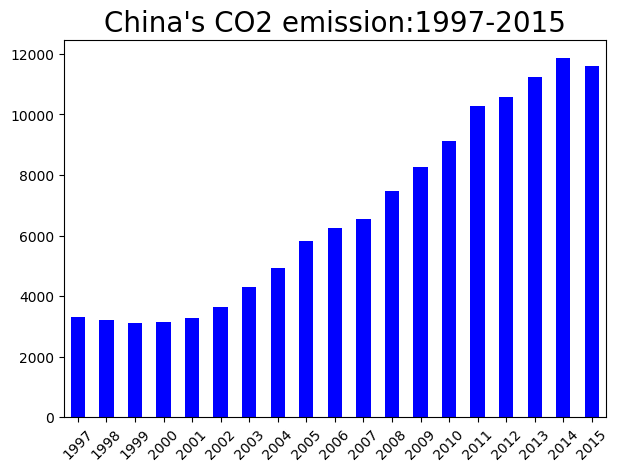

In [12]:
sum_by_year=[]
nation_co2 = pd.read_excel("Province reference CO2 emissions 97-15.xlsx")
fig,ax = plt.subplots()
nation_co2.sum(0).plot(kind="bar",figsize =(7,5),ax=ax,color ="blue")
plt.rcParams['figure.dpi'] = 100

ax.set_title("China's CO2 emission:1997-2015",fontsize=20)
ax.set_xticklabels(labels = nation_co2.columns,rotation =45)

#The carbon dioxide is indeeding growing rapidly but shows signs of slowing down in recent years. Yet in China, it's inevitable to produce more co2 due to the fast growing economy. So we are more curious about the carbon efficiency of GDP -Ho wis the trend of co2 emission per GDP over the years.
#To do that, we divide national co2 emission by the GDP that year

[Text(0,0,'1997'),
 Text(0,0,'1998'),
 Text(0,0,'1999'),
 Text(0,0,'2000'),
 Text(0,0,'2001'),
 Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015')]

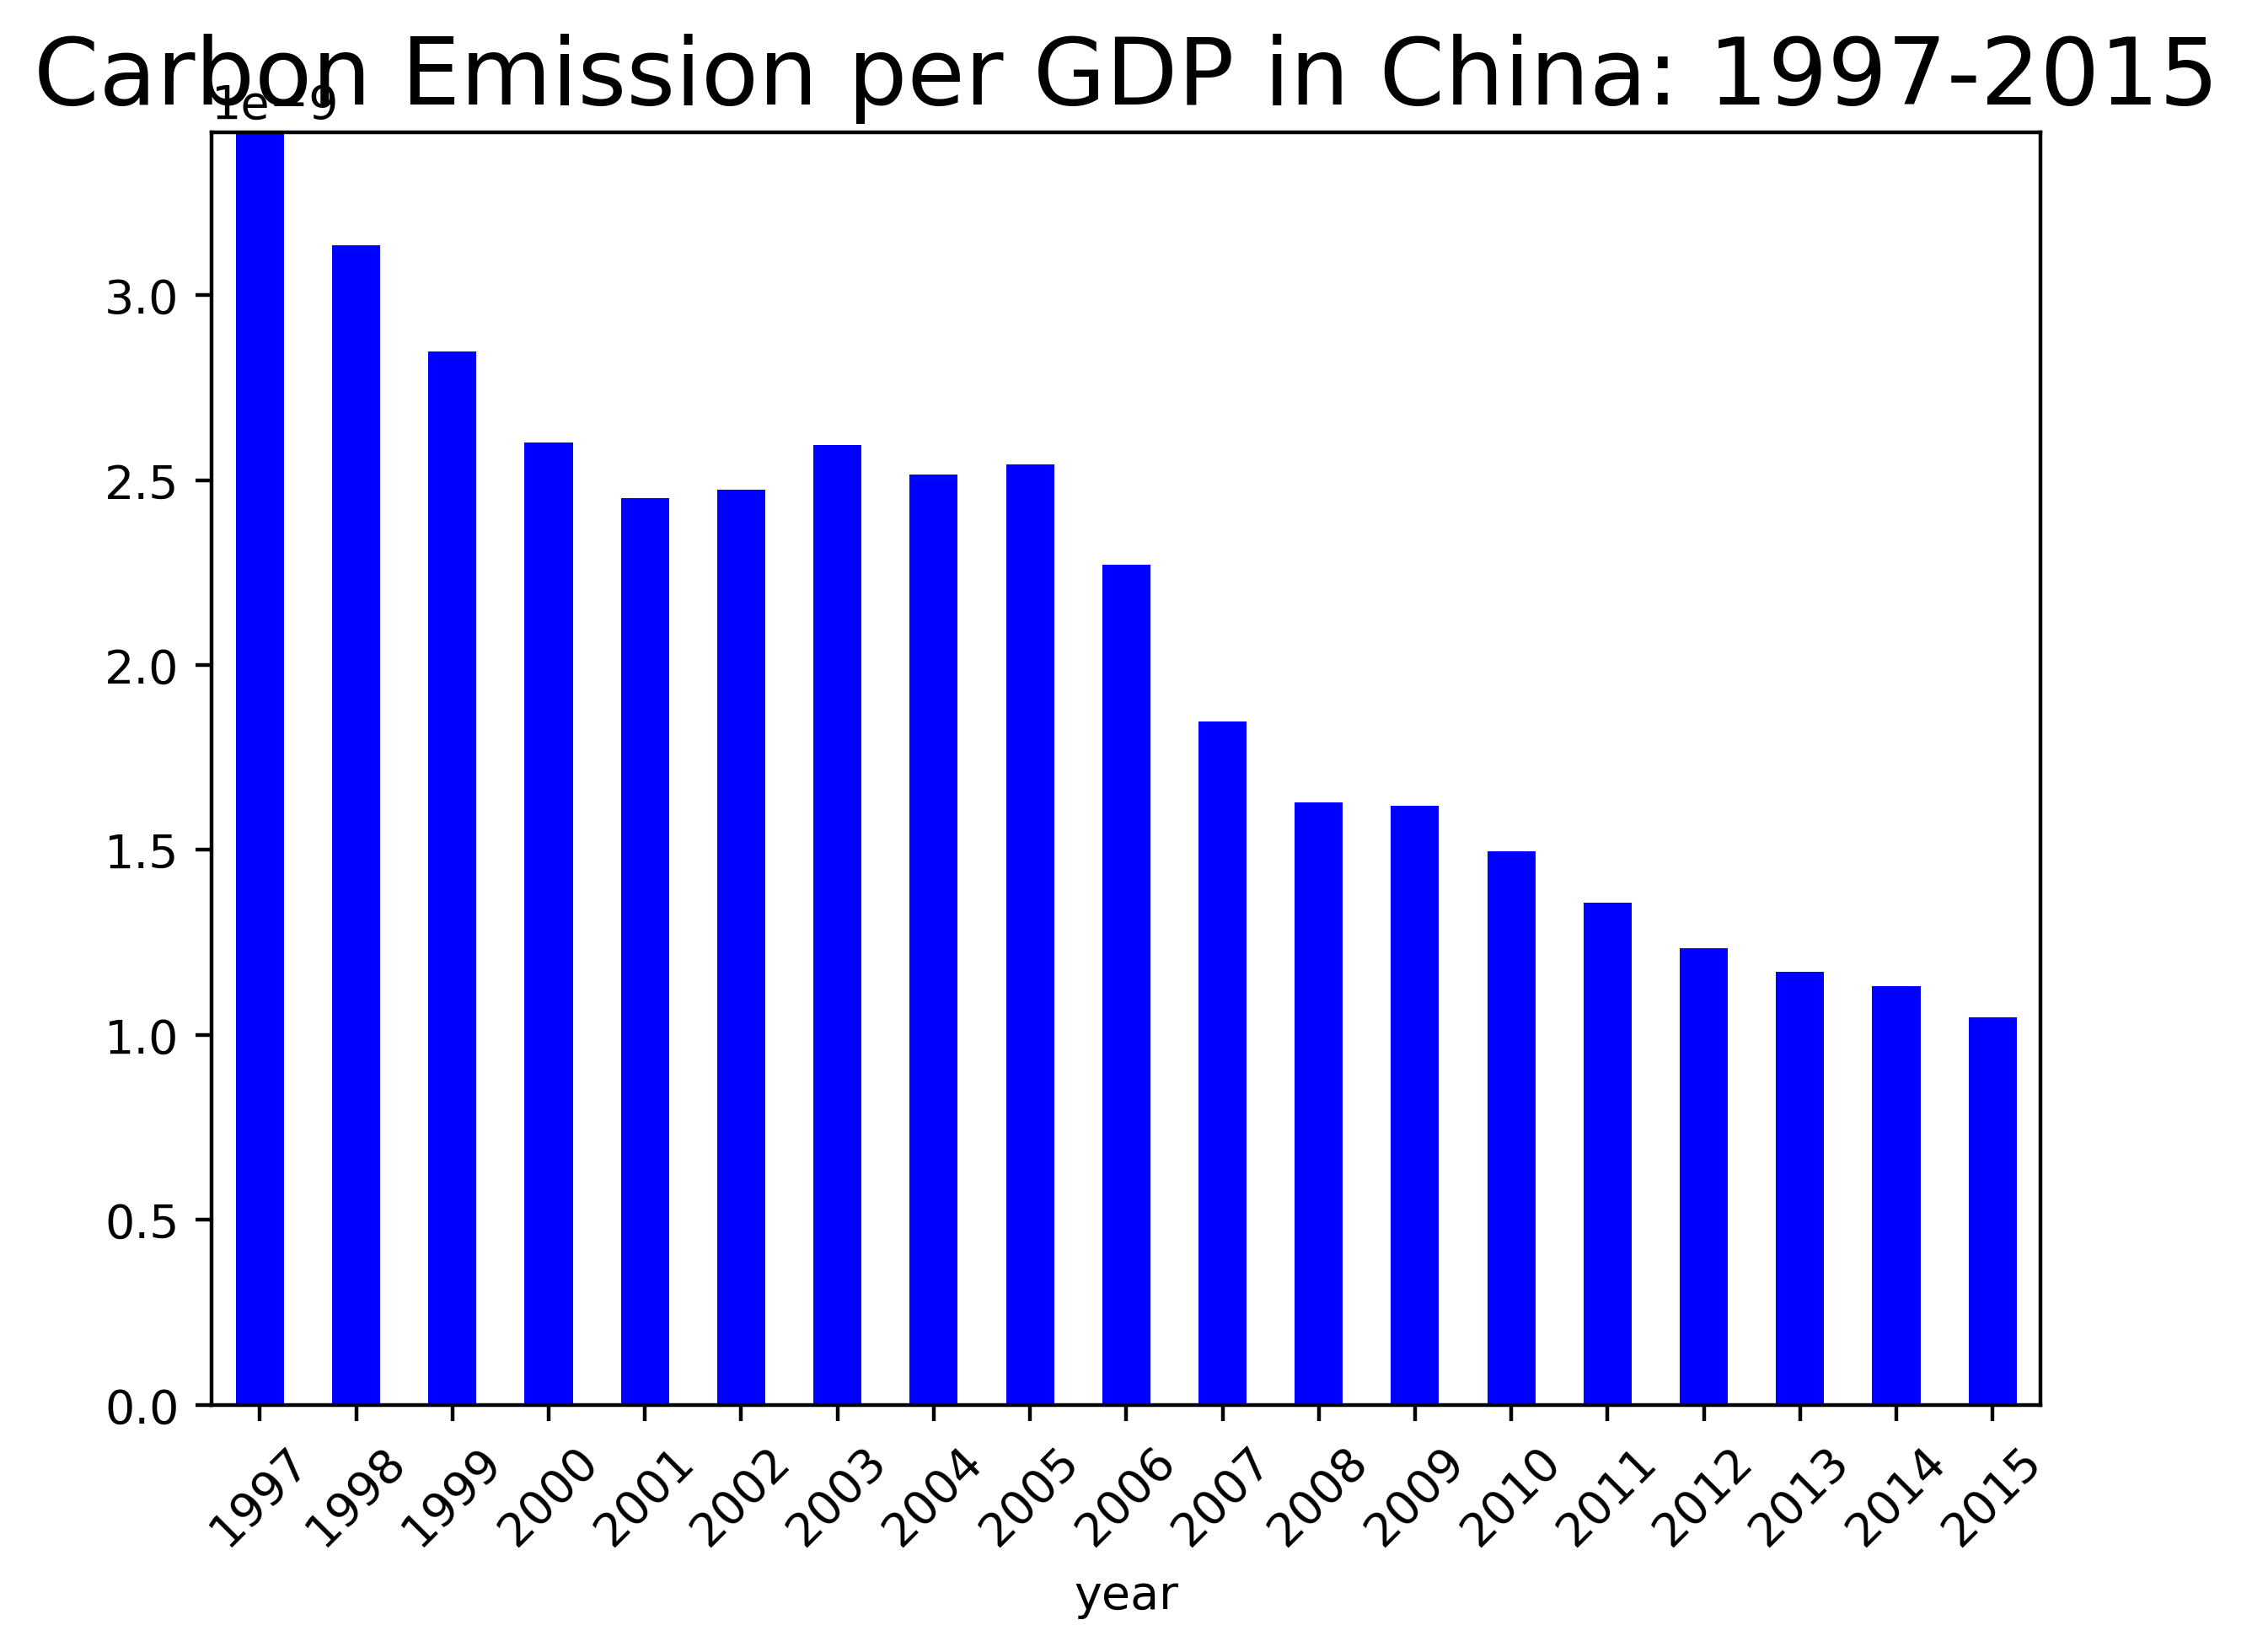

In [17]:
# calculate the contribution to GDP
gdp = pd.read_excel("gdp.xls")
new_sum = nation_co2.sum(0)



gdp = gdp.set_index ("year")

gdp["co2"]=new_sum
gdp["cost"] = gdp["co2"]/gdp["gdp"]
plt.rcParams['figure.dpi'] = 400
fig,ax = plt.subplots()
gdp["cost"].plot(kind="bar",color ="blue",figsize = (7,5),ax=ax) 
ax.set_title("Carbon Emission per GDP in China: 1997-2015",fontsize = 20)
ax.set_xticklabels(labels = nation_co2.columns,rotation =45)


#it's no surprising that the whole trend for the carbon cost per unit GDP is going down, considering the improving technology.
But looing close, we can see there is s subtrend of going up in between 2001 - 2005, which is both bizzare and interesting 

# Breaking into regions

#After looking at the national data, we want to look closer into the different part of China. Does the energy consumption / carbon dioxide emission shows different regional characteristics.
#Yet after we run some graphing on all 30 provinces provided in the dataset, we find it hard to compare in between/ extract features from so many messy datas
#So we decided that we use the most well-known dividing criteria -- breaking China's provinces into three regions -- West, Middle, East
#The reason of such division is both geographical,cultural, economical

In [94]:
# categorization


a = {"West":["Chongqing","Sichuan","Guizhou","Yunnan","Shaanxi","Gansu","Qinghai","Ningxia","Xinjiang"],\
     "Middle":["Henan","Inner mongolia","Jilin","Heilongjiang","Jiangxi","Hubei","Hunan","Shanxi","Anhui"],\
     "East":["Hainan","Guangxi","Guangdong","Shandong","Tianjin","Beijing","Hebei","Liaoning","Shanghai","Jiangsu","Zhejiang","Fujian"]}




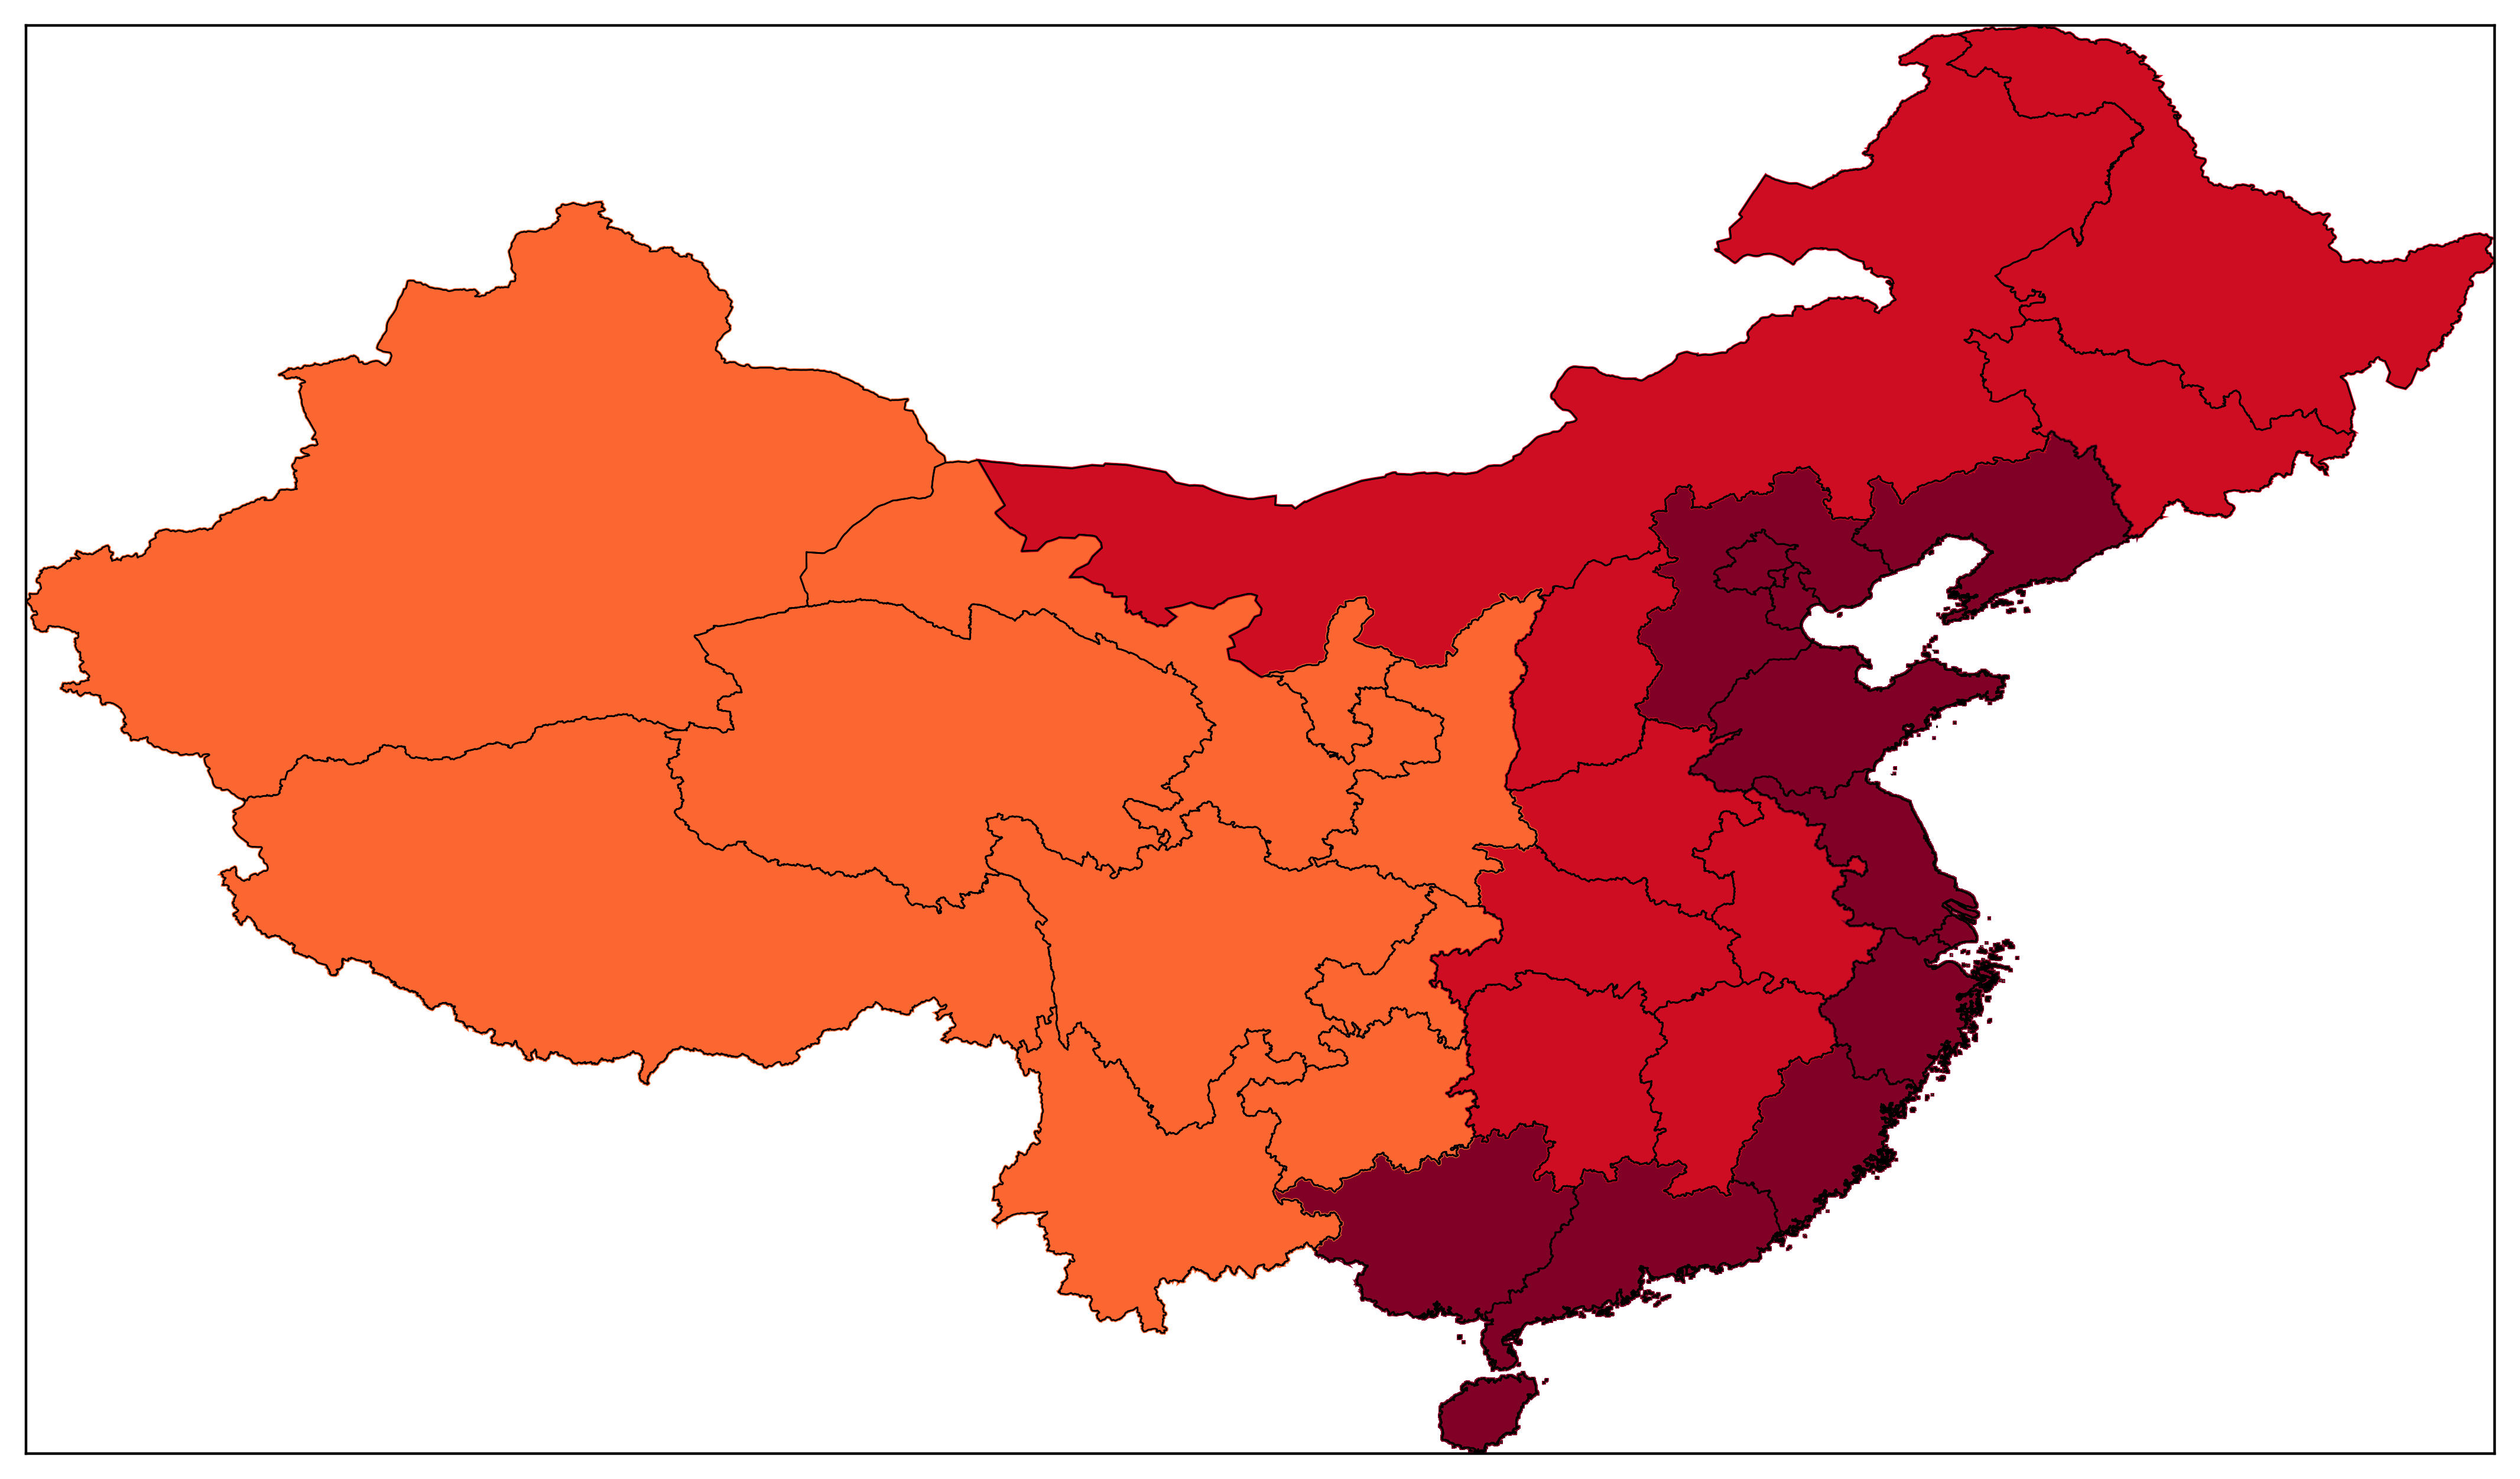

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
plt.figure(figsize=(16,8))
m2 = Basemap(
    llcrnrlon=73.55770111084013, 
    llcrnrlat=18.159305572509766, 
    urcrnrlon=134.7739257812502, 
    urcrnrlat=53.56085968017586,
    resolution='l'
)
# 31个省、直辖市、自治区
m2.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)


# df.set_index('province', inplace=True)
statenames=[]
colors={}
cmap = plt.cm.YlOrRd
vmax = 6000
vmin = 0
West=["Chongqing","Sichuan","Guizhou","Yunnan","Shaanxi","Gansu","Qinghai","Ningxia","Xinjiang","Xizang"]
Middle = ["Henan","Inner mongolia","Jilin","Heilongjiang","Jiangxi","Hubei","Hunan","Shanxi","Anhui"]
East=["Hainan","Guangxi","Guangdong","Shandong","Tianjin","Beijing","Hebei","Liaoning","Shanghai","Jiangsu","Zhejiang","Fujian"]
for shapedict in m2.states_info:
    s = shapedict['NAME_1']
    if s == 'Nei Mongol':
        s = "Inner mongolia"
    elif s == 'Ningxia Hui':
        s = "Ningxia"
    elif s == 'Xinjiang Uygur':
        s = "Xinjiang"
    statenames.append(s)
    # pop = df['GDP'][s]
    if s in West:
        colors[s] = cmap(np.sqrt((2000 - vmin) / (vmax - vmin)))[:3]
    elif s in Middle:
        colors[s] = cmap(np.sqrt((4000 - vmin) / (vmax - vmin)))[:3]
    elif s in East:
        colors[s] = cmap(np.sqrt((6000 - vmin) / (vmax - vmin)))[:3]






ax = plt.gca()
for nshape, seg in enumerate(m2.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)


plt.show()

#darkest means the East
#The lighest orange means the West
#In the middle is the Middle 

# Carbon cost of GDP in different regions --Trend

#The data we have for now is the by-province carbon emission and GDP by year, so we have to generate the regional data for both CO2 and for GDP first

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
population = pd.read_excel("National population by province.xls")
population.head(5)
population = population.T
population.head(5)

population["west"] = population["Chongqing"]+population["Sichuan"]+population["Guizhou"]+population["Yunnan"]+population["Shaanxi"]+population["Gansu"]+population["Qinghai"]+population["Ningxia"]+population["Xinjiang"]
population["middle"]=population["Henan"]+population["Inner mongolia"]+population["Jilin"]+population["Anhui"]+population["Shanxi"]+population["Hunan"]+population["Hubei"]+population["Jiangxi"]+population["Heilongjiang"]
population["east"] = population["Hainan"]+population["Guangxi"]+population["Guangdong"]+population["Shandong"]+population["Tianjin"]+population["Beijing"]+population["Hebei"]+population["Liaoning"]+population["Shanghai"]+population["Jiangsu"]+population["Zhejiang"]+population["Fujian"]
population = population.drop(2000)

population.head(5)


Beijing  Tianjin  Hebei  Shanxi  Inner mongolia  Liaoning  Jilin  \
2001     1385     1004   6699    3272            2381      4194   2691   
2002     1423     1007   6735    3294            2384      4203   2699   
2003     1456     1011   6769    3314            2386      4210   2704   
2004     1493     1024   6809    3335            2393      4217   2709   
2005     1538     1043   6851    3355            2403      4221   2716   

      Heilongjiang  Shanghai  Jiangsu  ...    Guizhou  Yunnan  Shaanxi  Gansu  \
2001          3811      1668     7359  ...       3799    4287     3653   2523   
2002          3813      1713     7406  ...       3837    4333     3662   2531   
2003          3815      1766     7458  ...       3870    4376     3672   2537   
2004          3817      1835     7523  ...       3904    4415     3681   2541   
2005          3820      1890     7588  ...       3730    4450     3690   2545   

      Qinghai  Ningxia  Xinjiang   west  middle   east  
2001      523      563      1876  28196   44278  53841  
2002      529      572      1905  28293   44470  54288  
2003      534      580      1934  28482   44651  54785  
2004      539      588      1963  28514   44879  55353  
2005      543      596      2010  28574   44141  55609  

[5 rows x 33 columns]

In [23]:
co2 = pd.read_excel("Province reference CO2 emissions 97-15.xlsx")
co2.head(5)
co2 = co2.T
co2.head(5)
co2 = co2.drop([1997,1998,1999,2000])
co2.head(5)
co2.dtypes

Beijing           float64
Tianjin           float64
Hebei             float64
Shanxi            float64
Inner mongolia    float64
Liaoning          float64
Jilin             float64
Heilongjiang      float64
Shanghai          float64
Jiangsu           float64
Zhejiang          float64
Anhui             float64
Fujian            float64
Jiangxi           float64
Shandong          float64
Henan             float64
Hubei             float64
Hunan             float64
Guangdong         float64
Guangxi           float64
Hainan            float64
Chongqing         float64
Sichuan           float64
Guizhou           float64
Yunnan            float64
Shaanxi           float64
Gansu             float64
Qinghai           float64
Ningxia           float64
Xinjiang          float64
dtype: object

In [24]:
co2["west"] = co2["Chongqing"]+co2["Sichuan"]+co2["Guizhou"]+co2["Yunnan"]+co2["Shaanxi"]+co2["Gansu"]+co2["Qinghai"]+co2["Ningxia"]+co2["Xinjiang"]

co2["middle"]=co2["Henan"]+co2["Inner mongolia"]+co2["Jilin"]+co2["Anhui"]+co2["Shanxi"]+co2["Hunan"]+co2["Hubei"]+co2["Jiangxi"]+co2["Heilongjiang"]

co2["east"] = co2["Hainan"]+co2["Guangxi"]+co2["Guangdong"]+co2["Shandong"]+co2["Tianjin"]+co2["Beijing"]+co2["Hebei"]+co2["Liaoning"]+co2["Shanghai"]+co2["Jiangsu"]+co2["Zhejiang"]+co2["Fujian"]
co2.head(5)

Beijing  Tianjin  Hebei  Shanxi  Inner mongolia  Liaoning  Jilin  \
2001     61.7     66.8  266.6    93.3           117.6     272.4  102.5   
2002     64.3     68.9  290.2   207.7           132.1     294.1  105.1   
2003     69.3     71.4  320.8   308.4           126.2     319.5  116.4   
2004     53.9     78.9  365.4   322.9           209.9     355.8  123.6   
2005     95.3     89.5  409.0   296.5           246.4     398.0  146.9   

      Heilongjiang  Shanghai  Jiangsu   ...    Guizhou  Yunnan  Shaanxi  \
2001         163.2     106.0    217.0   ...       55.6    58.6     70.4   
2002         164.1     109.1    232.3   ...       68.6    63.3     84.9   
2003         171.8     124.0    268.0   ...      111.8    82.0     93.5   
2004         193.3     134.1    314.1   ...      123.4    59.7    116.3   
2005         228.1     142.4    386.8   ...      144.1   124.5    217.5   

      Gansu  Qinghai  Ningxia  Xinjiang    west  middle    east  
2001   73.1     15.4      0.9      93.6   529.9  1023.7  1730.5  
2002   79.1     16.5      1.1      92.1   577.3  1190.8  1871.1  
2003   90.2     18.3     38.0     103.0   740.0  1427.6  2139.7  
2004   99.5     19.7     61.4     121.0   835.3  1621.2  2463.4  
2005  104.4     21.2     74.0     132.4  1050.8  1858.2  2900.7  

[5 rows x 33 columns]

In [25]:
gdp = pd.read_excel("gdp by province.xls")

gdp = gdp.T
gdp.head(5)
print(gdp.columns.tolist())

['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'Inner mongolia', 'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan', 'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou', 'Yunnan', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia', 'Xinjiang']


In [26]:
gdp["west"] = gdp["Chongqing"]+gdp["Sichuan"]+gdp["Guizhou"]+gdp["Yunnan"]+gdp["Shaanxi"]+gdp["Gansu"]+gdp["Qinghai"]+gdp["Ningxia"]+gdp["Xinjiang"]

gdp["middle"]=gdp["Henan"]+gdp["Inner mongolia"]+gdp["Jilin"]+gdp["Anhui"]+gdp["Shanxi"]+gdp["Hunan"]+gdp["Hubei"]+gdp["Jiangxi"]+gdp["Heilongjiang"]

gdp["east"] = gdp["Hainan"]+gdp["Guangxi"]+gdp["Guangdong"]+gdp["Shandong"]+gdp["Tianjin"]+gdp["Beijing"]+gdp["Hebei"]+gdp["Liaoning"]+gdp["Shanghai"]+gdp["Jiangsu"]+gdp["Zhejiang"]+gdp["Fujian"]
gdp.head(5)





Beijing  Tianjin    Hebei  Shanxi  Inner mongolia  Liaoning    Jilin  \
2001  3707.96  1919.09  1085.43  386.34          211.12   1236.47  1003.01   
2002  4315.00  2150.76  1186.81  432.89          316.70   1400.02  1150.18   
2003  5007.21  2578.03  1377.94  515.71          406.20   1603.38  1338.04   
2004  6033.21  3110.97  1554.90  640.50          512.10   1900.69  1535.01   
2005  6969.52  3905.64  1786.78  893.16          743.66   2084.13  1678.47   

      Heilongjiang  Shanghai  Jiangsu    ...     Guizhou   Yunnan  Shaanxi  \
2001       1120.12   5210.12  1150.30    ...      302.75   673.06   733.85   
2002       1232.13   5741.03  1297.57    ...      336.37   730.08   823.50   
2003       1414.80   6694.23  1576.33    ...      380.92   812.01   941.60   
2004       1680.46   8072.83  1910.00    ...      443.63   942.14  1095.87   
2005       1830.45   9247.66  2411.11    ...      525.62  1061.55  1270.14   

       Gansu  Qinghai  Ningxia  Xinjiang      west    middle      east  
2001  348.75   104.49   104.82    333.80   6070.42   6473.73  24929.88  
2002  386.78   121.34   133.46    375.22   6806.71   7330.96  28082.00  
2003  440.08   144.83   156.78    472.78   7775.52   8494.68  33195.02  
2004  504.65   174.74   188.97    484.26   9054.57  10196.00  39579.67  
2005  567.04   237.57   288.50    562.50  10351.40  12425.51  49983.09  

[5 rows x 33 columns]

#after getting the regional CO2 emission and GDP data by yeat, we generate the carbon efficiency of GDP of each region by year

#getting the national level GDP per capital

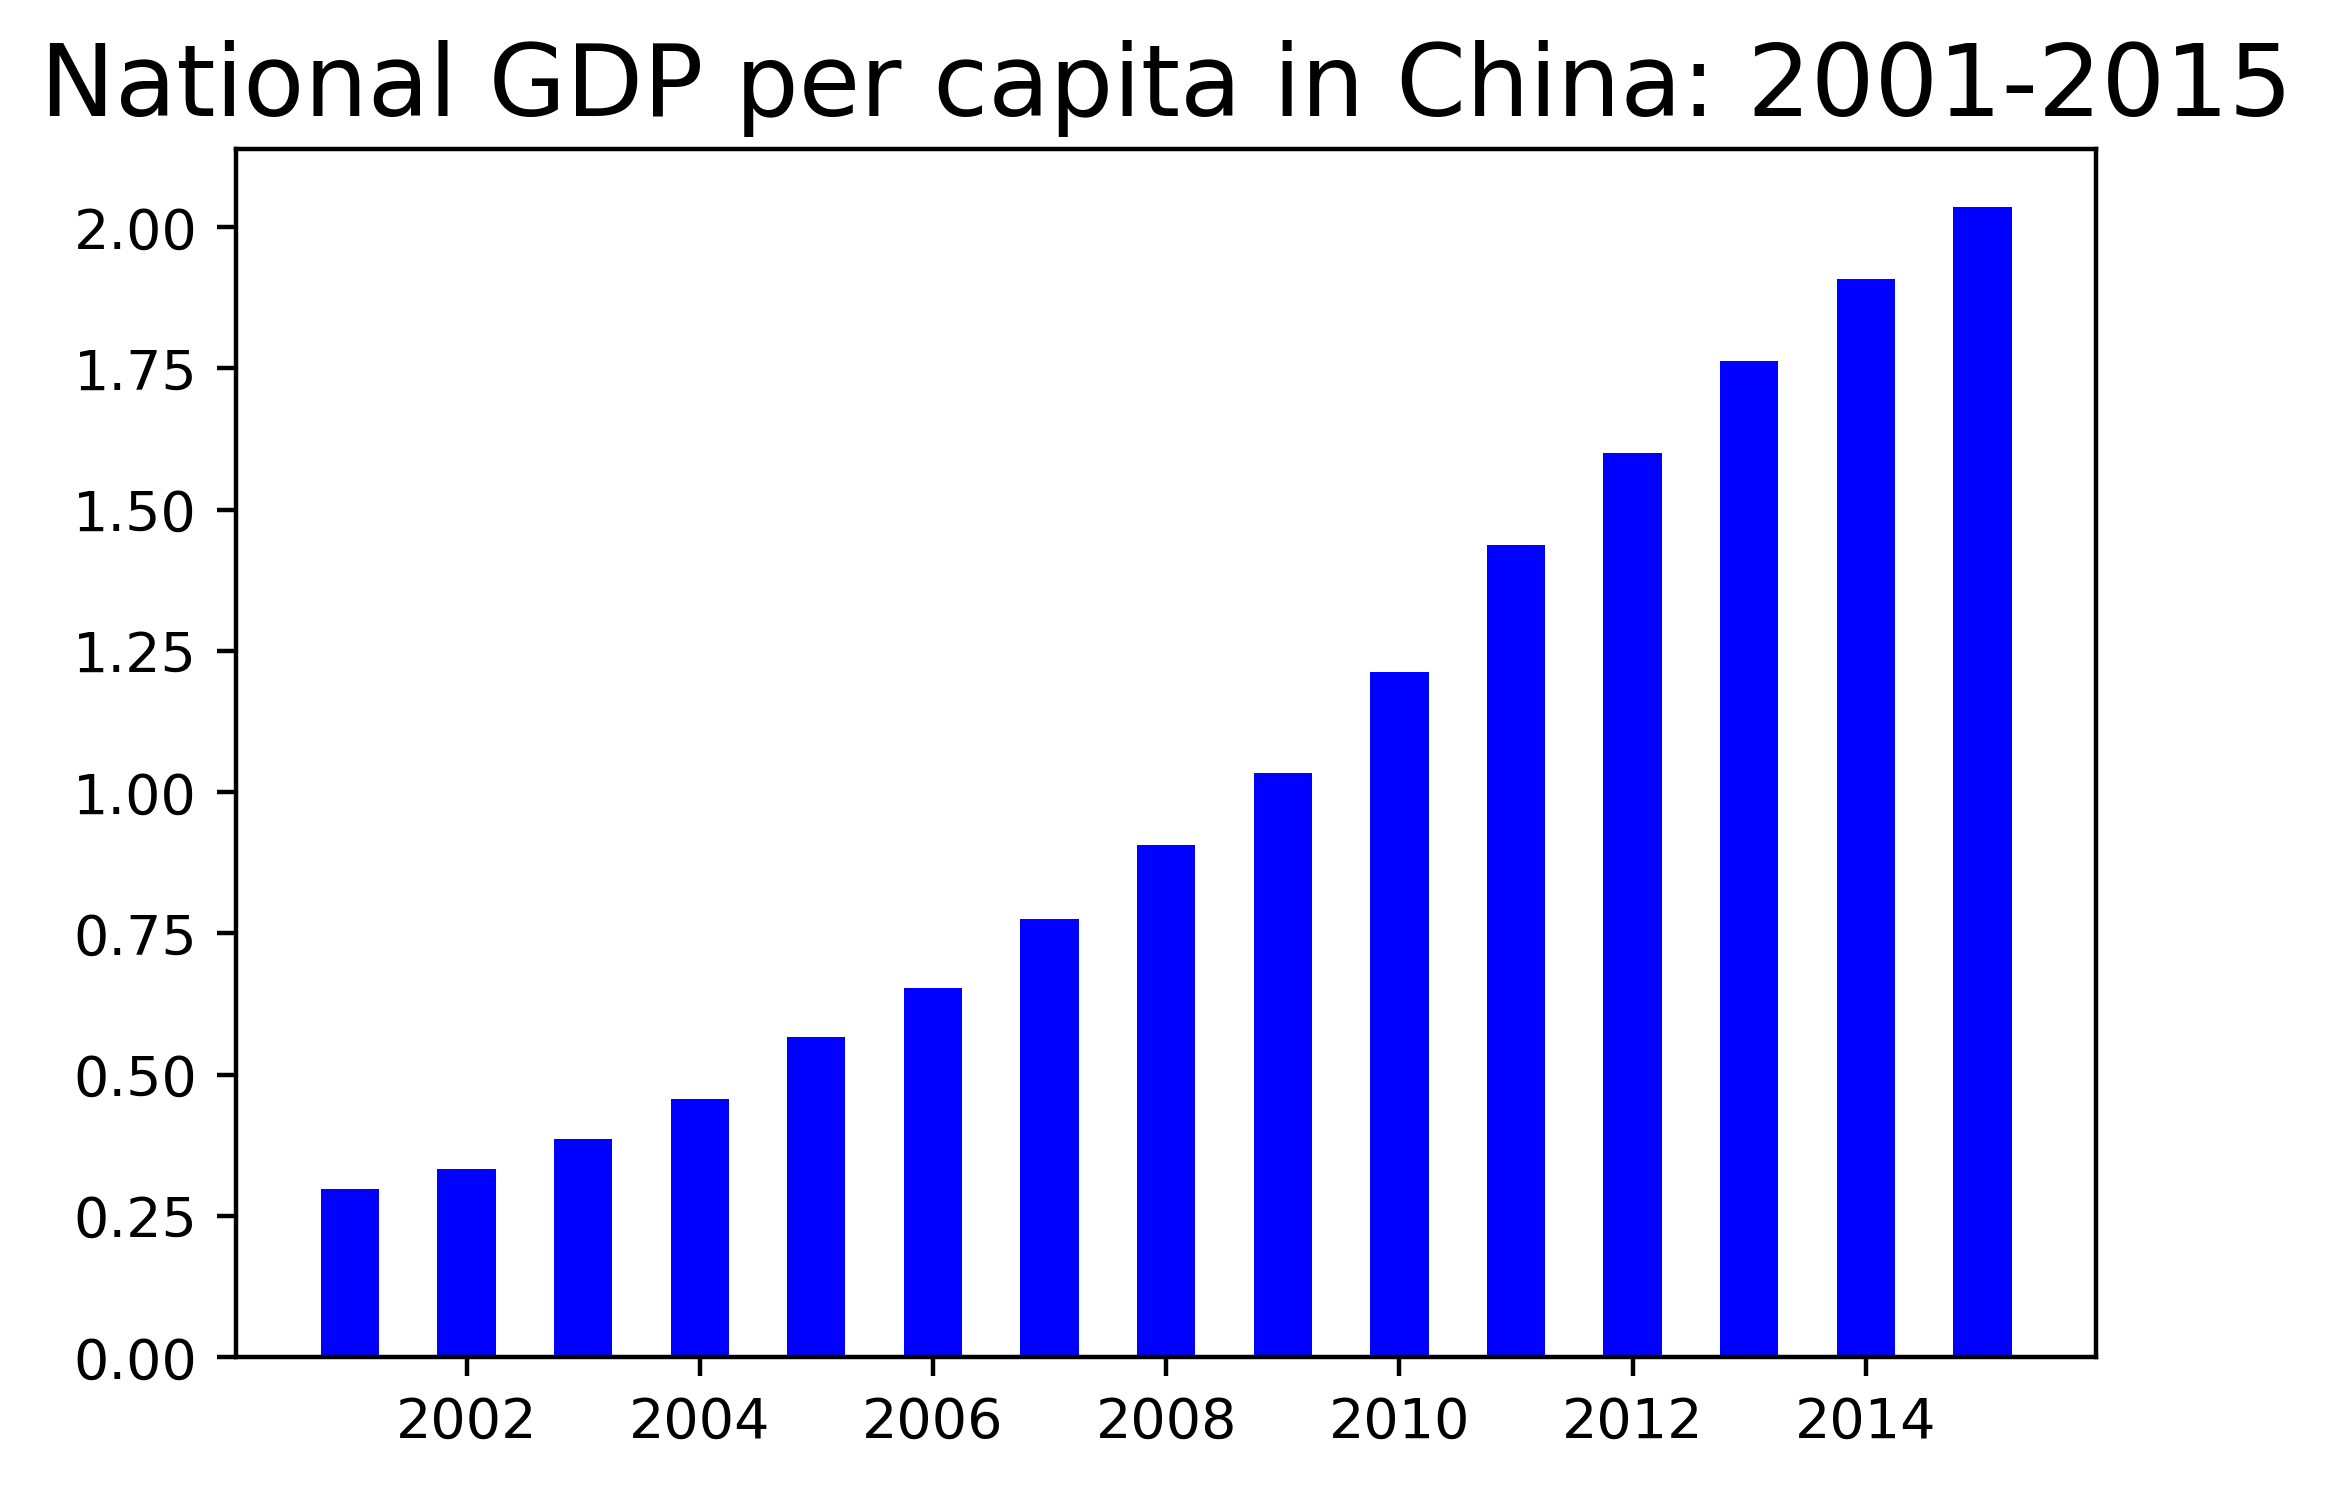

In [51]:
import numpy as np
gdp["total"] = gdp["west"]+gdp["middle"]+gdp["east"]
population["total"] = population["east"]+population["middle"]+population["west"]

gdp["gdp/capita"] = gdp["total"]/population["total"]
# fig,ax  = plt.subplots()
# gdp["gdp/capital"].plot.bar(ax = ax,legend=True)
# gdp["gdp/capital"].plot(ax=ax)
# ax.set_title("National GDP per capital in China: 2001-2015",fontsize = 24,color = "r")
# plt.show()
plt.figure()

plt.title("National GDP per capita in China: 2001-2015",fontsize = 18)


plt.bar(np.array(gdp.index.tolist()),np.array(gdp["gdp/capita"]),color ="b", width = 0.5)
plt.show()


In [52]:

gdp["co2/gdp_east"] = co2["east"]/gdp["east"]
gdp["co2/gdp_middle"] = co2["middle"]/gdp["middle"]
gdp["co2/gdp_west"] = co2["west"]/gdp["west"]
gdp["gdp/capita_east"] = gdp["east"]/population["east"]
gdp["gdp/capita_middle"] = gdp["middle"]/population["middle"]
gdp["gdp/capita_west"] = gdp["west"]/population["west"]
final = gdp[["co2/gdp_east","co2/gdp_middle","co2/gdp_west","gdp/capita_east","gdp/capita_middle","gdp/capita_west"]]

final = final.drop(2016)
final




co2/gdp_east  co2/gdp_middle  co2/gdp_west  gdp/capita_east  \
2001      0.069415        0.158131      0.087292         0.463028   
2002      0.066630        0.162434      0.084813         0.517278   
2003      0.064458        0.168058      0.095170         0.605914   
2004      0.062239        0.159004      0.092252         0.715041   
2005      0.058034        0.149547      0.101513         0.898831   
2006      0.053703        0.139779      0.093881         1.030269   
2007      0.047415        0.118442      0.085675         1.207172   
2008      0.043650        0.118980      0.082881         1.384884   
2009      0.041846        0.114823      0.079632         1.565909   
2010      0.038085        0.111018      0.072626         1.809707   
2011      0.035498        0.106614      0.065063         2.103952   
2012      0.032525        0.096223      0.060399         2.309428   
2013      0.029303        0.099796      0.056358         2.529224   
2014      0.027365        0.094245      0.061068         2.714482   
2015      0.025363        0.084182      0.055060         2.886511   

      gdp/capita_middle  gdp/capita_west  
2001           0.146206         0.215294  
2002           0.164852         0.240579  
2003           0.190246         0.272998  
2004           0.227189         0.317548  
2005           0.281496         0.362266  
2006           0.325926         0.414408  
2007           0.393562         0.499574  
2008           0.483585         0.597895  
2009           0.556322         0.688132  
2010           0.663567         0.829546  
2011           0.806793         1.029893  
2012           0.909138         1.190272  
2013           1.008628         1.333948  
2014           1.093774         1.479268  
2015           1.174029         1.590016

#regional GDP/ CAPITAL trend

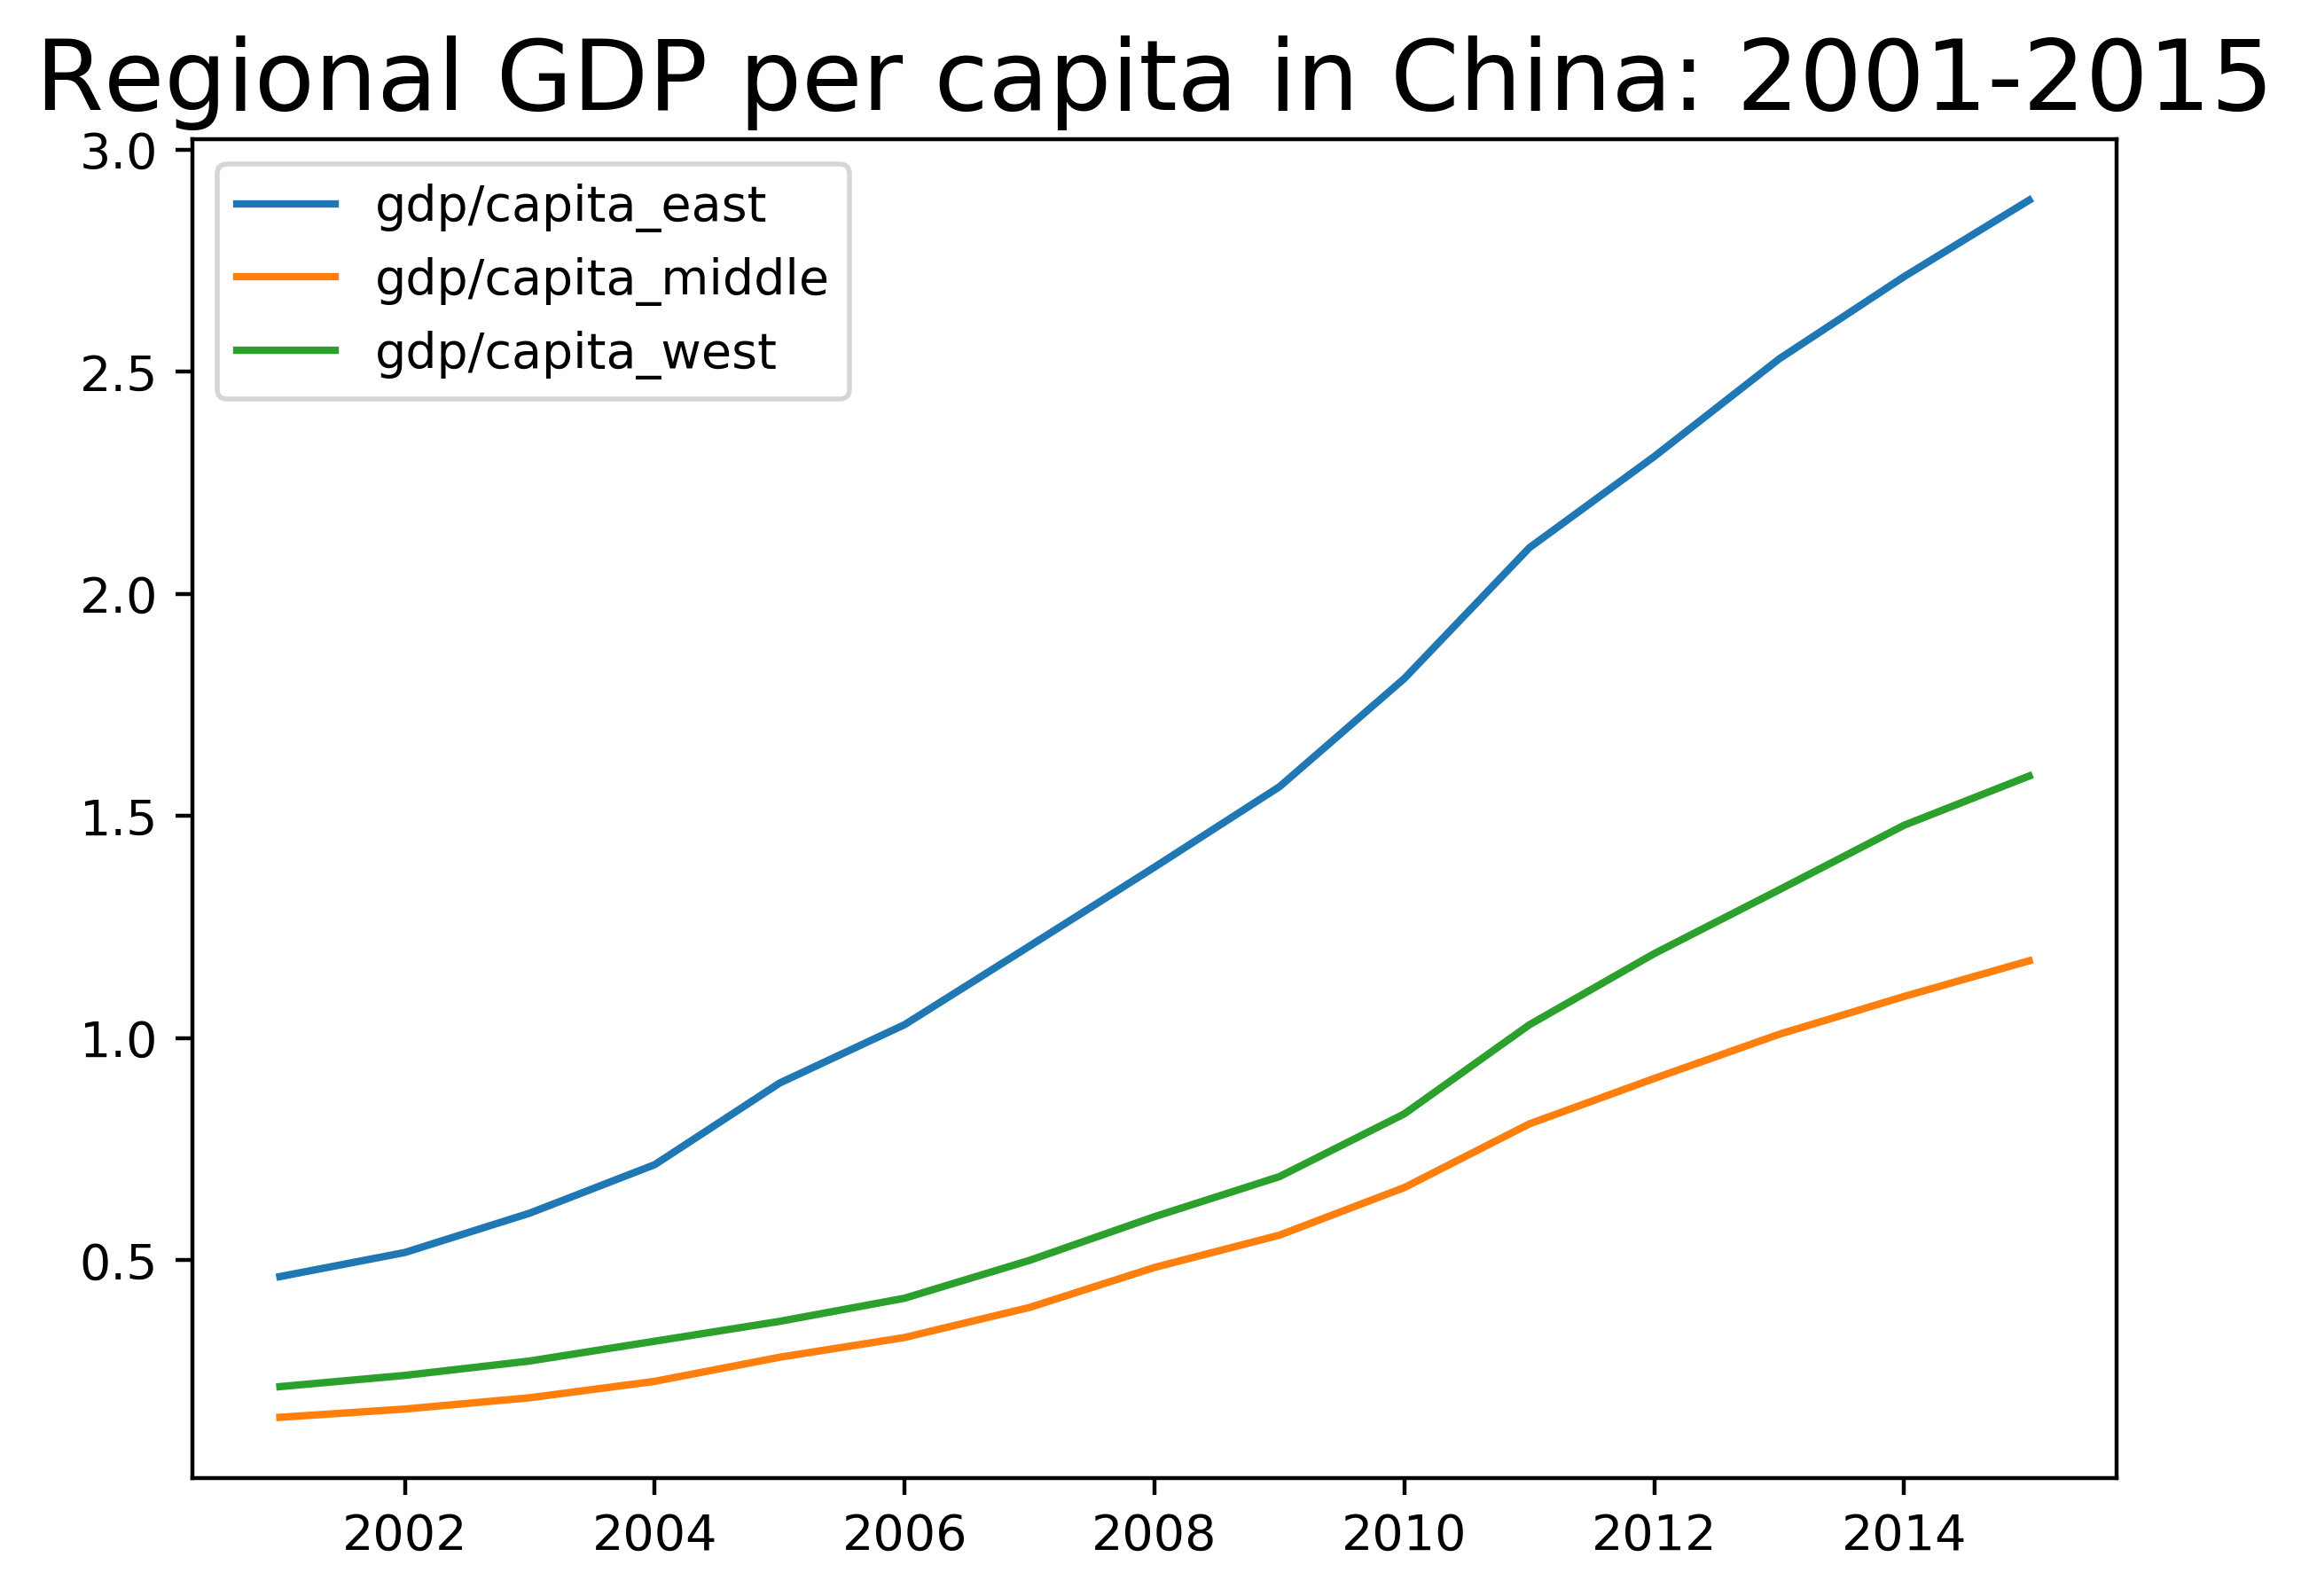

In [53]:
fig, ax = plt.subplots(figsize=(7,5))
final[["gdp/capita_east","gdp/capita_middle","gdp/capita_west"]].plot(legend = True, ax = ax)
ax.set_title("Regional GDP per capita in China: 2001-2015",fontsize = 20)
plt.rcParams['figure.dpi'] = 400
plt.show()

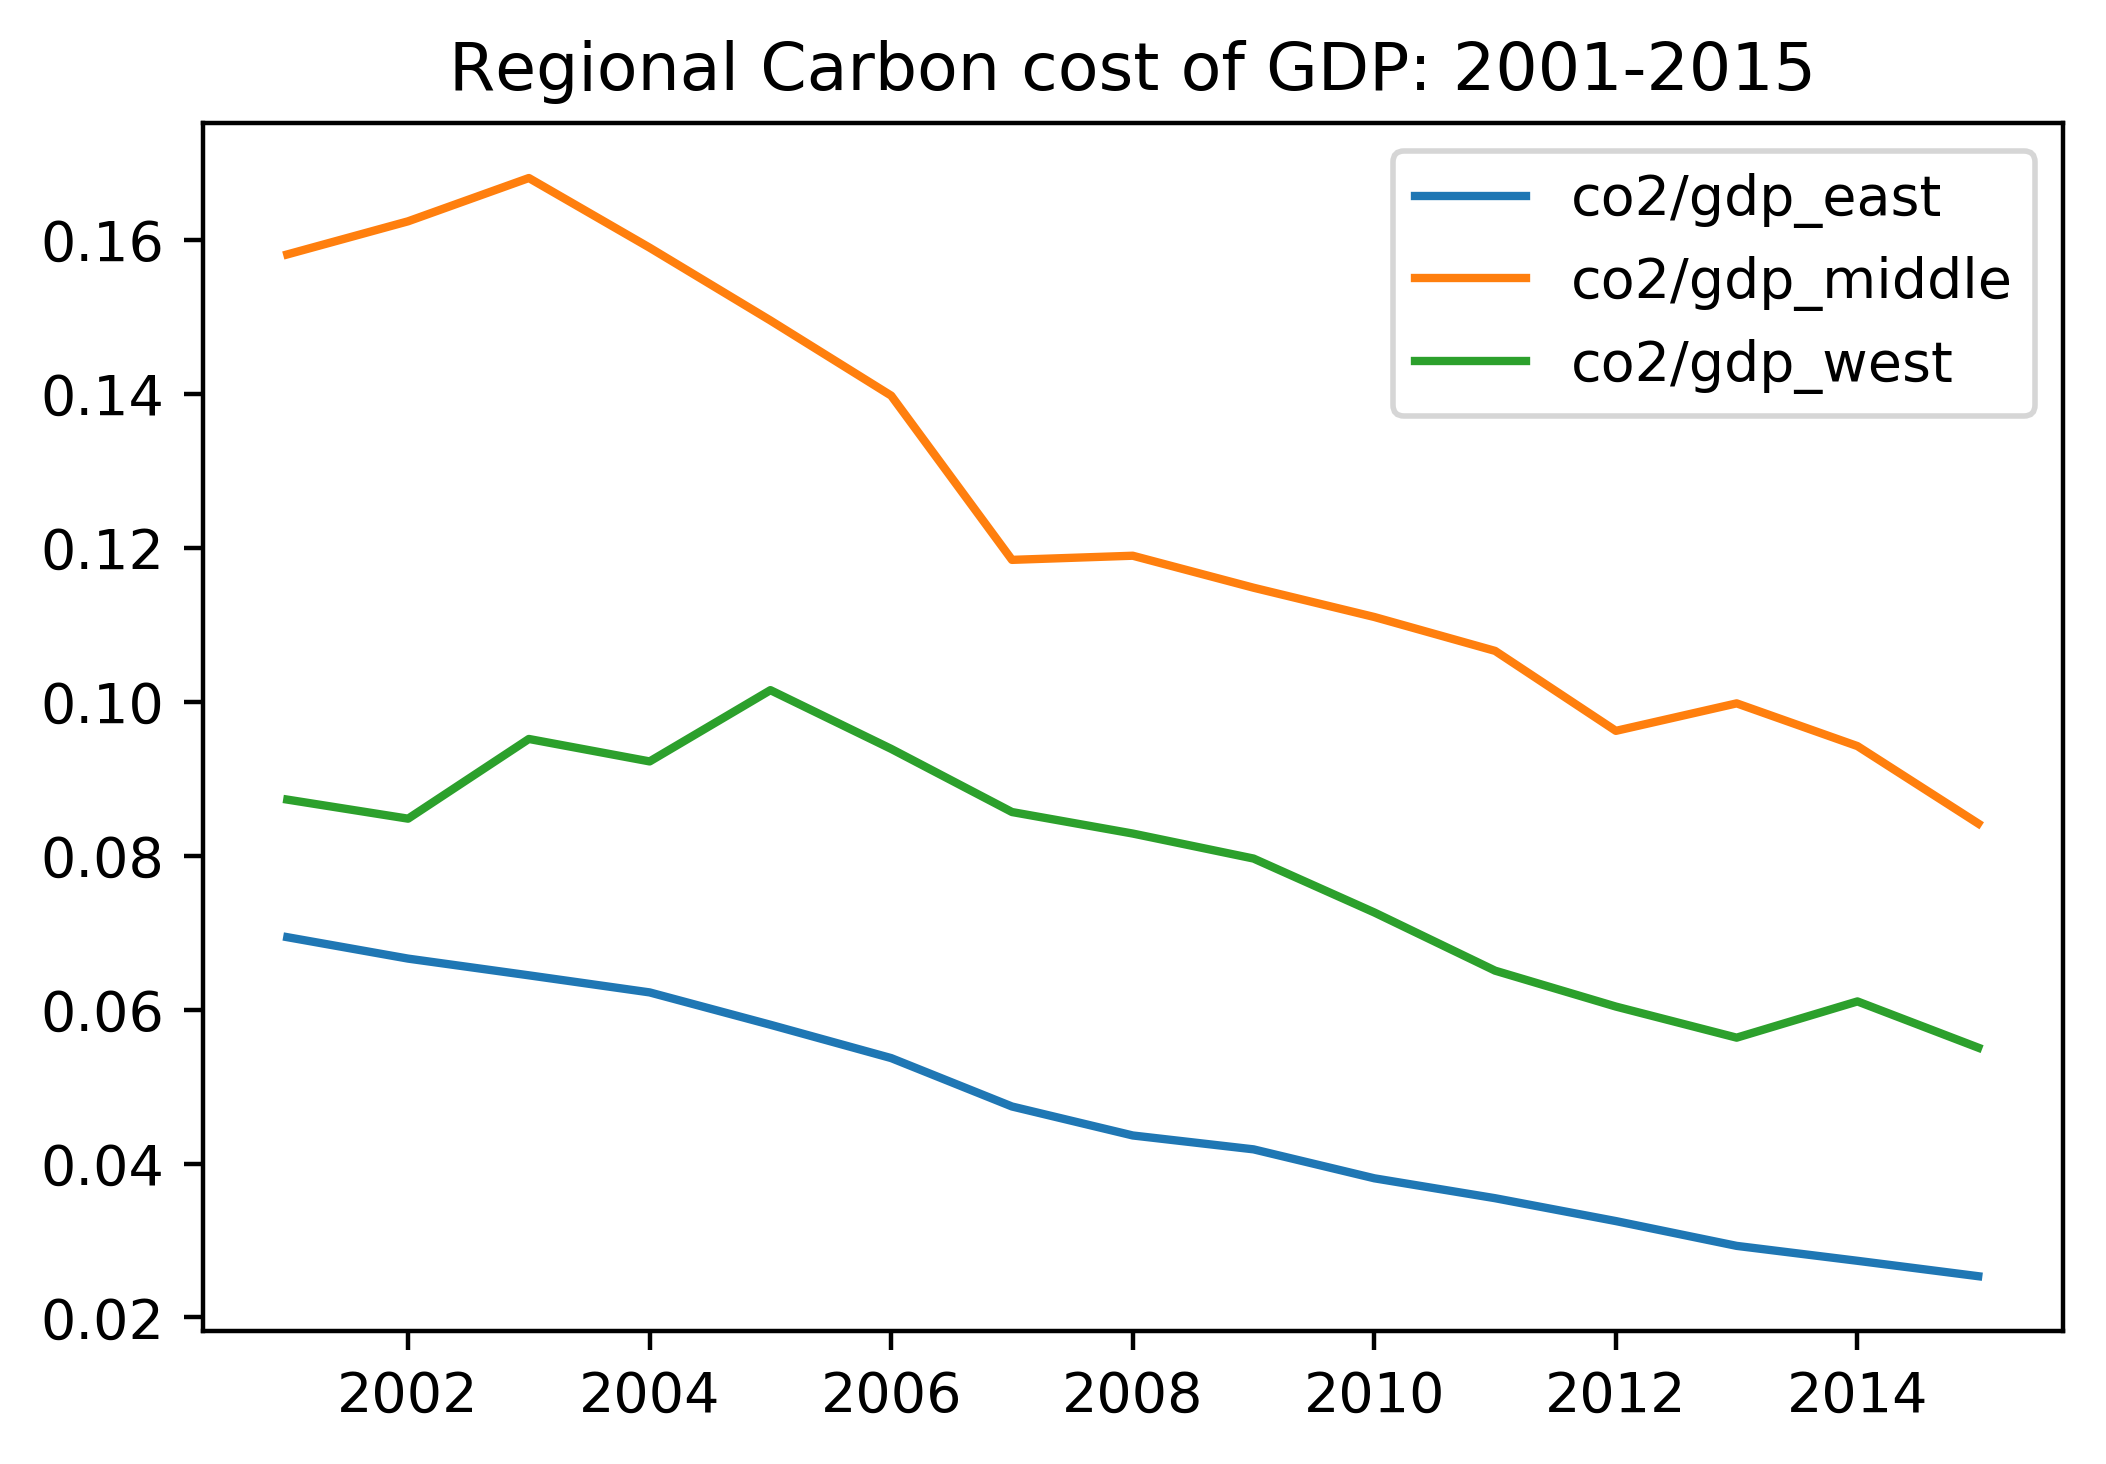

In [54]:
final[["co2/gdp_east","co2/gdp_middle","co2/gdp_west"]].plot(title = "Regional Carbon cost of GDP: 2001-2015",legend =True)

# "Carbon cost of GDP & GDP per capital by region"

#the east region has the lowest carbon cost per GDP -That's what we get from above.So it's very intuitive to think the regions more rich develops economy more environmental-friendly.
#So we decides to more rigorious investigate this by using GDP per capital, which is a common living-standadard measurement, to meaure the wealth of a region
#we also use the scatter plot in order to show how the population size in different regions at different times


In [31]:
import numpy as np

final["east"] = population["east"] /300
final["middle"] = population["middle"]/300
final["west"] = population["west"]/300
final.head(5)



co2/gdp_east  co2/gdp_middle  co2/gdp_west  gdp/capital_east  \
2001      0.069415        0.158131      0.087292          0.463028   
2002      0.066630        0.162434      0.084813          0.517278   
2003      0.064458        0.168058      0.095170          0.605914   
2004      0.062239        0.159004      0.092252          0.715041   
2005      0.058034        0.149547      0.101513          0.898831   

      gdp/capital_middle  gdp/capital_west        east      middle       west  
2001            0.146206          0.215294  179.470000  147.593333  93.986667  
2002            0.164852          0.240579  180.960000  148.233333  94.310000  
2003            0.190246          0.272998  182.616667  148.836667  94.940000  
2004            0.227189          0.317548  184.510000  149.596667  95.046667  
2005            0.281496          0.362266  185.363333  147.136667  95.246667

Text(0.5,1,'West Region')

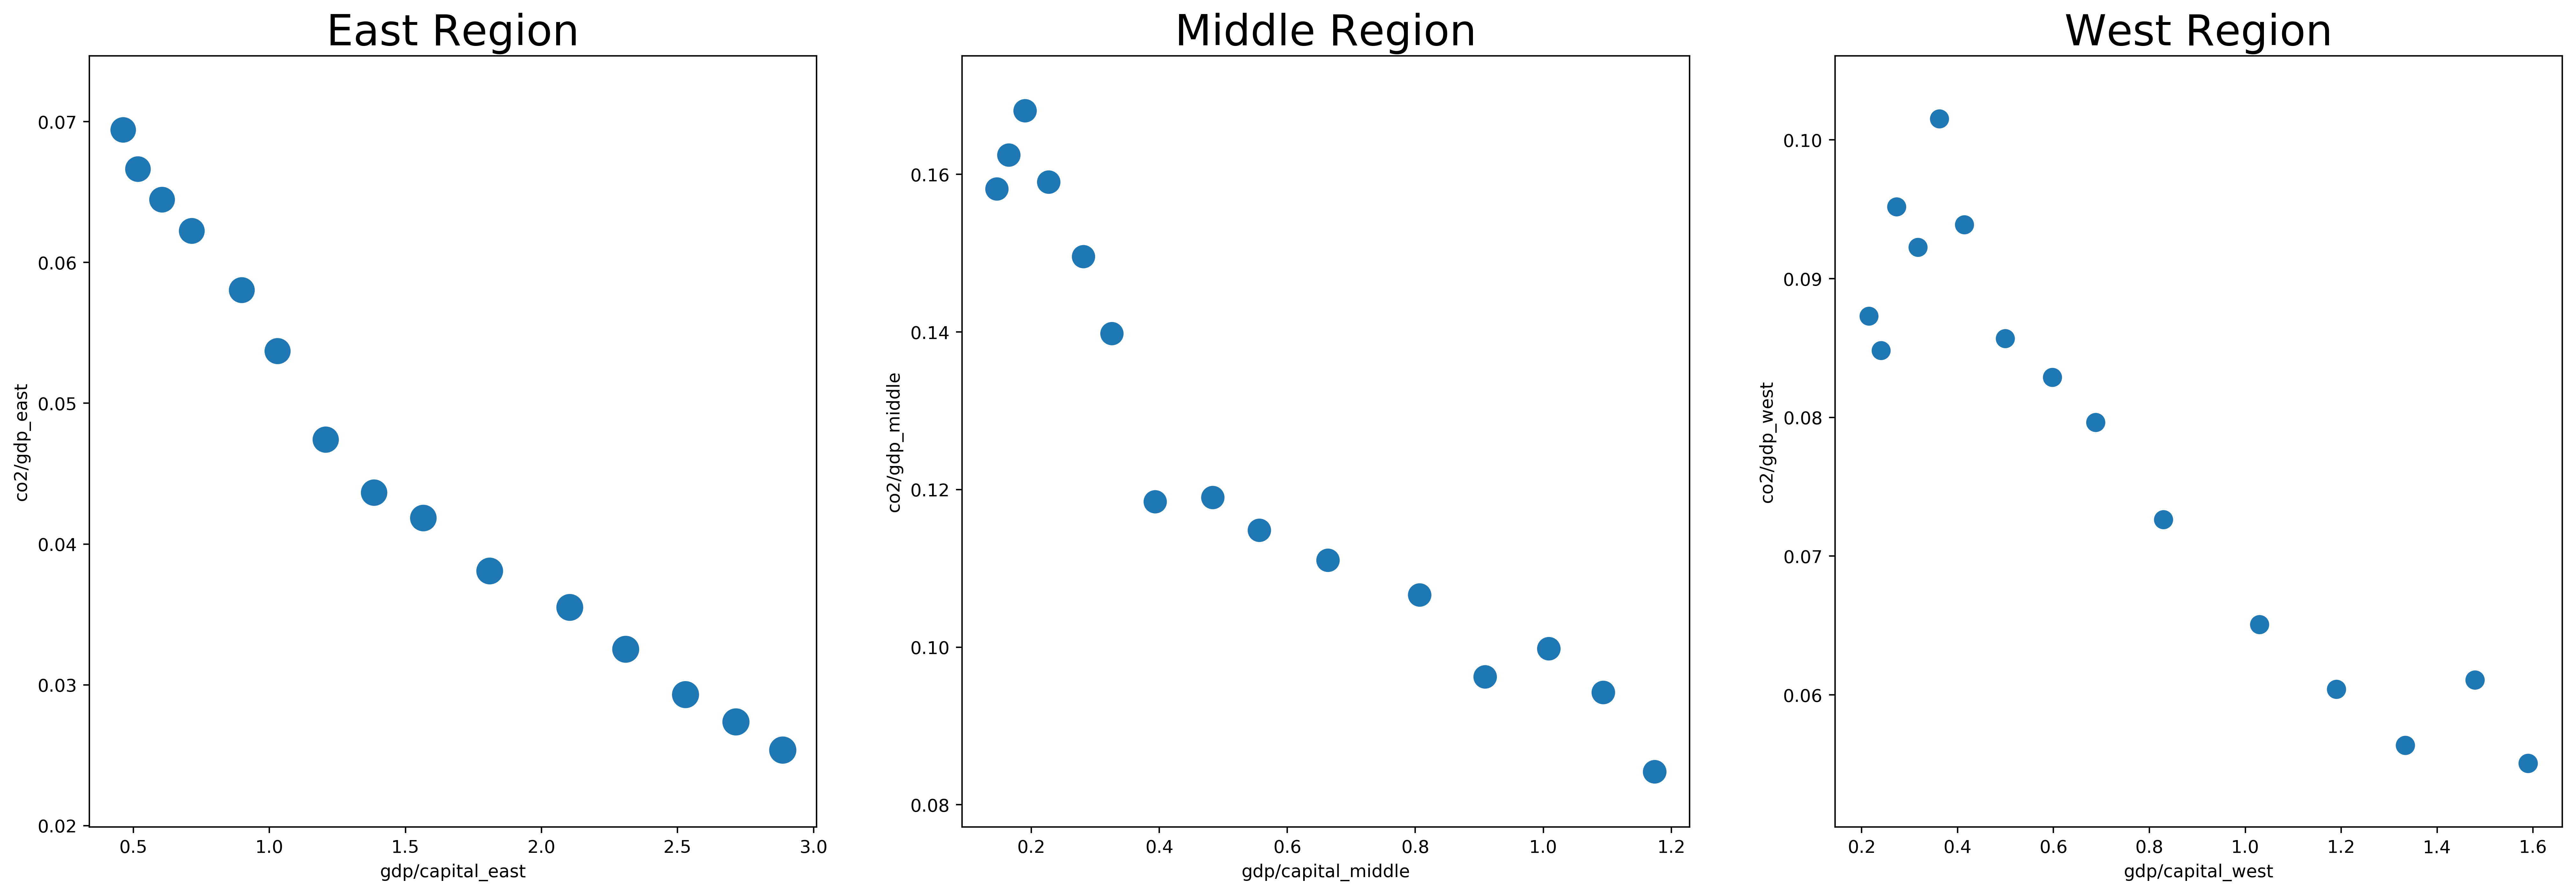

In [41]:
import numpy as np
fig,ax = plt.subplots(1,3,figsize =(25,8))

final.plot.scatter(x = "gdp/capital_east", y = "co2/gdp_east",ax = ax[0],s = np.array(final["east"]))
ax[0].set_title("East Region",fontsize = 24)
final.plot.scatter(x = "gdp/capital_middle", y = "co2/gdp_middle",ax = ax[1],s = np.array(final["middle"]))
ax[1].set_title("Middle Region",fontsize = 24)
final.plot.scatter(x = "gdp/capital_west", y = "co2/gdp_west",ax = ax[2],s = np.array(final["west"]))
ax[2].set_title("West Region",fontsize = 24)

In [33]:
print(final["co2/gdp_east"].corr(final["gdp/capital_east"]))
print(final["co2/gdp_middle"].corr(final["gdp/capital_middle"]))
print(final["co2/gdp_west"].corr(final["gdp/capital_west"]))

-0.9812975082624671
-0.9427245419451794
-0.9380603998414689


#we can see very strong negative correlation between the carbon cost of GDP and people's living standard in all regions, which means that as people get richer, the economy growth is driven by less contaminating factos
#another thing we notice is that the Middle region, though start at high level of carbon cost of GDP, improves the most quickly through time

# Looking at energy with different features

#there are different kind of energies in our dataset, which makes importance to look at since we always need to dicard less efficient energy and apply clenaer and more sustained energy to develop a cleaner economy
#so we first check out how many kind of energies there are in out inventory of data

In [34]:
def sumerize(year):
    
    file = pd.read_excel("National energy inventory 00-15.xlsx",sheet_name = str(year))
    file.index = [i for i in range(len(file.index.tolist()))]
    file = file.drop(0)
    file = file.loc[[j for j in range(1,51)],:]
    
    file.loc['Row_sum'] = file.apply(lambda x: x.sum())
    file.index = [t for t in range(len(file.index.tolist()))]
    
    return file.loc[len(file.index.tolist())-1,:]
print(sumerize(2012))



year=[k+2001 for k in range(15)]
file1 = pd.read_excel("National energy inventory 00-15.xlsx",sheet_name = "2001")
file1.index = [i for i in range(len(file1.index.tolist()))]
file1.append(sumerize(2002))
file1.tail(5)


Raw Coal                     203184
Cleaned Coal                10019.4
Other Washed Coal           20883.4
Briquettes                   3827.7
Coke                          89477
Coke Oven Gas                1184.8
Other Gas                   10129.9
Other Coking Products        1753.4
Crude Oil                      1111
Gasoline                    16331.9
Kerosene                     3913.2
Diesel Oil                  33801.3
Fuel Oil                     4146.1
LPG                            4640
Refinery Gas                 2569.7
Other Petroleum Products    23648.5
Natural Gas                  2033.2
Heat                         685374
Electricity                 93732.6
Other Energy                10161.5
Name: 50, dtype: object


Raw Coal Cleaned Coal Other Washed Coal Briquettes   Coke Coke Oven Gas  \
64        0            0                 0          0      0             0   
65   3363.7        179.4             132.6          0  459.6           2.2   
66        0            0                 0          0      0             0   
67        0            0                 0          0      0             0   
68        0            0                 0          0      0             0   

   Other Gas Other Coking Products Crude Oil Gasoline Kerosene Diesel Oil  \
64         0                     0         0        0        0          0   
65         0                  58.7      83.9     17.8      8.9       24.5   
66         0                     0         0        0        0          0   
67         0                     0         0        0        0          0   
68         0                     0         0        0        0          0   

   Fuel Oil   LPG Refinery Gas Other Petroleum Products Natural Gas Heat  \
64        0     0            0                        0           0    0   
65    173.5  49.3          7.8                   1877.9        62.9    0   
66        0     0            0                        0           0    0   
67        0     0            0                        0           0    0   
68        0     0            0                        0           0    0   

   Electricity Other Energy  
64           0            0  
65           0            0  
66           0            0  
67           0            0  
68           0            0

# Computing the energy structure trend by region 

#first we categorize the energy into raw and clean based on research paper
#raw = ['Raw Coal','Briquettes','Coke','Coke Oven Gas','Other Coking Products','Crude Oil','Kerosene',"Diesel Oil",'Fuel Oil','Other Petroleum Products','Heat']
#clean = ['Cleaned Coal','Other Gas','Gasoline',"LPG",'Refinery Gas','Natural Gas', 'Electricity', 'Other Energy']

#The data set we have now is 15 excel sheet [by year], each sheet contains 30 subsheet of energy inventory by province.
#so to get the raw / clean energy consumption for onw region at a specific year, we need to open in one sheet [by year] all subsheet belonging to that region and adding up all energies belong to that category [raw/clean]
#We approach out desirable data by the following series of functions

#Step one, we go through year by year, adding up the energy consumption belonging to raw / clean for each province and save it into a file called "output.xlsx"

In [55]:

import pandas as pd
province = ['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'InnerMongolia', 'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan', 'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou', 'Yunnan', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia', 'Xinjiang']

    
year = [2001+k for k in range(15)]
def add(year,province):
    
    file1 = pd.read_excel("Province energy inventory %s.xls"%str(year),sheet_name = province)
    file1.index = [l for l in range(len(file1.index.tolist()))]
    file1 = file1[1:51]
    file1.loc[str(year)] = file1.apply(lambda x: x.sum())
    
    file.append(file1[0:1])   #sum the rows and get the sum
    return file1[50:51]
def generate(year, file,province):
    
    for a in year:    
           
        file = file.append(add(a,province))
    return file #plug in the sum throughout the year
def select(year,file,province):
    file = generate(year,file,province)    
    new_file = file.tail(15)   #generate a file only gets the sum of the year
    new_file = new_file.astype('float')
    return new_file

raw = ['Raw Coal','Briquettes','Coke','Coke Oven Gas','Other Coking Products','Crude Oil','Kerosene',"Diesel Oil",'Fuel Oil','Other Petroleum Products']
clean = ['Cleaned Coal','Other Gas','Gasoline',"LPG",'Refinery Gas','Natural Gas', "Other Washed Coal"]
def categorize(file,province):
    file = addition(file,raw,"raw_"+province)
    file= addition(file,clean,"clean_"+province)
    file_new = file[["raw_"+province,"clean_"+province]]
    return file_new
def addition(file,l,name):
    file[name] = file[l[0]]
    for q in range(1,len(l)):
        file[name] = file[name]+file[l[q]]
    return file

def country_addition():
    file =pd.read_excel("Province energy inventory 2000.xls",sheet_name = "Beijing")
    
    file.index = [i for i in range(len(file.index.tolist()))]
    final = categorize(select(year,file,"Beijing"),"Beijing")
        
    
    for w in range(1,len(province)):
        file =pd.read_excel("Province energy inventory 2000.xls",sheet_name = province[w])
        file.index = [i for i in range(len(file.index.tolist()))]
        
        a = categorize(select(year,file,province[w]),province[w])
        final = final.join(a)
    
    return final    
result = country_addition() 
print(result)

writer = pd.ExcelWriter('output.xlsx')
result.to_excel(writer,'Sheet1')

writer.save()


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


      raw_Beijing  clean_Beijing  raw_Tianjin  clean_Tianjin  raw_Hebei  \
2001       4300.0          584.0       3134.7          367.5    13321.8   
2002       4095.4          608.4       3204.9          401.5    14705.7   
2003       4296.7          648.4       3291.4          276.7    16924.8   
2004       4409.3          748.1       3743.5          403.3    18854.6   
2005       4557.1          872.4       3673.0          509.4    24086.0   
2006       4895.3          942.3       3957.0          596.9    25797.7   
2007       4876.7         1130.9       4346.8          634.9    27027.2   
2008       4362.6         1132.0       4661.0          704.3    30343.9   
2009       4422.1         1149.8       4981.9          888.6    30995.1   
2010       4477.1         1135.2       5653.2         1042.4    31420.8   
2011       4202.7         1101.1       6033.6         1266.4    34729.3   
2012       4019.9         1167.2       6705.0         1292.2    35527.4   
2013       3550.1        

#we want to write generate a datframe only with datas with columns indicating raw/clean energy consumption for each province for further process
#To do that, we first generate columns names

In [56]:
West=["Chongqing","Sichuan","Guizhou","Yunnan","Shaanxi","Gansu","Qinghai","Ningxia","Xinjiang"]
Middle = ["Henan","InnerMongolia","Jilin","Heilongjiang","Jiangxi","Hubei","Hunan","Shanxi","Anhui"]
East=["Hainan","Guangxi","Guangdong","Shandong","Tianjin","Beijing","Hebei","Liaoning","Shanghai","Jiangsu","Zhejiang","Fujian"]
west_raw = ["raw_"+y for y in West]
west_clean = ["clean_"+t for t in West]
middle_raw = ["raw_"+p for p in Middle]
middle_clean = ["clean_"+r for r in Middle]
east_raw = ["raw_"+o for o in East]
east_clean = ["clean_"+c for c in East]

 


#Then we open the output file we generated earlier containing the data we wanted, and generate the data we wanted by performing cancatination in the categorical set -- thus getting raw / clean for west /middle / east regions
#Check the final generated dataframe for accuracy

In [57]:
file1 = pd.read_excel("output.xlsx")
def addition_cate(cate_name,file,name_column):
    file[name_column] = file[cate_name[0]]
    for f in range(1,(len(cate_name))):
        file[name_column] = file[name_column]+file[cate_name[f]]
        
    return file
file1 = addition_cate(west_raw,file1,"west_raw")
file1 = addition_cate(west_clean,file1,"west_clean")
file1 = addition_cate(middle_raw,file1,"middle_raw")
file1 = addition_cate(middle_clean,file1,"middle_clean")
file1 = addition_cate(east_raw,file1,"east_raw")
file1 = addition_cate(east_clean,file1,"east_clean")
file1.head(5)

        

raw_Beijing  clean_Beijing  raw_Tianjin  clean_Tianjin  raw_Hebei  \
2001       4300.0          584.0       3134.7          367.5    13321.8   
2002       4095.4          608.4       3204.9          401.5    14705.7   
2003       4296.7          648.4       3291.4          276.7    16924.8   
2004       4409.3          748.1       3743.5          403.3    18854.6   
2005       4557.1          872.4       3673.0          509.4    24086.0   

      clean_Hebei  raw_Shanxi  clean_Shanxi  raw_InnerMongolia  \
2001       2017.1     10816.5         408.2             4845.6   
2002       2075.6     12417.9         842.9             5229.7   
2003       2206.3     13785.5         984.0             6139.9   
2004       2224.5     13720.9        1127.1             9875.4   
2005       3334.2     12983.6        1432.0            10105.1   

      clean_InnerMongolia     ...      raw_Ningxia  clean_Ningxia  \
2001                907.3     ...              0.0            0.0   
2002                861.4     ...              0.0            0.0   
2003                912.2     ...           4211.7          339.5   
2004               1444.9     ...           3320.6          409.7   
2005               1670.8     ...           2342.4          332.3   

      raw_Xinjiang  clean_Xinjiang  west_raw  west_clean  middle_raw  \
2001        2895.9            41.0   28446.8      3260.3     59391.6   
2002        3651.2           344.5   31349.4      4052.9     64071.0   
2003        3974.1           380.9   39818.2      4579.5     72544.1   
2004        4263.7           505.3   41521.0      4817.7     76444.0   
2005        4843.4           529.1   47979.6      5429.2     89909.7   

      middle_clean  east_raw  east_clean  
2001        6259.7   72509.8     11775.2  
2002        6880.8   75625.5     12703.1  
2003        7822.6   85868.1     13796.0  
2004        9822.2   97378.9     15463.4  
2005       12525.5  123777.4     19011.3  

[5 rows x 66 columns]

#Here, we also generate one column data indicating the raw to clean energy ratio for each province for later regression usage and store it in the file "raw to clean ratio by province.xls"

In [58]:
province = ["Beijing","Tianjin","Hebei","Shanxi","InnerMongolia","Liaoning","Jilin","Heilongjiang","Shanghai","Jiangsu","Zhejiang","Anhui","Fujian","Jiangxi","Shandong","Henan","Hubei","Hunan","Guangdong","Guangxi","Hainan","Chongqing","Sichuan","Guizhou","Yunnan","Shaanxi","Gansu","Qinghai","Ningxia","Xinjiang"]

for w in province:
    file1["r/c_"+w] = file1["raw_"+w]/file1["clean_"+w]
file2 = file1.iloc[:,-30:]
file2.head(5)
file2 = file2.T
file2.to_excel("raw to clean ratio by province.xls")

#now we have raw & clean energy consumption for each region, we extract them into a new dataframe for graphing

In [59]:
region_by_clean = file1[["west_raw","west_clean","middle_raw","middle_clean","east_raw","east_clean"]]


#generating a piling bar chart for each region at each year from 2001-2015
#This helps us to see the trend for both the clean/raw energies at each region, and also the ratio


In [60]:
import matplotlib.pyplot as plt


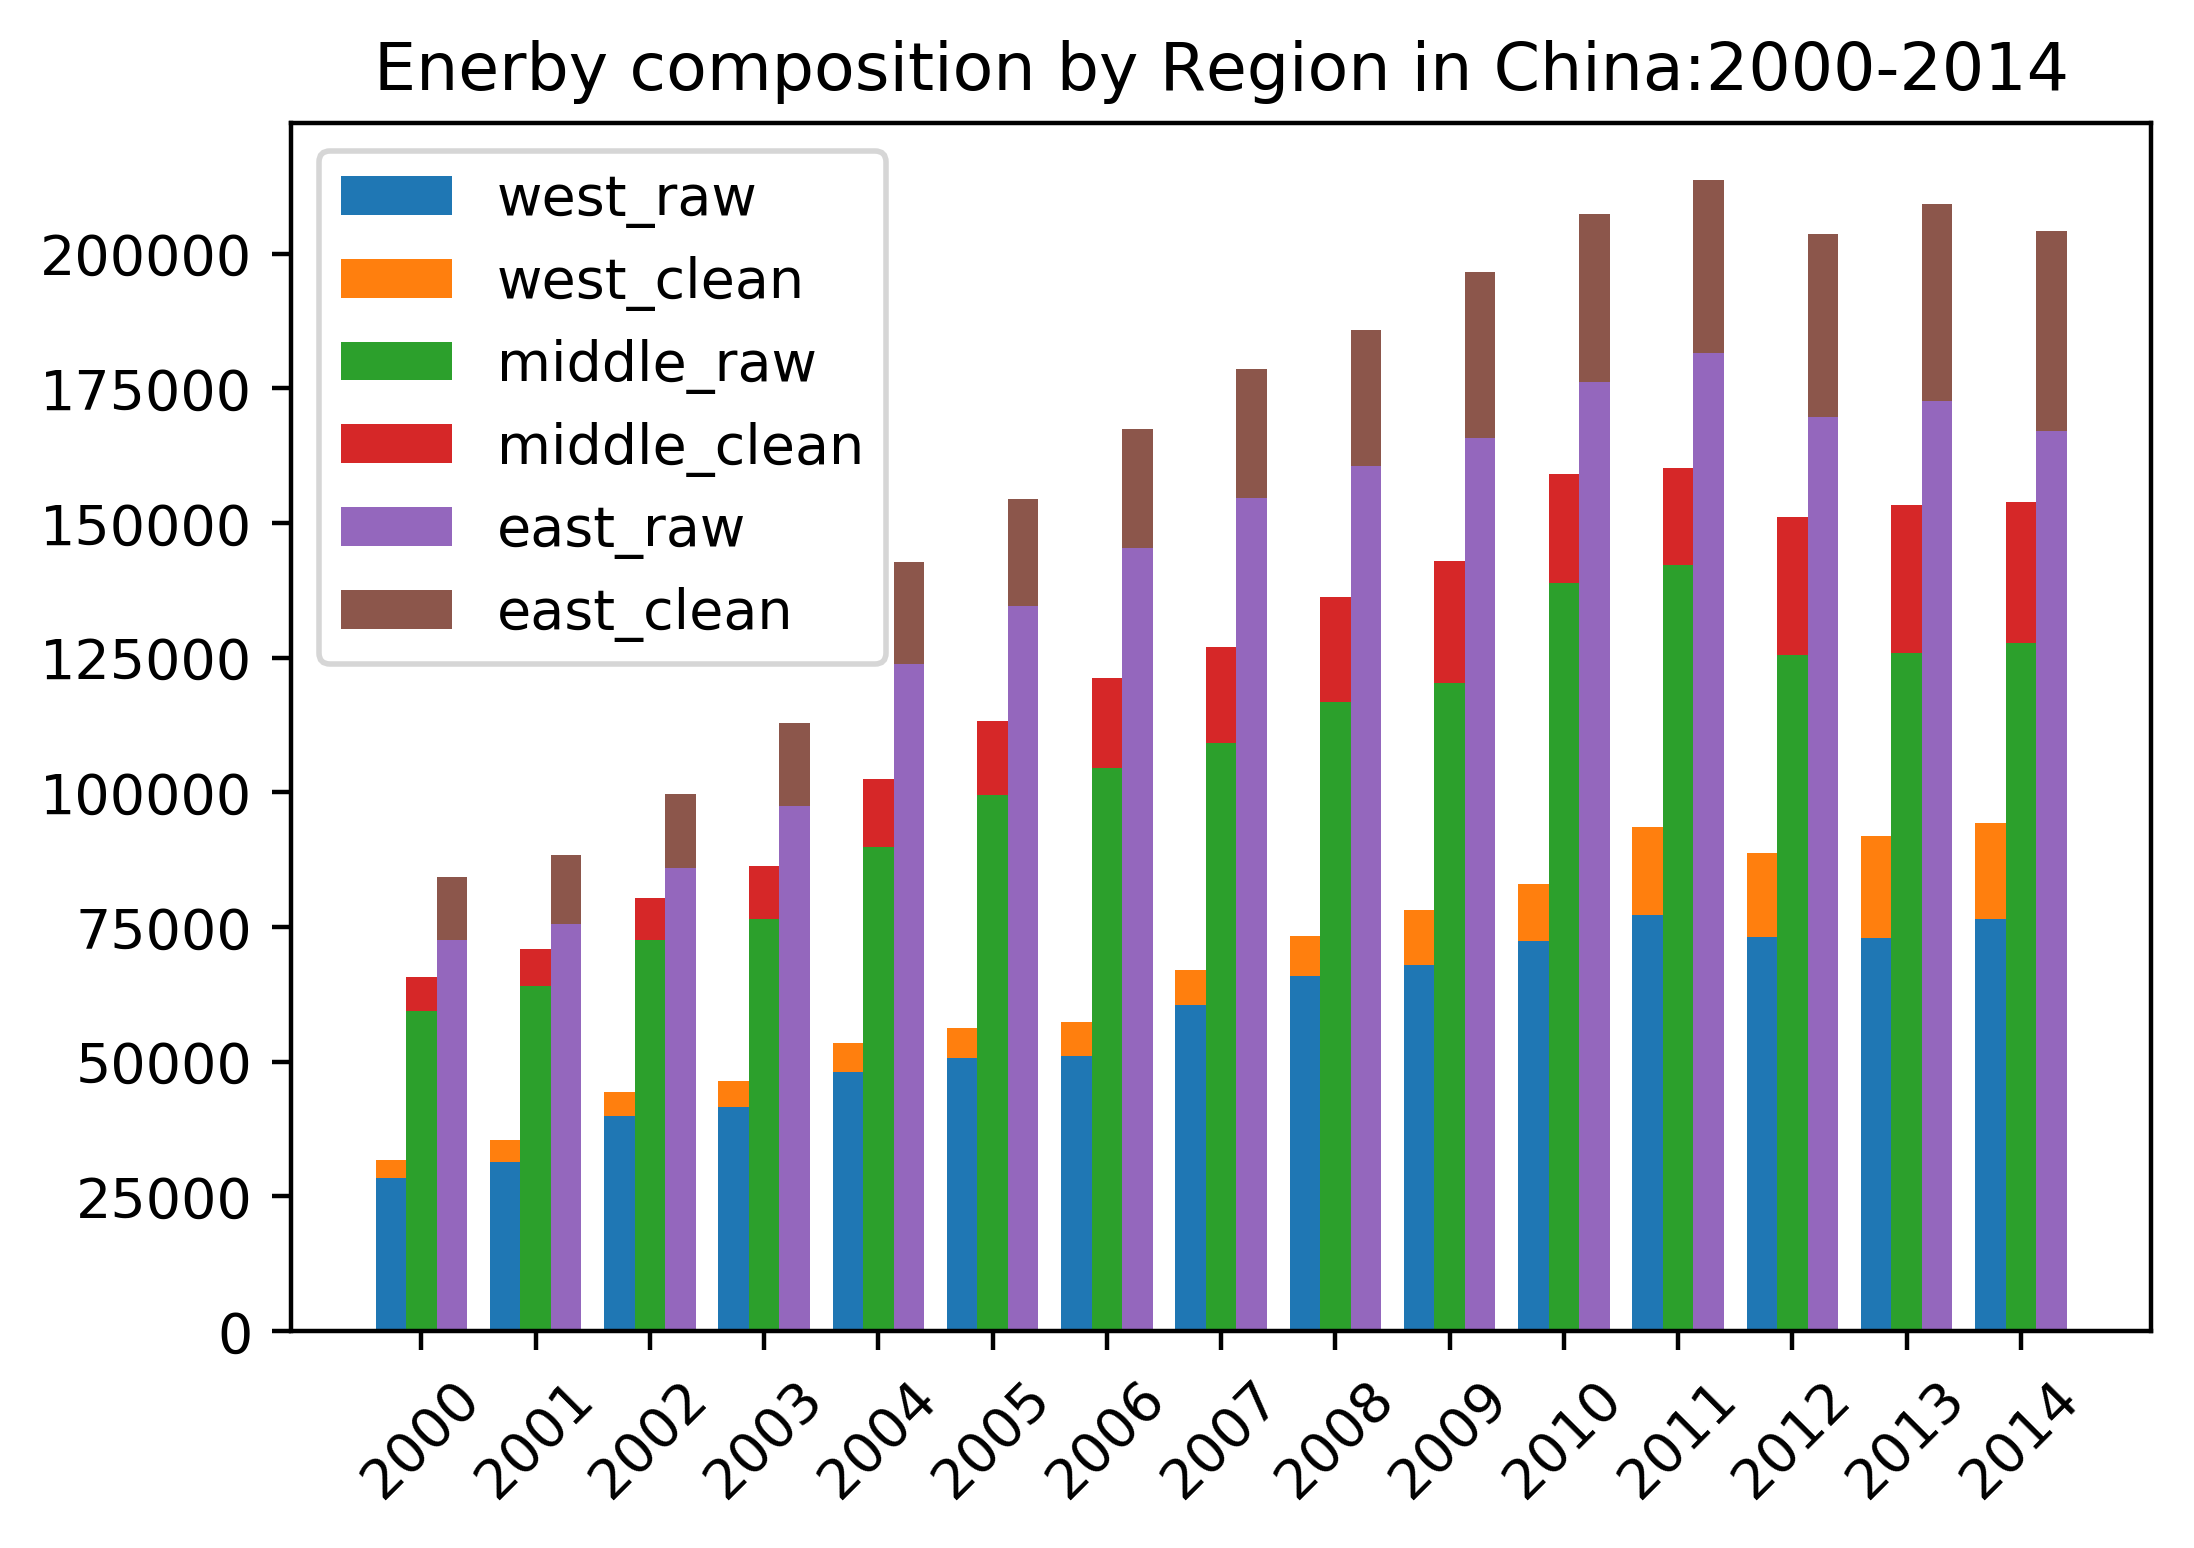

In [61]:
# region_by_clean[["west_raw","west_clean"]].plot.bar(legend = True, stacked = True)
# region_by_clean[["middle_raw","middle_clean"]].plot.bar(legend = True, stacked = True)
import numpy as np
year = region_by_clean.index
total_width, n = 0.8, 3
x = np.arange(15)
labels = 2000+x

width = total_width / n
x = x - (total_width - width) / 2


plt.bar(x,region_by_clean["west_raw"],width=width,label = "west_raw")
plt.bar(x,region_by_clean["west_clean"],bottom = region_by_clean["west_raw"],width=width,label = "west_clean")
plt.bar(x+width,region_by_clean["middle_raw"],width=width,label = "middle_raw")
plt.bar(x+width,region_by_clean["middle_clean"],bottom = region_by_clean["middle_raw"],tick_label=labels,width=width,label = "middle_clean")
plt.bar(x+2*width,region_by_clean["east_raw"],width=width,label ="east_raw")
plt.bar(x+2*width,region_by_clean["east_clean"],bottom = region_by_clean["east_raw"],width=width,label = "east_clean")
plt.title("Enerby composition by Region in China:2000-2014")
plt.rcParams['figure.dpi'] = 400
plt.xticks(rotation=45)

plt.legend()
plt.show()

#all three regions have rising consumption in both kind of energies, yet the energy structure doesn't have a major shift as the raw energy usage still dominates the whole energy consumption
#This can be problematic for a more sustained society development

# generate regression [on GDP, ON REGION TWO DUMMIES, ON TEH ENERGY STRUCTURE, ON THE TRADE AVTIVITY]

#from the above researches,m we already know that the energy structure, the regional features [such as tech],the GDP all has influence on the co2 emission in China, Yet we want to further quantify the indepedent influence all those factors have on co2 emission
#this is really important because then we can really work on which factor we prioritize to change in order to reduce teh co2 emission

#before running the regression, we add one more important factor into the regression - the trade activity
#it is suggested by some research paper that the more active carbon market contributes to the reduction in co2 emission. Unfortunately, we don't get any measurement for the activeness of China's carbon market, we we decided to use the overall activeness of the market to make an attemption.
#the activeness of market of a certain region is measured by (export+import) / GDP

In [ ]:
import pandas as pd
file3 = pd.read_excel("IMPORT+EXPORT:PROVINCE.xls")
file3 = file3.T
file3.head(5)
file3 = file3.astype("int")
file3= file3.drop(2000)


#Trade avtivity : import + export / GDP    [offset the total GDP influence]

In [ ]:
gdp = pd.read_excel("gdp by province.xls")
gdp = gdp.T
gdp.head(5)
trade_activity = file3/gdp
trade_activity.head(5)

In [ ]:
trade_activity = trade_activity/10000
trade_activity = trade_activity.T

In [ ]:
trade_activity.head(5)

In [ ]:
trade_activity.to_excel("trade_activity.xls")

#after getting the trade activity measurement data, we see the dataframe 

#we need to generate two dummies measuring the regional differences, one called middle (1 for Middle and else 0), and one called east(1 doe east and else 0)
#to tag each data, we need to categorize by region again for the previous data

In [ ]:
import numpy as np
West=["Chongqing","Sichuan","Guizhou","Yunnan","Shaanxi","Gansu","Qinghai","Ningxia","Xinjiang"]
Middle = ["Henan","Inner mongolia","Jilin","Heilongjiang","Jiangxi","Hubei","Hunan","Shanxi","Anhui"]
East=["Hainan","Guangxi","Guangdong","Shandong","Tianjin","Beijing","Hebei","Liaoning","Shanghai","Jiangsu","Zhejiang","Fujian"]
file_org.loc[file_org["province"].isin(West) ,:].to_excel("West.xls")
file_org.loc[file_org["province"].isin(Middle),:].to_excel("Middle.xls")
file_org.loc[file_org["province"].isin(East),:].to_excel("East.xls")


#Now we get everything we need in the right form, so that we can regress on the co2 emission data

In [140]:
import statsmodels.formula.api as smf


In [141]:
file = pd.read_excel("final model.xls")

file = file.rename(columns = {"trade activity":"trade","r/c":"structure"})
file.head(5)


province      GDP       int  structure    co2  middle  east     trade
0  Chongqing  1976.86  0.000009   5.039177   56.5       0     0  0.927688
1    Sichuan  1492.04  0.000021   7.363546  105.8       0     0  2.077129
2    Guizhou   302.75  0.000021   5.456303   55.6       0     0  2.135260
3     Yunnan   673.06  0.000030   4.598389   58.6       0     0  2.954833
4    Shaanxi   733.85  0.000028   5.144240   70.4       0     0  2.809839

In [142]:

# formula='Sales ~ TV + Radio',
final = smf.ols(formula="co2~GDP+trade+structure+middle+east",data = file).fit()
print(final.summary())

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     17.19
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           1.49e-15
Time:                        15:04:59   Log-Likelihood:                -3011.2
No. Observations:                 447   AIC:                             6034.
Df Residuals:                     441   BIC:                             6059.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.6399     22.472      4.078      0.0

# looking at the energy more closely -- for the future sustain, which energy should be handled first

#WE now have a rough idea of the factors affecting the co2, in which we think the energy strcuture is the one in urgent need of change
#So now we want to focus on which energies is the last carbon costly
#So using co2 emission of each energy each year and consumption of each energy each year, we generated the trend of the carbon cost of energy consumption for each energy 


Text(0.5,1,'Energy intensity by category in China')

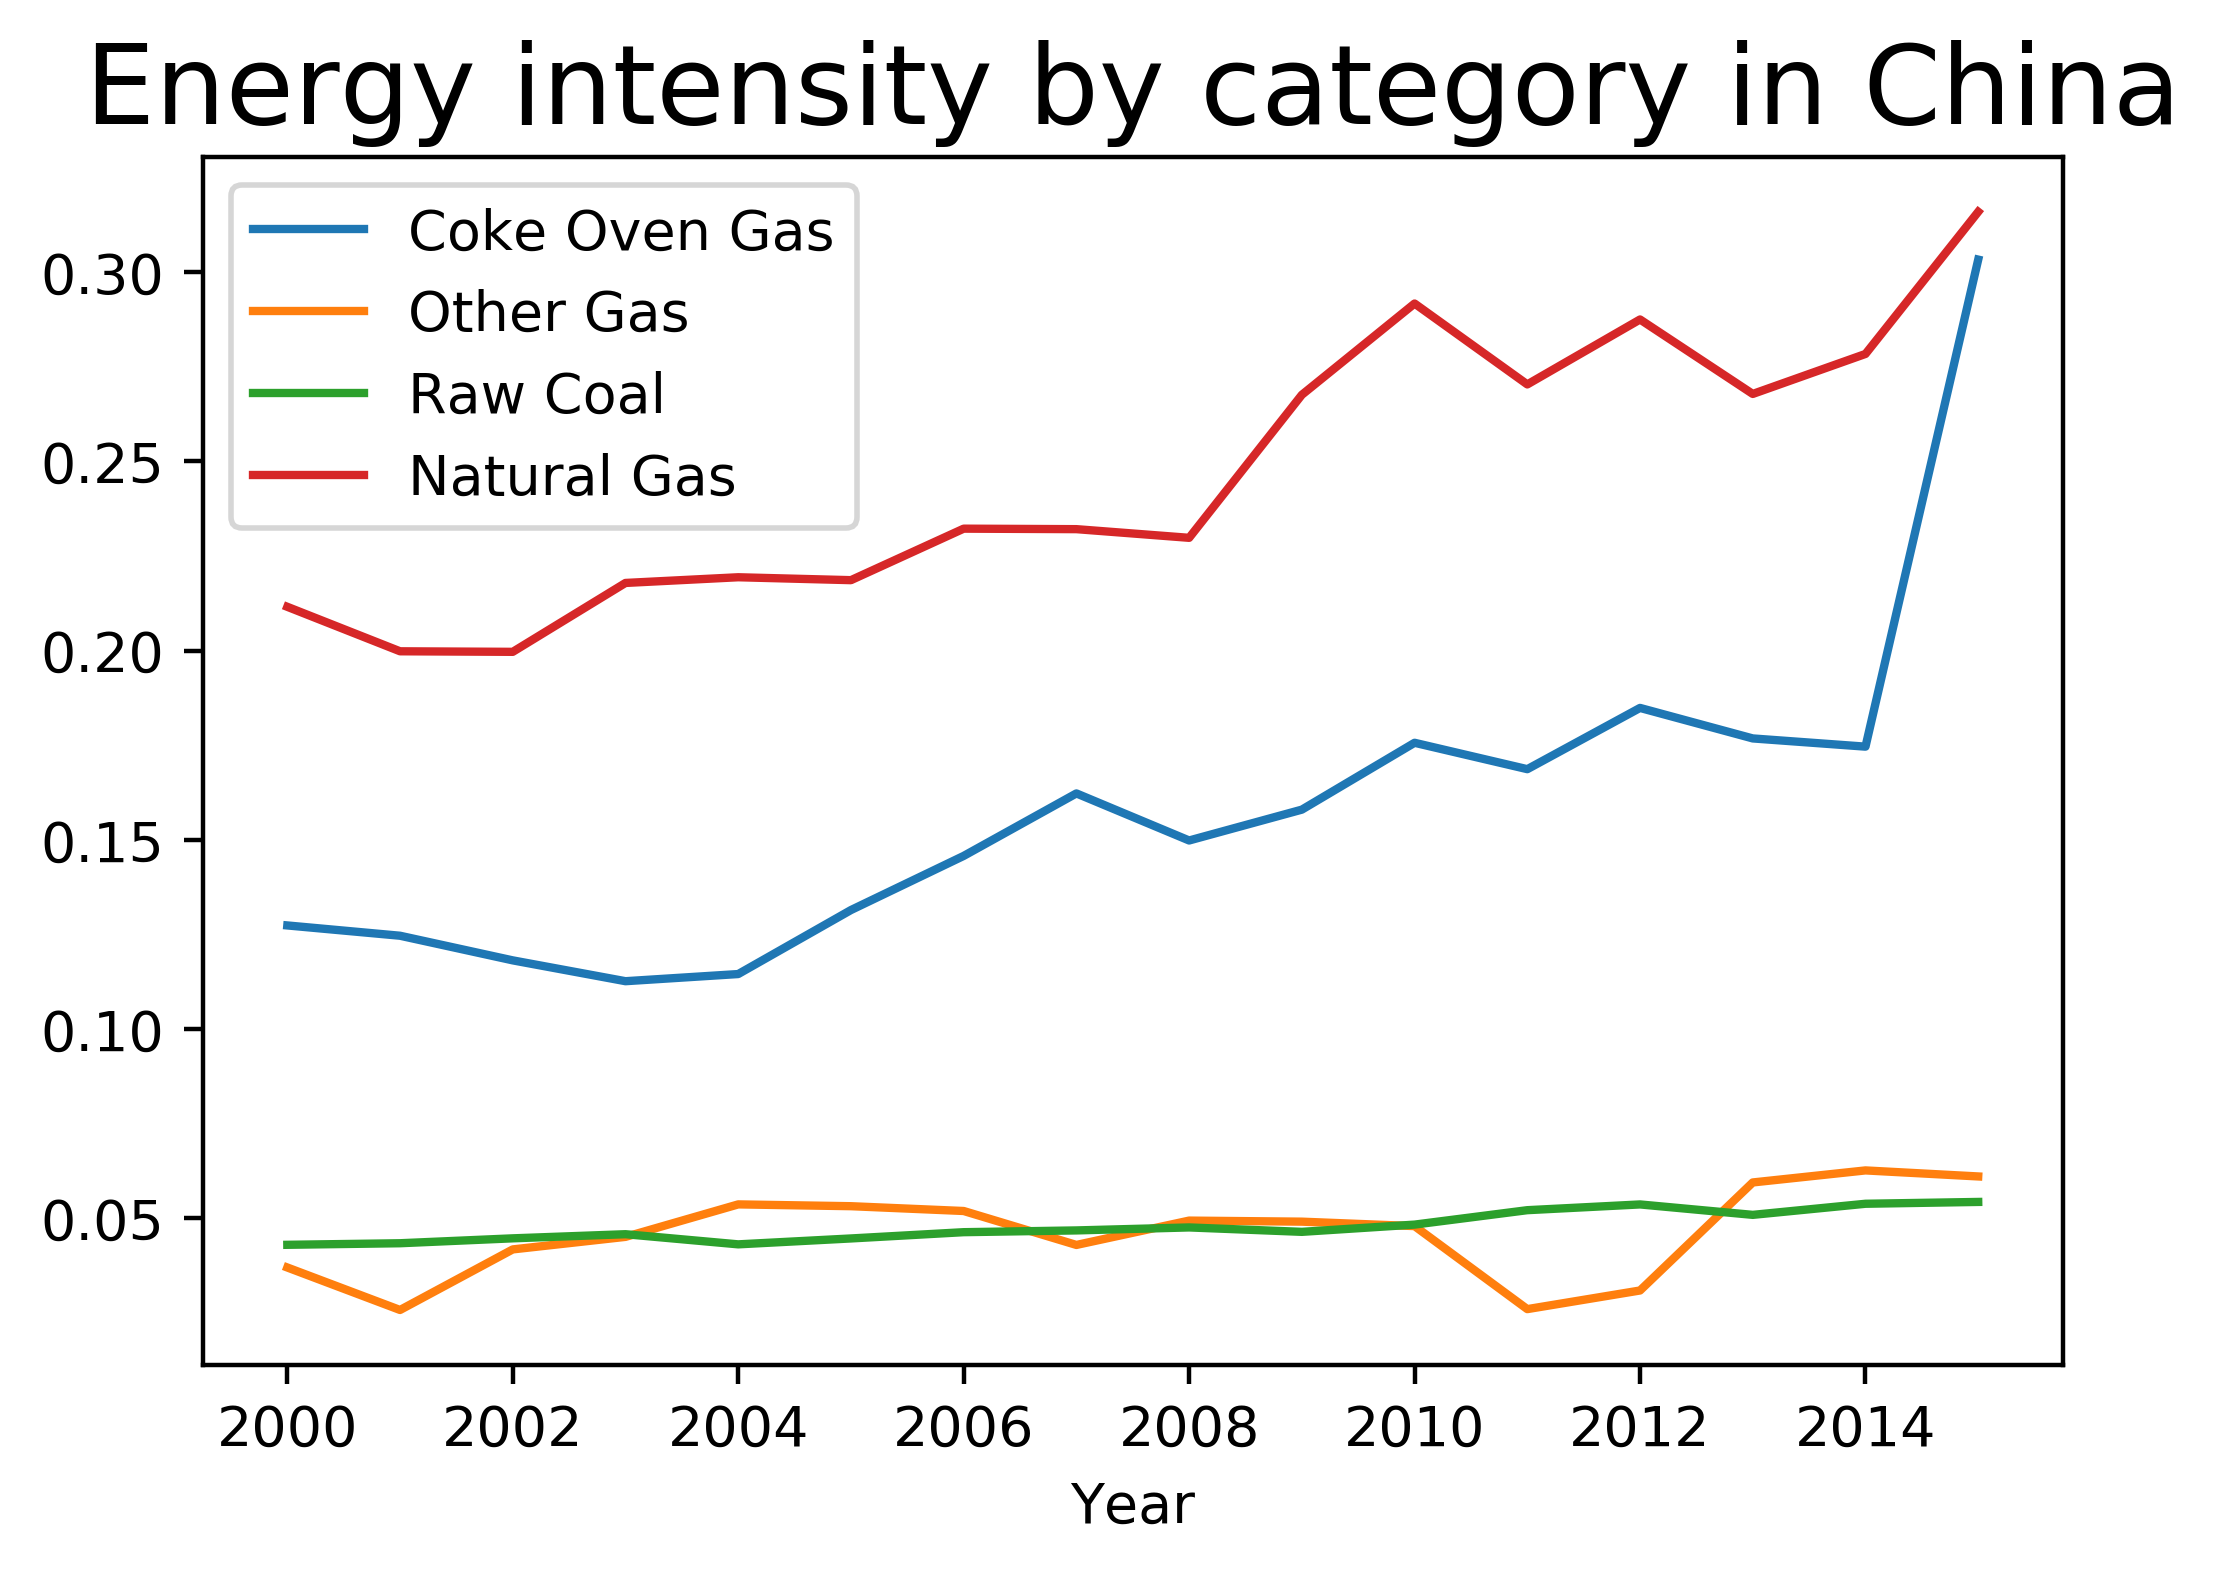

In [84]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
file = pd.read_csv("dist.csv")
file.head(5)
file.dtypes
file = file.set_index(["Year"])
plt.rcParams['figure.dpi'] = 400
fig,ax = plt.subplots()
file[["Coke Oven Gas","Other Gas","Raw Coal","Natural Gas"]].plot(ax = ax)

ax.set_title("Energy intensity by category in China",fontsize = 20)



#the carbon efficiency for other Gas and Coke oven Gas stands out as the most carbon costly energy...for the improvement in the energy structure in China, we should probabily consider drop using these two energies

In [145]:
import pandas as pd
import numpy as np
%matplotlib inline

In [146]:
file = pd.read_excel("oraganized-clean-null—with year.xls")
file.head(5)

province      GDP  trade activity      r/c    co2  year
0         Beijing  3707.96        0.000139  15.3381   61.7  2001
1         Tianjin  1919.09        0.000095  21.2299   66.8  2001
2           Hebei  1085.43        0.000053   13.213  266.6  2001
3          Shanxi   386.34        0.000050  12.2049   93.3  2001
4  Inner mongolia   211.12        0.000096  17.9163  117.6  2001

In [147]:
West=["Chongqing","Sichuan","Guizhou","Yunnan","Shaanxi","Gansu","Qinghai","Ningxia","Xinjiang"]
Middle = ["Henan","Inner mongolia","Jilin","Heilongjiang","Jiangxi","Hubei","Hunan","Shanxi","Anhui"]
East=["Hainan","Guangxi","Guangdong","Shandong","Tianjin","Beijing","Hebei","Liaoning","Shanghai","Jiangsu","Zhejiang","Fujian"]
file.loc[file["province"].isin(West) ,:].to_excel("West_withYear.xls")
file.loc[file["province"].isin(Middle),:].to_excel("Middle_withYear.xls")
file.loc[file["province"].isin(East),:].to_excel("East_withYear.xls")

In [148]:
final_year = pd.read_excel("final-with year.xls")
final_year.head(5)
final_year = final_year.rename(columns = {"trade activity":"trade","r/c":"structure"})

#try more function form get the most fitted regression

In [149]:
import statsmodels.formula.api as smf
print(smf.ols("np.log(co2)~np.log(GDP)+np.log(trade)+np.log(structure)+mid+east+year",data = final_year).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(co2)   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     84.56
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           3.75e-70
Time:                        15:26:11   Log-Likelihood:                -402.07
No. Observations:                 447   AIC:                             818.1
Df Residuals:                     440   BIC:                             846.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -88.7598     17.41

In [150]:
# generate the weighted index for a province for a year
file_year = pd.read_csv("dist.csv")
file_year.head(5)
title = file_year.columns.tolist()
title = title[1:]
print(title)
file_year

['Raw Coal', 'Cleaned Coal', 'Other Washed Coal', 'Briquettes', 'Coke', 'Coke Oven Gas', 'Other Gas', 'Other Coking Products', 'Crude Oil', 'Gasoline', 'Kerosene', 'Diesel Oil', 'Fuel Oil', 'LPG', 'Refinery Gas', 'Other Petroleum Products', 'Natural Gas']


Year  Raw Coal  Cleaned Coal  Other Washed Coal  Briquettes      Coke  \
0   2000  0.043027      0.033302           0.012445    0.013077  0.025117   
1   2001  0.043441      0.024745           0.011887    0.013386  0.025191   
2   2002  0.044737      0.041291           0.012747    0.014088  0.028060   
3   2003  0.045826      0.023008           0.015496    0.013495  0.027088   
4   2004  0.043147      0.016624           0.013289    0.014647  0.026336   
5   2005  0.044705      0.019983           0.013448    0.017771  0.023933   
6   2006  0.046362      0.019793           0.014384    0.018201  0.024346   
7   2007  0.046828      0.019279           0.016433    0.018083  0.025188   
8   2008  0.047614      0.018979           0.016148    0.022381  0.026321   
9   2009  0.046451      0.021315           0.014218    0.022968  0.025084   
10  2010  0.048364      0.035468           0.015539    0.029724  0.026409   
11  2011  0.052175      0.030768           0.018068    0.031293  0.026438   
12  2012  0.053692      0.034234           0.017478    0.033910  0.026076   
13  2013  0.050938      0.035446           0.016745    0.033143  0.024877   
14  2014  0.053870      0.031696           0.015181    0.030675  0.024806   
15  2015  0.054354      0.028765           0.015536    0.058891  0.025517   

    Coke Oven Gas  Other Gas  Other Coking Products  Crude Oil  Gasoline  \
0        0.127403   0.037034               0.030990   0.029523  0.028287   
1        0.124683   0.025808               0.028596   0.026449  0.029220   
2        0.118174   0.041812               0.028400   0.034049  0.029393   
3        0.112671   0.045122               0.029276   0.030288  0.029550   
4        0.114560   0.053704               0.070976   0.023316  0.030626   
5        0.131469   0.053226               0.032068   0.029516  0.037721   
6        0.145772   0.051958               0.036438   0.030294  0.037230   
7        0.162285   0.042990               0.040772   0.029672  0.040623   
8        0.149847   0.049423               0.036494   0.035161  0.037166   
9        0.157998   0.049143               0.031072   0.037158  0.039773   
10       0.175661   0.047965               0.028434   0.039449  0.040281   
11       0.168688   0.026035               0.034059   0.065812  0.040996   
12       0.184873   0.030958               0.033991   0.048605  0.041453   
13       0.176810   0.059501               0.034782   0.047029  0.035489   
14       0.174638   0.062680               0.037967   0.046618  0.035619   
15       0.303314   0.061086               0.055236   0.042801  0.034263   

    Kerosene  Diesel Oil  Fuel Oil       LPG  Refinery Gas  \
0   0.022028    0.025179  0.040053  0.026499      0.040606   
1   0.019769    0.024777  0.038560  0.029957      0.038462   
2   0.022084    0.024547  0.042273  0.029653      0.038070   
3   0.028151    0.024946  0.039766  0.028890      0.042491   
4   0.026864    0.024789  0.041094  0.028569      0.039928   
5   0.030368    0.030286  0.045319  0.033013      0.038287   
6   0.033770    0.030315  0.037772  0.030503      0.040816   
7   0.034172    0.032552  0.036254  0.031537      0.040333   
8   0.035781    0.032066  0.044057  0.035533      0.041695   
9   0.033850    0.034095  0.044737  0.035535      0.039308   
10  0.031489    0.034500  0.042443  0.034840      0.041727   
11  0.033247    0.034675  0.044077  0.036531      0.039892   
12  0.033988    0.033667  0.045301  0.036679      0.039692   
13  0.032994    0.031812  0.041488  0.031482      0.037927   
14  0.033442    0.032224  0.041322  0.027463      0.038026   
15  0.032474    0.032372  0.040919  0.024227      0.036548   

    Other Petroleum Products  Natural Gas  
0                   0.000872     0.211584  
1                   0.000731     0.199832  
2                   0.001062     0.199689  
3                   0.000844     0.217890  
4                   0.000607     0.219394  
5                   0.001116     0.218624  
6                   0.000827     0.232

# adding energy efficiency index as a regressor

#now we are curious about whether the energy efficiency in different province within different year made a difference in the total co2 emission
#to do that, we must generate an energy efficiency indicator for each province each yeat.
#To do that we use the weighted average carbon efficiency (generate the energy efficiency of each energy using the national data and weight by the provincial energy consumption)

In [151]:
import pandas as pd
province = ['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'InnerMongolia', 'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan', 'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou', 'Yunnan', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia', 'Xinjiang']
list_new= []
def get_row(year):
    row_year = file_year.loc[file_year["Year"] == year,['Raw Coal', 'Cleaned Coal', 'Other Washed Coal', 'Briquettes', 'Coke', 'Coke Oven Gas', 'Other Gas', 'Other Coking Products', 'Crude Oil', 'Gasoline', 'Kerosene', 'Diesel Oil', 'Fuel Oil', 'LPG', 'Refinery Gas', 'Other Petroleum Products', 'Natural Gas']]
    return row_year
def get_province(year,province):
    row_province = pd.read_excel("Province energy inventory %s.xls"%year,sheet_name = province)
    
    row_province.index = [i for i in range(len(row_province.index.tolist()))]
    
    selected_province = row_province.loc[[1],['Raw Coal', 'Cleaned Coal', 'Other Washed Coal', 'Briquettes', 'Coke', 'Coke Oven Gas', 'Other Gas', 'Other Coking Products', 'Crude Oil', 'Gasoline', 'Kerosene', 'Diesel Oil', 'Fuel Oil', 'LPG', 'Refinery Gas', 'Other Petroleum Products', 'Natural Gas']]
    return selected_province

def compute_by_year(year,list_new):
    by_year = get_row(year)
    
   
    province = ['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'InnerMongolia', 'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan', 'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou', 'Yunnan', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia', 'Xinjiang']
    for i in province:
        
        province1 = get_province(year,i)
        province1 = province1.astype(float)
        a1 =np.array(province1)[0].tolist()
        a2 = np.array(by_year)[0].tolist()
        
        
#         total = com_sum(province1)
       
        
        value = sum_array(a1,a2)/np.array(province1)[0].sum()
#         for k in ['Raw Coal', 'Cleaned Coal', 'Other Washed Coal', 'Briquettes', 'Coke', 'Coke Oven Gas', 'Other Gas', 'Other Coking Products', 'Crude Oil', 'Gasoline', 'Kerosene', 'Diesel Oil', 'Fuel Oil', 'LPG', 'Refinery Gas', 'Other Petroleum Products', 'Natural Gas']:
#             value += province[k][year]*by_year[k][1]
#             print(value)
        
        list_new.append(value)
    return list_new

def sum_array(a1,a2):
    value =0
    for e in range(len(a1)):
        value +=a1[e]*a2[e]
    return value

def compute():
    year=[o+2001 for o in range(15)]
    for p in year:
        
        
        compute_by_year(p,list_new)
    return list_new
# print(compute())
re = compute()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


#we check the generateded carbon effciency index data, because we generate it in the order of other datas by province so that the data matches when we join it into the previous dataframe

In [175]:
data = pd.DataFrame({"carbon_efficiency_index":re})
data.to_excel("carbon_efficiency_index.xlsx")
data.head(5)

carbon_efficiency_index
0                 0.034596
1                 0.037905
2                 0.035498
3                 0.035406
4                 0.036071

#after joining the new regressor, we still need to add two dummies, so we redo the categorization by regipn procedure as before

In [176]:
file = pd.read_excel("organized_+carbon_index.xls")

In [177]:
West=["Chongqing","Sichuan","Guizhou","Yunnan","Shaanxi","Gansu","Qinghai","Ningxia","Xinjiang"]
Middle = ["Henan","Inner mongolia","Jilin","Heilongjiang","Jiangxi","Hubei","Hunan","Shanxi","Anhui"]
East=["Hainan","Guangxi","Guangdong","Shandong","Tianjin","Beijing","Hebei","Liaoning","Shanghai","Jiangsu","Zhejiang","Fujian"]
file.loc[file["province"].isin(West) ,:].to_excel("West_Year_carbon.xls")
file.loc[file["province"].isin(Middle),:].to_excel("Middle_Year_carbon.xls")
file.loc[file["province"].isin(East),:].to_excel("East_Year_carbon.xls")

#After adding the dummy, we open the organized file and check the data

In [229]:
file =pd.read_excel("final_with_carbon.xls")
file.head(5)

province      GDP  trade activity       r/c    co2  year  \
21.0  Chongqing  1976.86        0.000009  5.039177   56.5  2001   
22.0    Sichuan  1492.04        0.000021  7.363546  105.8  2001   
23.0    Guizhou   302.75        0.000021  5.456303   55.6  2001   
24.0     Yunnan   673.06        0.000030  4.598389   58.6  2001   
25.0    Shaanxi   733.85        0.000028  5.144240   70.4  2001   

      carbon_efficiency_index  mid  east  
21.0                 0.039875    0     0  
22.0                 0.039995    0     0  
23.0                 0.040289    0     0  
24.0                 0.036041    0     0  
25.0                 0.038487    0     0

In [230]:
final2 = file.rename(columns = {"trade activity":"trade","r/c":"structure"})
final2["trade_adj"] = final2["trade"]*100000
final2.head(5)


province      GDP     trade  structure    co2  year  \
21.0  Chongqing  1976.86  0.000009   5.039177   56.5  2001   
22.0    Sichuan  1492.04  0.000021   7.363546  105.8  2001   
23.0    Guizhou   302.75  0.000021   5.456303   55.6  2001   
24.0     Yunnan   673.06  0.000030   4.598389   58.6  2001   
25.0    Shaanxi   733.85  0.000028   5.144240   70.4  2001   

      carbon_efficiency_index  mid  east  trade_adj  
21.0                 0.039875    0     0   0.927688  
22.0                 0.039995    0     0   2.077129  
23.0                 0.040289    0     0   2.135260  
24.0                 0.036041    0     0   2.954833  
25.0                 0.038487    0     0   2.809839

#Finally we regress all factors on co2 emission

In [232]:
import statsmodels.formula.api as smf
import numpy as np
print(smf.ols("np.log(co2)~np.log(GDP)+trade_adj+np.log(structure)+mid+east+np.log(carbon_efficiency_index)",data = final2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(co2)   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     74.56
Date:                Fri, 30 Nov 2018   Prob (F-statistic):           5.98e-64
Time:                        00:28:25   Log-Likelihood:                -416.70
No. Observations:                 447   AIC:                             847.4
Df Residuals:                     440   BIC:                             876.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
#from the regression result, we can see that the carbon efficiency of energ

# try to draw a map..

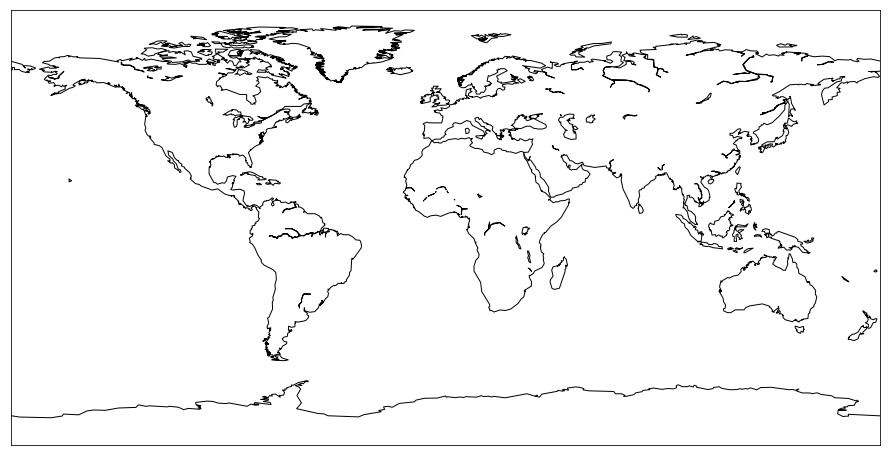

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

plt.figure(figsize=(16,8))
m = Basemap()
m.drawcoastlines()

plt.show()


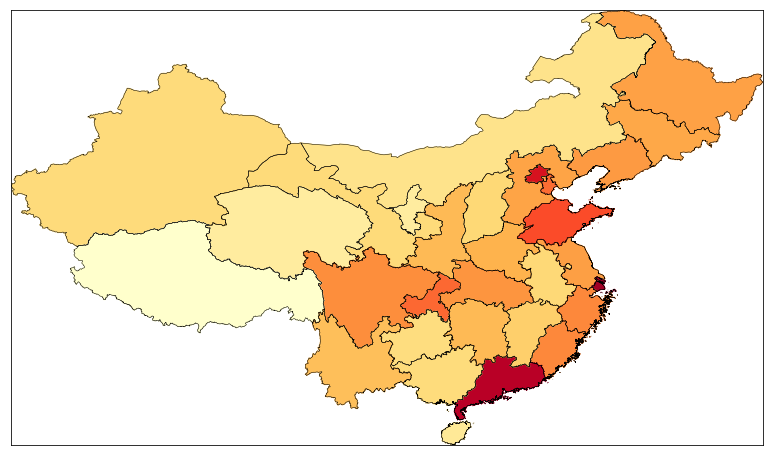

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
plt.figure(figsize=(16,8))
m = Basemap(
    llcrnrlon=73.55770111084013, 
    llcrnrlat=18.159305572509766, 
    urcrnrlon=134.7739257812502, 
    urcrnrlat=53.56085968017586
)
# 31个省、直辖市、自治区
m.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)
df = pd.read_excel('gdp1.xls')


df.set_index('province', inplace=True)
statenames=[]
colors={}
cmap = plt.cm.YlOrRd
vmax = 6000
vmin = 0
for shapedict in m.states_info:
    s = shapedict['NAME_1']
    if s == 'Nei Mongol':
        s = "Inner mongolia"
    elif s == 'Ningxia Hui':
        s = "Ningxia"
    elif s == 'Xinjiang Uygur':
        s = "Xinjiang"
    statenames.append(s)
    pop = df['GDP'][s]
    colors[s] = cmap(np.sqrt((pop - vmin) / (vmax - vmin)))[:3]


ax = plt.gca()
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)


plt.show()







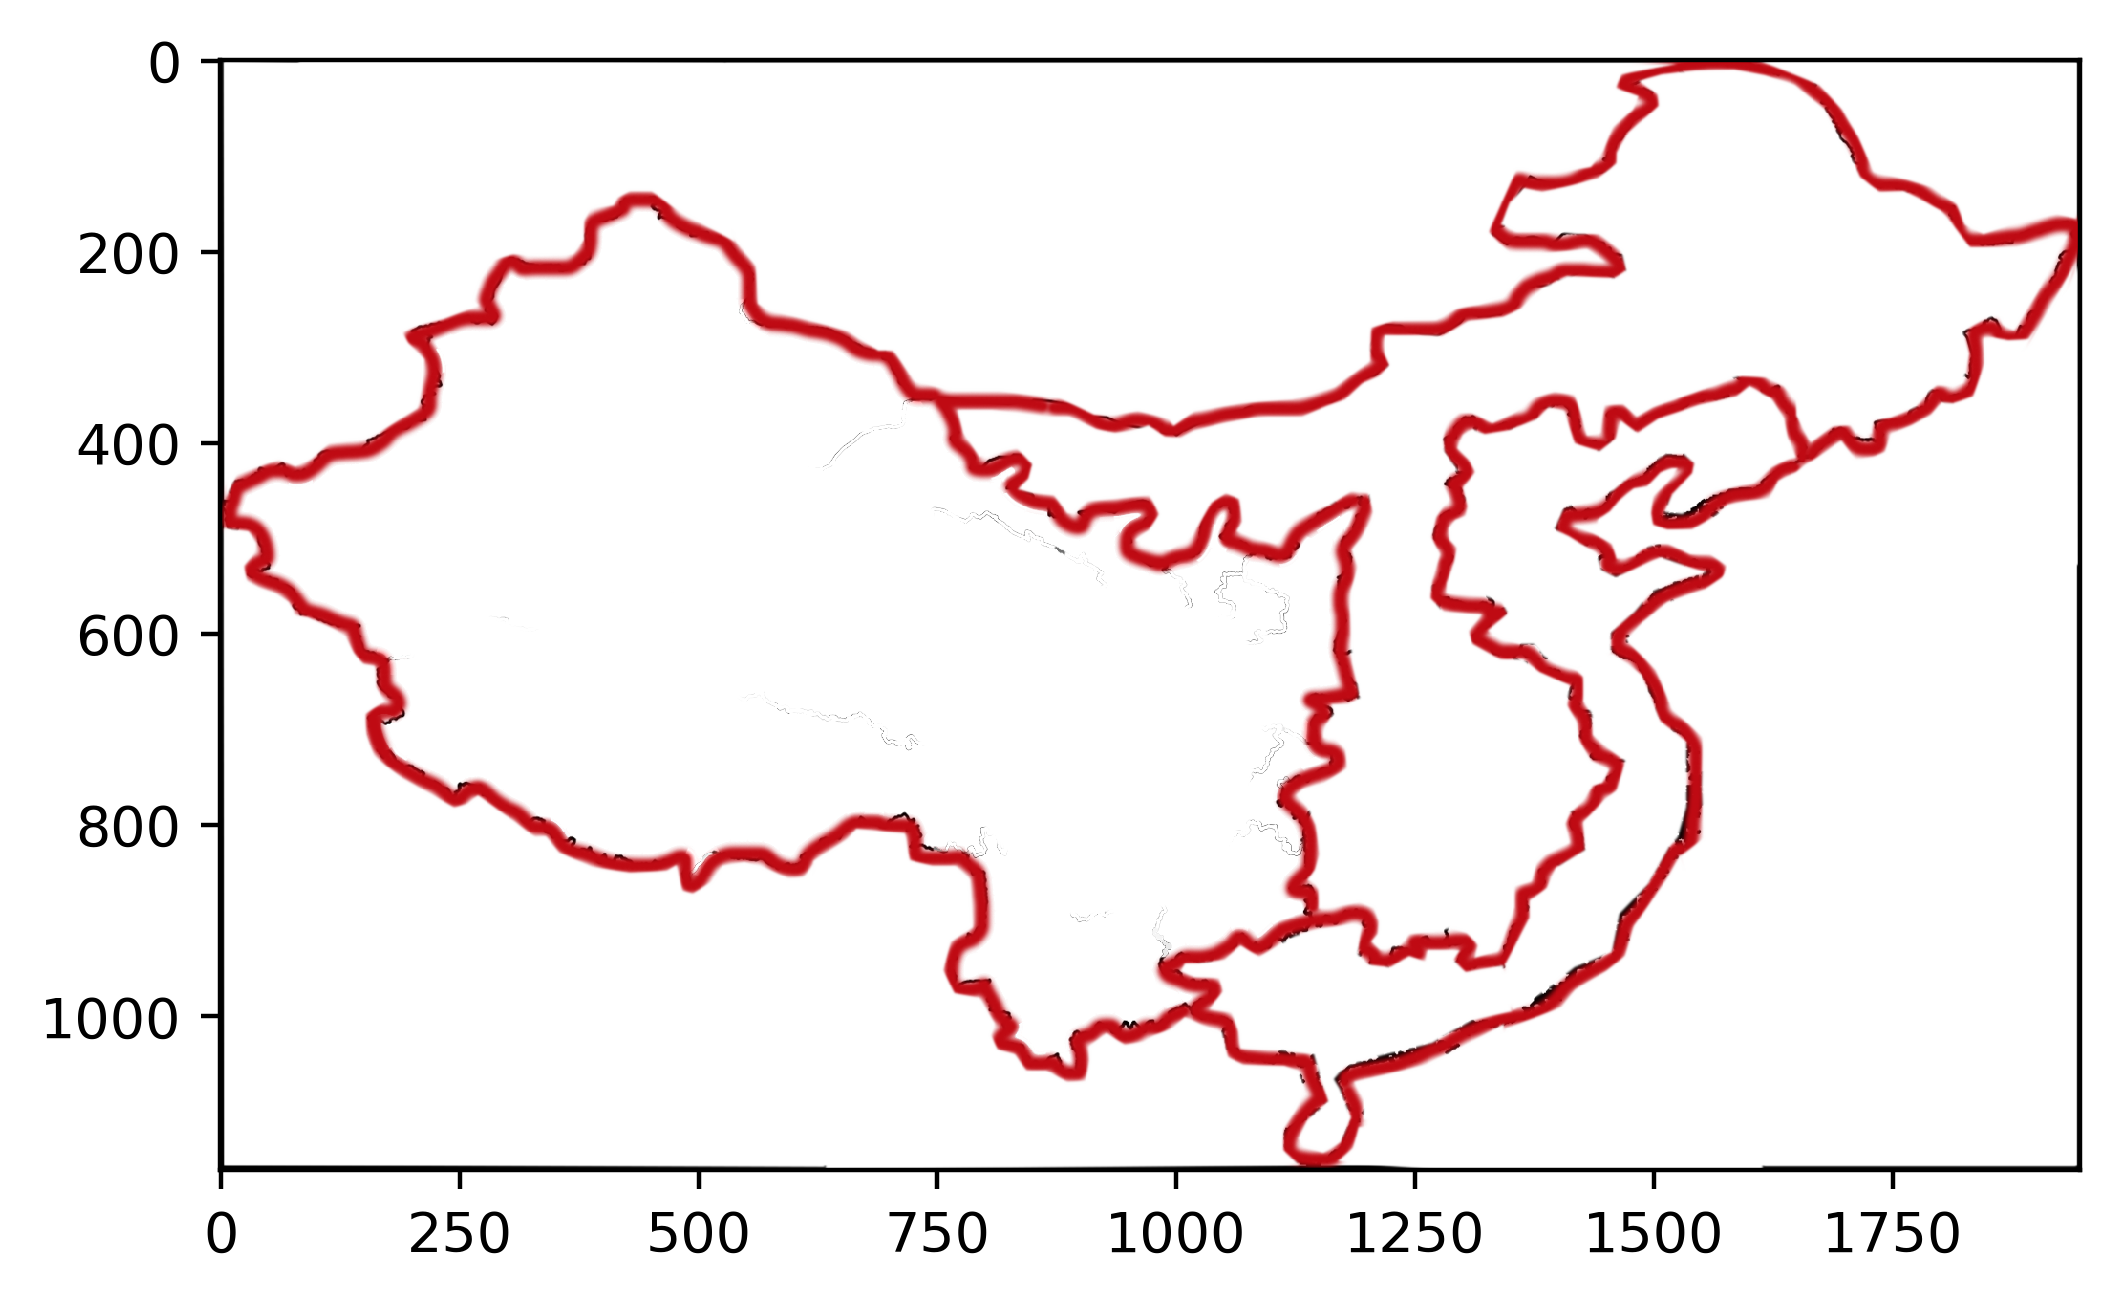

         province  tradeactivity
0         Beijing       0.000139
1         Tianjin       0.000095
2           Hebei       0.000053
3          Shanxi       0.000050
4  Inner mongolia       0.000096


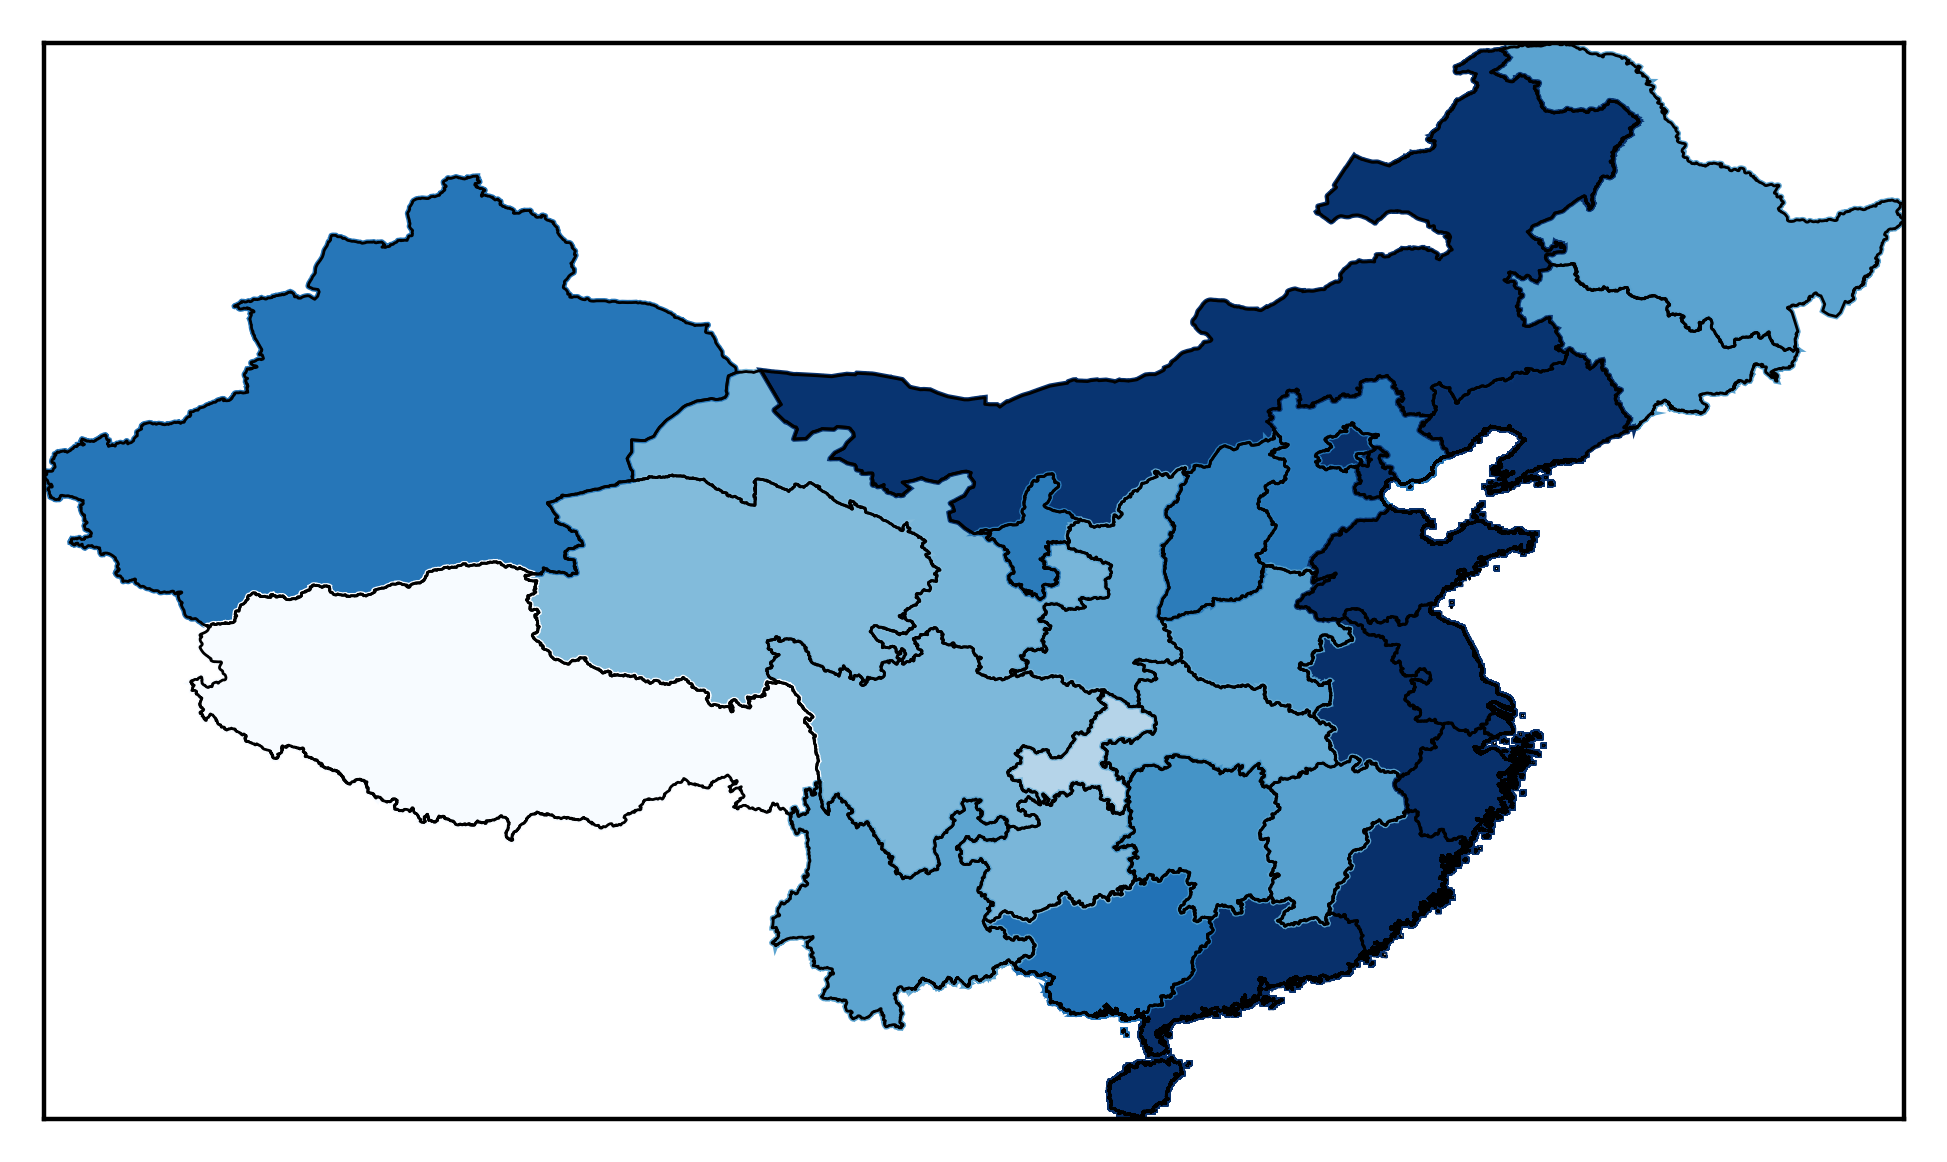

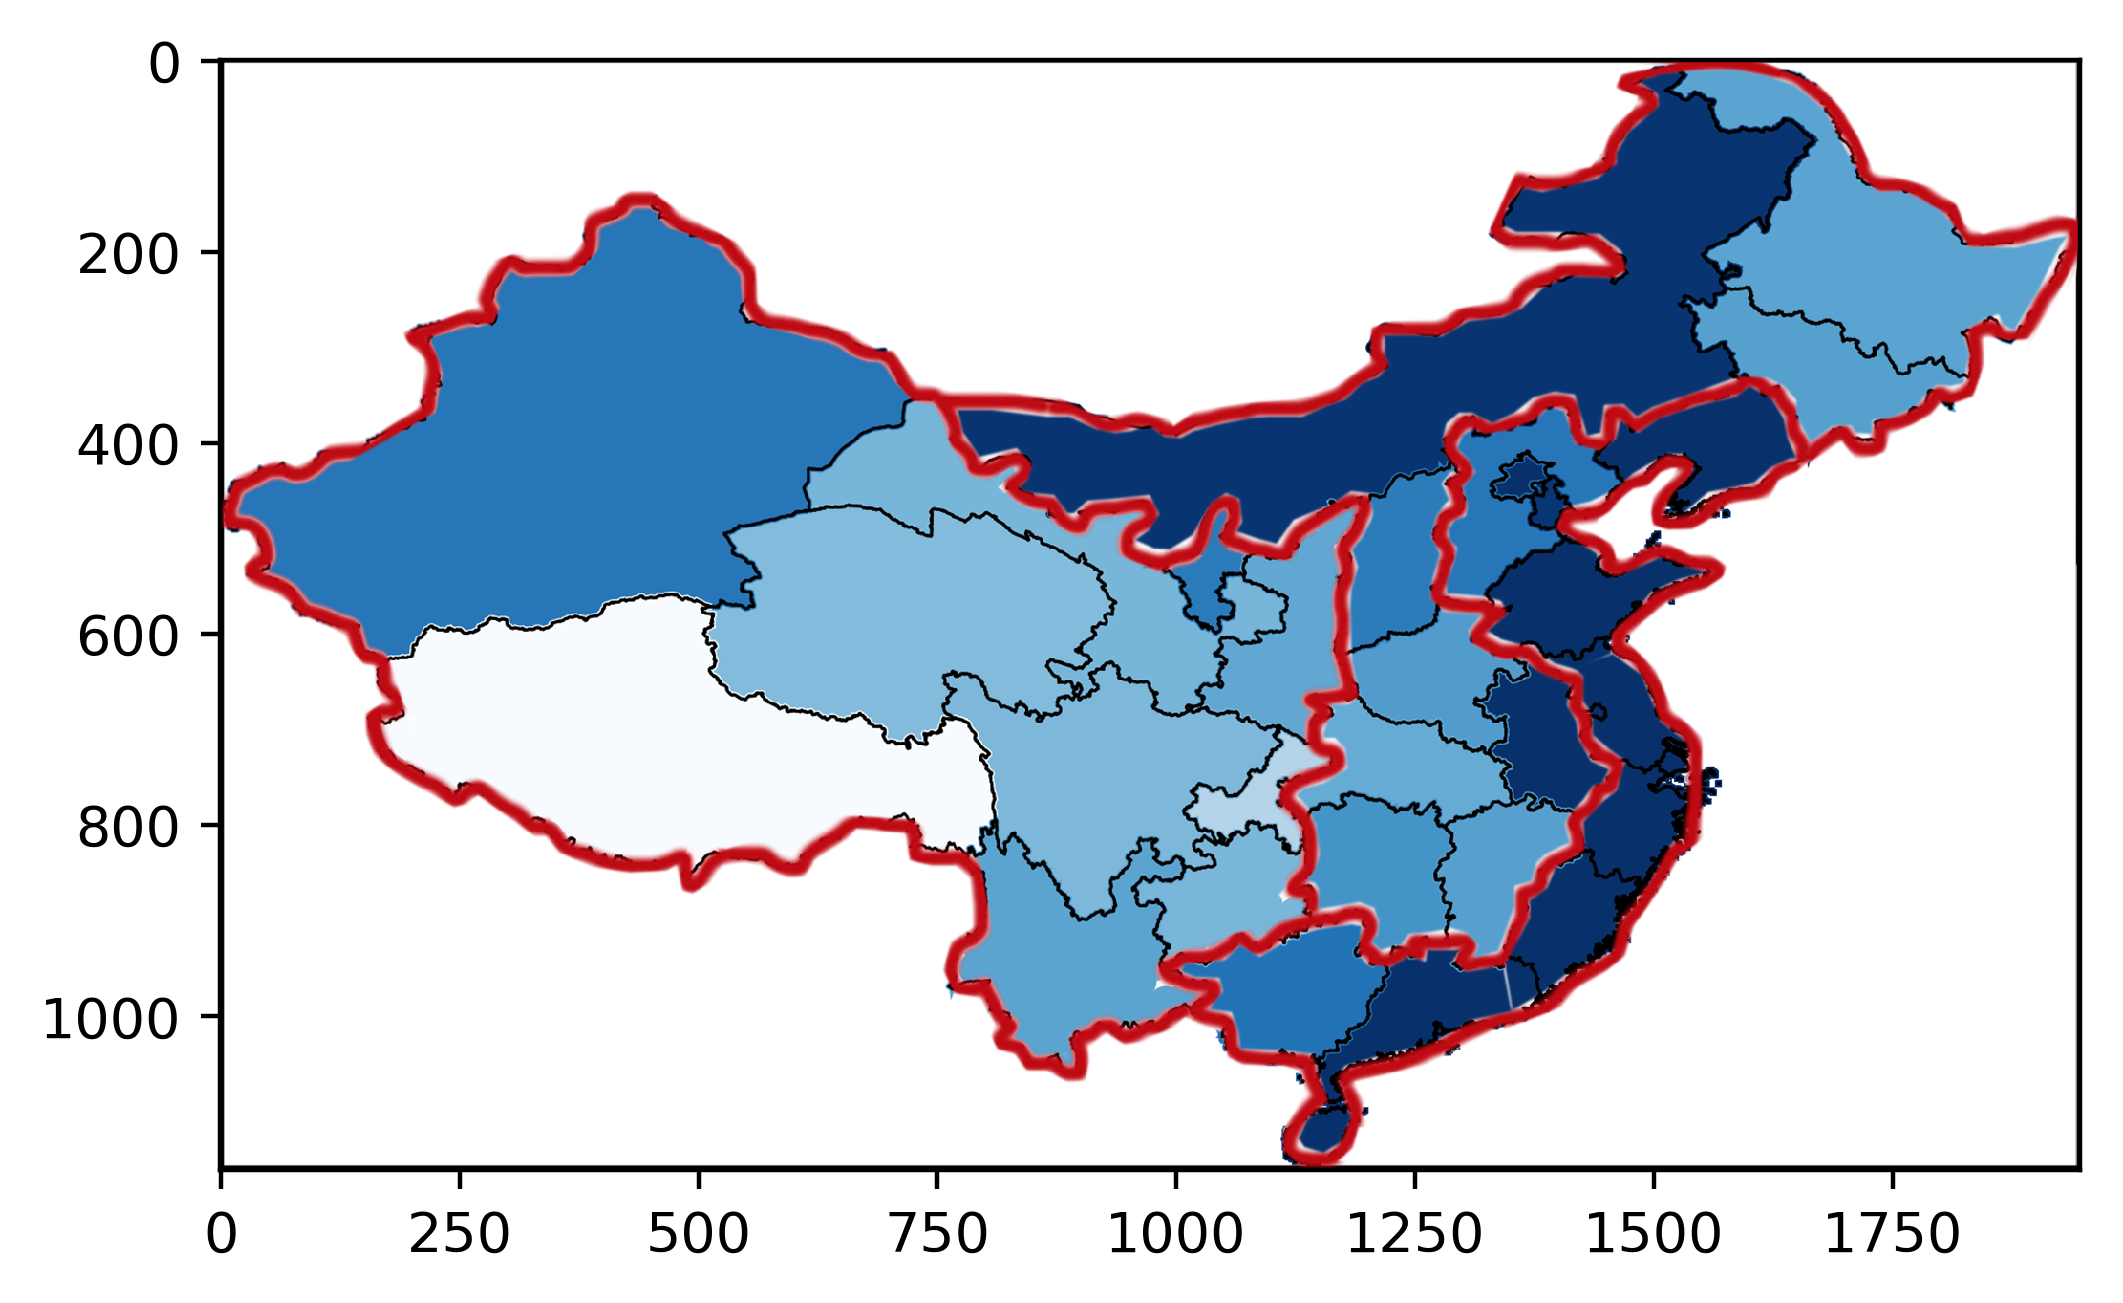

In [100]:
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
m = Basemap(
    llcrnrlon=73.55770111084013, 
    llcrnrlat=18.159305572509766, 
    urcrnrlon=134.7739257812502, 
    urcrnrlat=53.56085968017586
)

m.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)
df = pd.read_excel('organizeddata.xls')
print(df.head(5))

df.set_index('province', inplace=True)
statenames=[]
colors={}
cmap = plt.cm.Blues
vmax = 1e-4
vmin = 0
for shapedict in m.states_info:
    s = shapedict['NAME_1']
    if s == 'Nei Mongol':
        s = "Inner mongolia"
    elif s == 'Ningxia Hui':
        s = "Ningxia"
    elif s == 'Xinjiang Uygur':
        s = "Xinjiang"
    statenames.append(s)
    pop = df['tradeactivity'][s]
    colors[s] = cmap(np.sqrt((pop - vmin) / (vmax - vmin)))[:3]
   


ax = plt.gca()
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)




plt.show()
lena = mpimg.imread('GDP.png') 



plt.imshow(lena)

#the darket, the more trade activity

In [158]:
co2 = pd.read_excel("Province sectoral CO2 emissions 2001.xlsx")

co2["Total"].to_excel("co2_2001.xlsx")
co2.head(5)



Total  Raw Coal  Cleaned Coal  Other Washed Coal  Briquettes  \
Beijing         77.4      34.3           0.1                0.1         0.1   
Tianjin         60.4      38.3           0.2                0.0         0.0   
Hebei          251.5     162.2           0.4                8.1         1.2   
Shanxi         184.2     108.0           0.0                3.5         0.0   
InnerMongolia  115.8      87.8           0.4                3.5         1.2   

               Coke  Coke Oven Gas  Other Gas  Other Coking Products  \
Beijing        12.2            1.7        7.4                    0.6   
Tianjin         3.7            0.7        0.0                    0.3   
Hebei          38.8            3.4        7.1                    0.8   
Shanxi         57.1            2.1        1.1                    0.7   
InnerMongolia   8.6            1.1        4.7                    0.1   

               Crude Oil  Gasoline  Kerosene  Diesel Oil  Fuel Oil  LPG  \
Beijing              0.0       4.0       3.9         3.2       2.4  0.9   
Tianjin              1.1       3.2       0.3         5.7       2.5  1.1   
Hebei                0.8       4.1       0.1         5.2       1.8  1.0   
Shanxi               0.0       2.6       0.2         3.4       0.4  0.1   
InnerMongolia        0.3       2.1       0.0         2.7       1.1  0.1   

               Refinery Gas  Other Petroleum Products  Natural Gas  Process  
Beijing                 0.6                       0.2          3.2      2.4  
Tianjin                 0.6                       0.0          1.7      1.0  
Hebei                   0.8                       0.0          1.4     14.2  
Shanxi                  0.0                       0.0          0.3      4.6  
InnerMongolia           0.1                       0.0          0.0      2.0

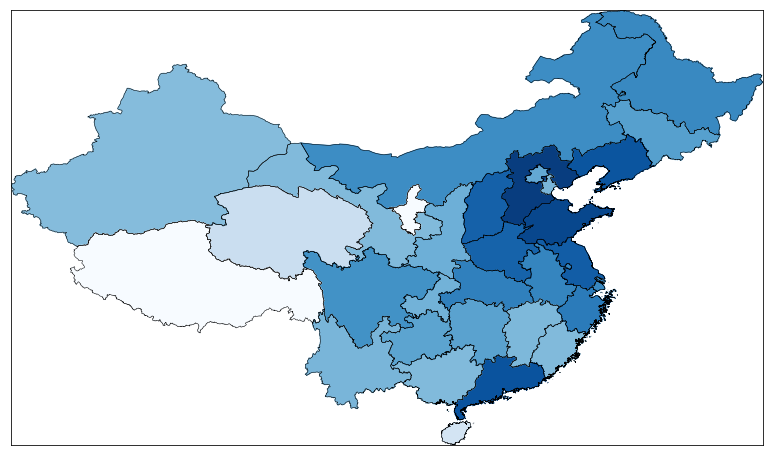

<Figure size 1152x576 with 0 Axes>

In [166]:
plt.figure(figsize=(16,8))
m3 = Basemap(
    llcrnrlon=73.55770111084013, 
    llcrnrlat=18.159305572509766, 
    urcrnrlon=134.7739257812502, 
    urcrnrlat=53.56085968017586
)

m3.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)

df = pd.read_excel("co2_2001.xlsx")

df.set_index('province', inplace=True)
statenames=[]
colors={}
cmap = plt.cm.Blues
vmax = 280
vmin = 0
for shapedict in m.states_info:
    s = shapedict['NAME_1']
    if s == 'Nei Mongol':
        s = "Inner mongolia"
    elif s == 'Ningxia Hui':
        s = "Ningxia"
    elif s == 'Xinjiang Uygur':
        s = "Xinjiang"
    statenames.append(s)
    pop = df['Total'][s]
    colors[s] = cmap(np.sqrt((pop - vmin) / (vmax - vmin)))[:3]
   


ax = plt.gca()
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)


plt.show()



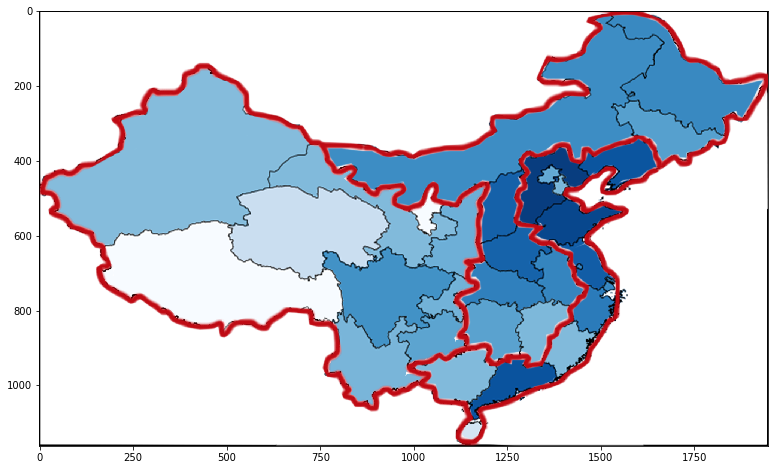

In [168]:
plt.figure(figsize=(16,8))
lena = mpimg.imread('co2_2001.png') 



plt.imshow(lena)

In [169]:
co2 = pd.read_excel("Province sectoral CO2 emissions 2015.xlsx")

co2["Total"].to_excel("co2_2015.xlsx")
co2.head(5)

Total  Raw Coal  Cleaned Coal  Other Washed Coal  Briquettes  \
Beijing         95.2      18.6           0.0                2.3         0.5   
Tianjin        151.9      68.9           1.7                0.2         0.3   
Hebei          734.1     305.3          11.9                2.2         4.2   
Shanxi         440.2     273.1           7.9               16.5         2.9   
InnerMongolia  584.7     480.2           1.1                3.2         0.6   

                Coke  Coke Oven Gas  Other Gas  Other Coking Products  \
Beijing          0.0            0.0        0.5                    0.0   
Tianjin         26.0            0.7       10.2                    2.0   
Hebei          221.4           14.0       86.8                    3.3   
Shanxi          59.4           17.7       12.4                    2.1   
InnerMongolia   30.6            5.4        8.1                    6.3   

               Crude Oil  Gasoline  Kerosene  Diesel Oil  Fuel Oil  LPG  \
Beijing              0.6      13.5      16.5         5.6       0.2  1.6   
Tianjin              0.7       7.7       2.0        10.9       1.6  1.7   
Hebei                0.5      13.8       0.2        23.1       1.6  2.8   
Shanxi               0.0       6.1       0.8        16.0       0.0  0.4   
InnerMongolia        0.2       8.9       1.0        14.4       0.3  0.3   

               Refinery Gas  Other Petroleum Products  Natural Gas  Process  
Beijing                 2.5                       0.3         30.6      1.8  
Tianjin                 1.8                       0.0         13.2      2.3  
Hebei                   1.5                       0.1         15.0     26.5  
Shanxi                  0.0                       0.0         14.0     11.0  
InnerMongolia           0.0                       0.3          6.8     16.9

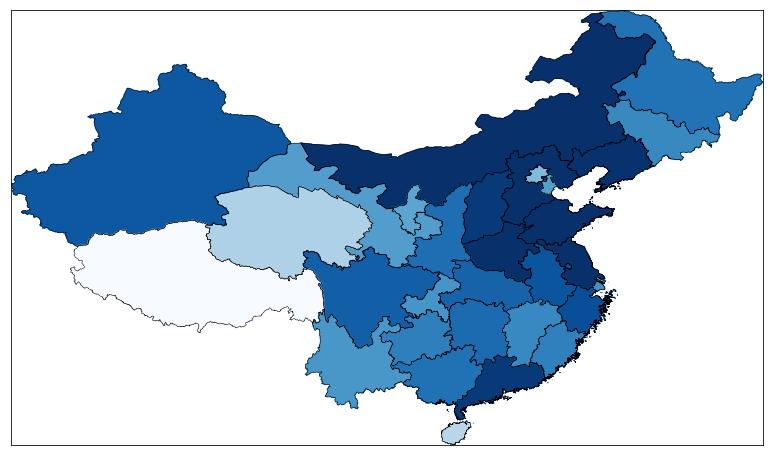

In [172]:
plt.figure(figsize=(16,8))
m3 = Basemap(
    llcrnrlon=73.55770111084013, 
    llcrnrlat=18.159305572509766, 
    urcrnrlon=134.7739257812502, 
    urcrnrlat=53.56085968017586
)

m3.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)

df = pd.read_excel("co2_2015.xlsx")

df.set_index('province', inplace=True)
statenames=[]
colors={}
cmap = plt.cm.Blues
vmax = 480
vmin = 0
for shapedict in m.states_info:
    s = shapedict['NAME_1']
    if s == 'Nei Mongol':
        s = "Inner mongolia"
    elif s == 'Ningxia Hui':
        s = "Ningxia"
    elif s == 'Xinjiang Uygur':
        s = "Xinjiang"
    statenames.append(s)
    pop = df['Total'][s]
    colors[s] = cmap(np.sqrt((pop - vmin) / (vmax - vmin)))[:3]
   


ax = plt.gca()
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)


plt.show()

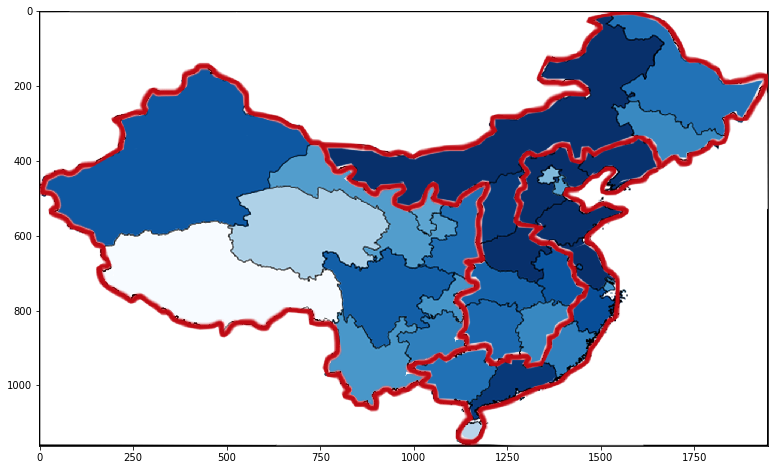

In [173]:
plt.figure(figsize=(16,8))
lena = mpimg.imread('co2_2015.png') 



plt.imshow(lena)

#plot the trade activity in different province in 2015

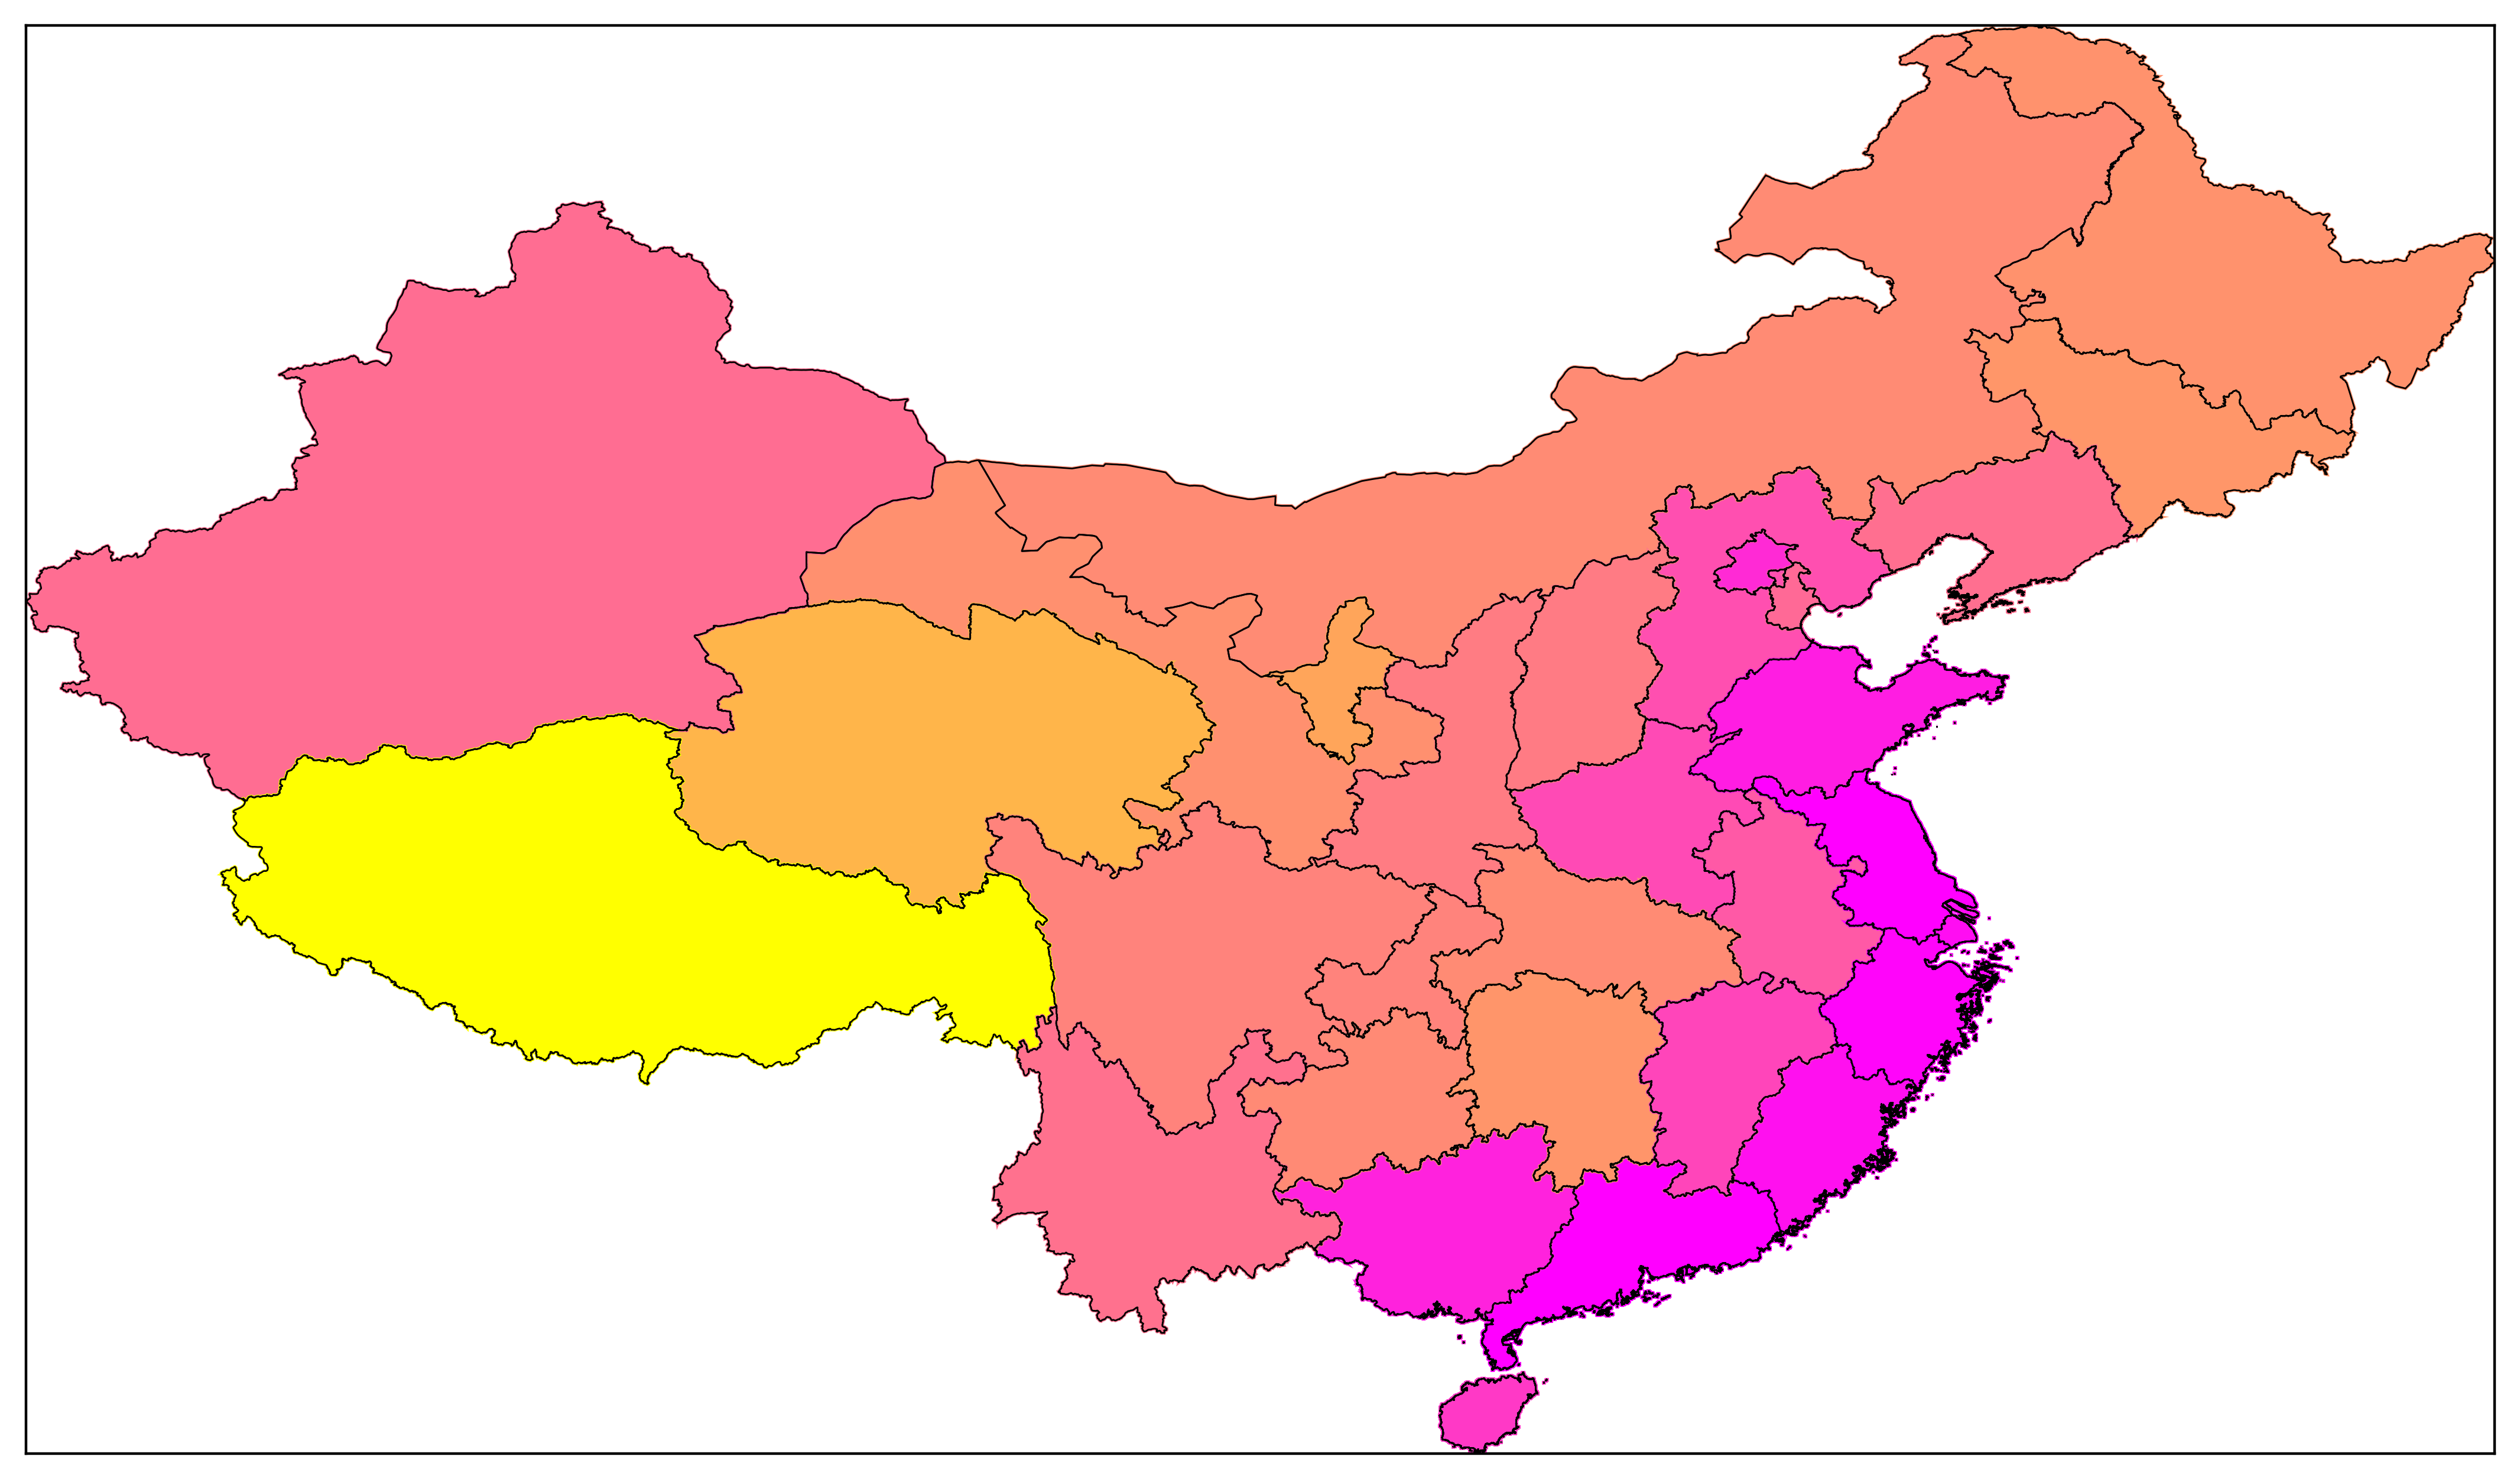

In [234]:

plt.figure(figsize=(16,8))
m4 = Basemap(
    llcrnrlon=73.55770111084013, 
    llcrnrlat=18.159305572509766, 
    urcrnrlon=134.7739257812502, 
    urcrnrlat=53.56085968017586
)

m4.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)

df = pd.read_excel("trade_activity 2015.xls")

df.set_index('province', inplace=True)
statenames=[]
colors={}
cmap = plt.cm.spring_r
vmax = 2
vmin = 0
for shapedict in m.states_info:
    s = shapedict['NAME_1']
    if s == 'Nei Mongol':
        s = "Inner mongolia"
    elif s == 'Ningxia Hui':
        s = "Ningxia"
    elif s == 'Xinjiang Uygur':
        s = "Xinjiang"
    statenames.append(s)
    pop = df['trade'][s]
    colors[s] = cmap(np.sqrt((pop - vmin) / (vmax - vmin)))[:3]
   


ax = plt.gca()
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)


plt.show()

In [ ]:
#more trade in the coastal, eastern china
#xinjiang also has more trade activity for t

In [2]:
import pandas as pd
data = pd.read_excel("final_with_carbon.xls")
data.head(5)

province      GDP  trade activity       r/c    co2  year  \
21.0  Chongqing  1976.86        0.000009  5.039177   56.5  2001   
22.0    Sichuan  1492.04        0.000021  7.363546  105.8  2001   
23.0    Guizhou   302.75        0.000021  5.456303   55.6  2001   
24.0     Yunnan   673.06        0.000030  4.598389   58.6  2001   
25.0    Shaanxi   733.85        0.000028  5.144240   70.4  2001   

      carbon_efficiency_index  mid  east  
21.0                 0.039875    0     0  
22.0                 0.039995    0     0  
23.0                 0.040289    0     0  
24.0                 0.036041    0     0  
25.0                 0.038487    0     0

In [8]:
data = data.rename(columns = {"trade activity":"Trade","r/c":"raw_to_clean"})
data.head(5)

province      GDP     Trade  raw_to_clean    co2  year  \
21.0  Chongqing  1976.86  0.000009      5.039177   56.5  2001   
22.0    Sichuan  1492.04  0.000021      7.363546  105.8  2001   
23.0    Guizhou   302.75  0.000021      5.456303   55.6  2001   
24.0     Yunnan   673.06  0.000030      4.598389   58.6  2001   
25.0    Shaanxi   733.85  0.000028      5.144240   70.4  2001   

      carbon_efficiency_index  mid  east  
21.0                 0.039875    0     0  
22.0                 0.039995    0     0  
23.0                 0.040289    0     0  
24.0                 0.036041    0     0  
25.0                 0.038487    0     0

In [4]:
from patsy import dmatrices


In [37]:
y,x = dmatrices("co2~GDP+Trade+raw_to_clean+carbon_efficiency_index+mid+east",data=data)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
y_train,y_test,x_train, x_test =train_test_split(y,x,test_size = 0.3)

In [40]:
from sklearn.linear_model import LinearRegression as ols

In [41]:
ols().fit(x_train,y_train).predict(x_test)

array([[353.00738971],
       [129.93625666],
       [262.30224475],
       [300.34890177],
       [385.82207344],
       [406.12188932],
       [228.61408988],
       [164.89244654],
       [280.71392921],
       [210.80727018],
       [321.67081491],
       [259.09815694],
       [306.01787016],
       [ 78.097153  ],
       [105.19577386],
       [439.78162411],
       [243.30954251],
       [339.87805643],
       [ 87.95050092],
       [496.13684319],
       [393.08591089],
       [101.63254012],
       [223.55107828],
       [161.30017916],
       [379.20962556],
       [290.18227027],
       [265.70757486],
       [106.85063636],
       [332.55071789],
       [122.17950958],
       [160.85301911],
       [490.32968337],
       [180.05484966],
       [130.39146166],
       [205.7816136 ],
       [283.64124092],
       [134.57232543],
       [337.13811872],
       [293.17848927],
       [183.4689217 ],
       [165.89704409],
       [207.76239105],
       [189.38267259],
       [133

In [42]:
ols().fit(x_train,y_train).score(x_test,y_test)

0.1333798536876737

#assessing the regression by machine learning

(1)平均绝对误差(Mean Absolute Error, MAE)

(2)均方误差(Mean Squared Error, MSE)

(3)均方根误差(Root Mean Squared Error, RMSE)

In [49]:
from sklearn import metrics
import numpy as np
print("MSE:",metrics.mean_squared_error(y_test, ols().fit(x_train,y_train).predict(x_test)))

MSE: 28968.428944045645


In [52]:
print("MAE:",metrics.mean_absolute_error(y_test, ols().fit(x_train,y_train).predict(x_test)))

MAE: 133.33814885775016


In [50]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, ols().fit(x_train,y_train).predict(x_test))))

RMSE: 170.2011426049944


In [44]:
import seaborn as sns

%matplotlib inline

In [ ]:
#the distribution of all the regressors in the model

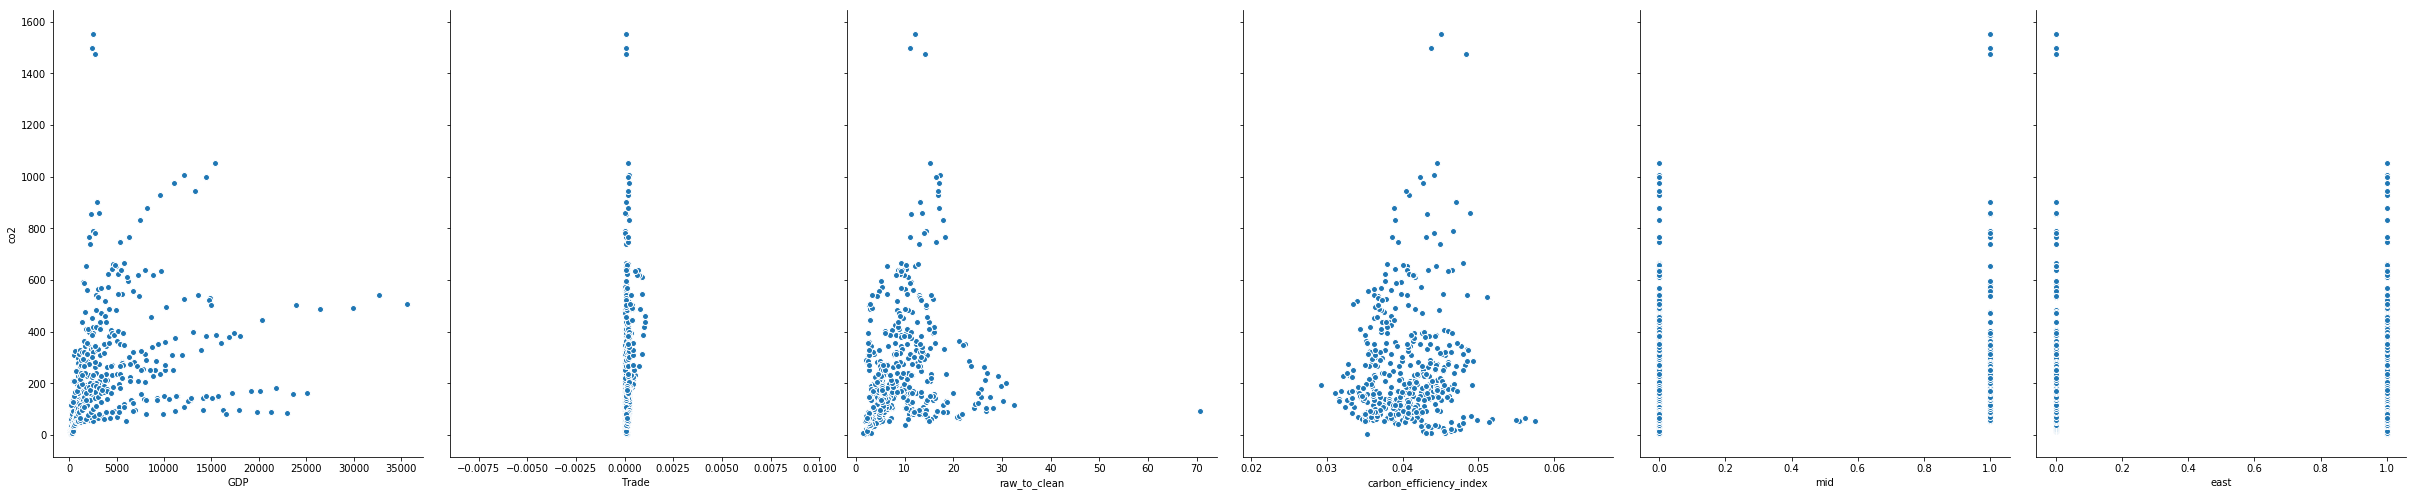

In [46]:
sns.pairplot(data, x_vars=["GDP","Trade","raw_to_clean","carbon_efficiency_index","mid","east"], y_vars='co2', size=7, aspect=0.8)

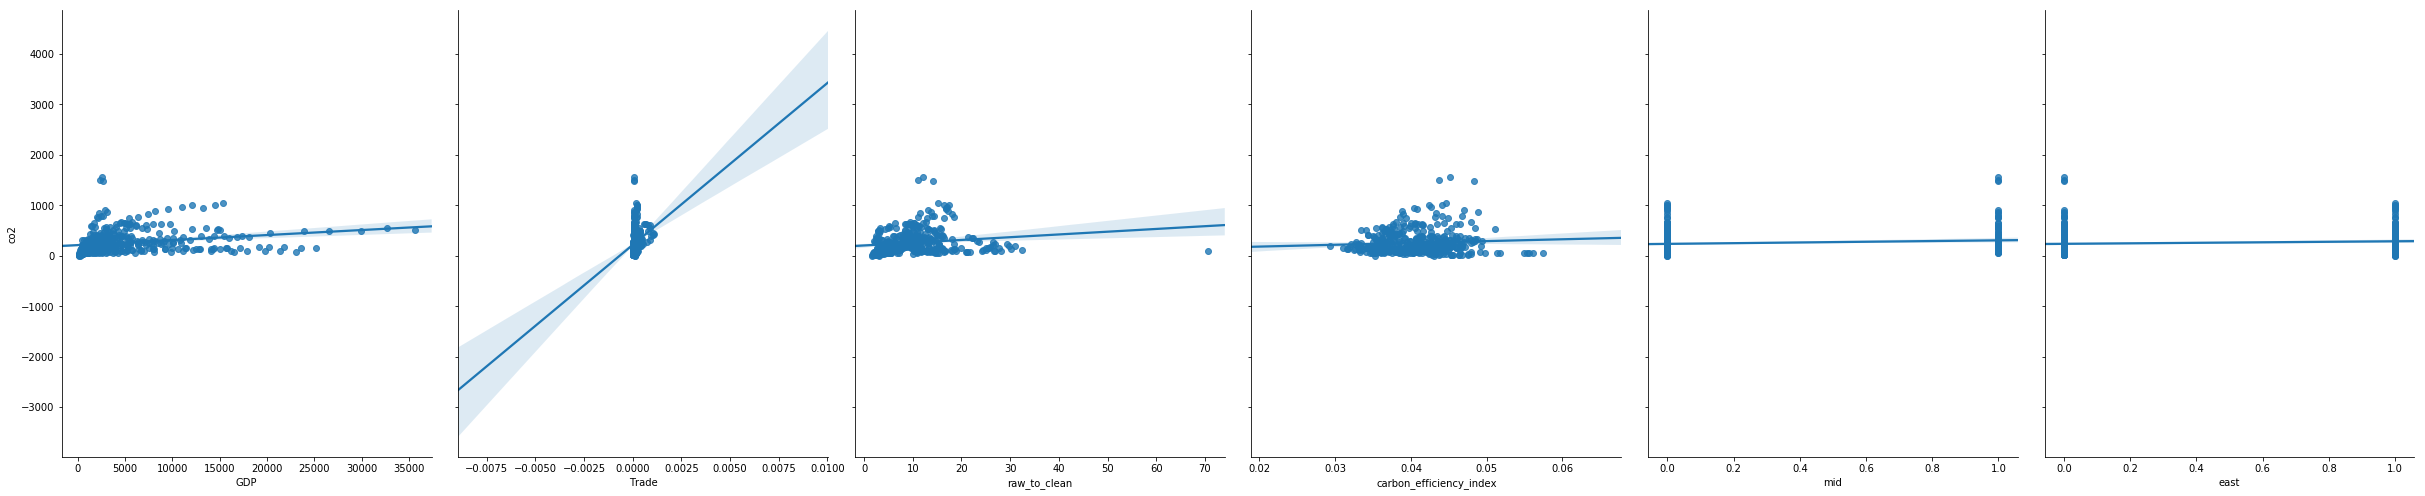

In [47]:
sns.pairplot(data, x_vars=["GDP","Trade","raw_to_clean","carbon_efficiency_index","mid","east"], y_vars='co2', size=7, aspect=0.8,kind="reg")

In [55]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
# import matplotlib.pyplot as plt
# plt.scatter(x=x_train,y=y_train)
model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(X_test)

[[1.00000000e+00 1.87080000e+03 3.01170088e-05 ... 4.26060000e-02
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.00100000e+03 9.87250000e-05 ... 3.61900000e-02
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.57172700e+04 4.73789946e-05 ... 4.58980000e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 1.52500000e+03 9.34740000e-05 ... 4.16830000e-02
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.25800000e+03 1.10873060e-04 ... 4.45370000e-02
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.20160000e+03 7.60890000e-04 ... 4.14840000e-02
  0.00000000e+00 1.00000000e+00]]


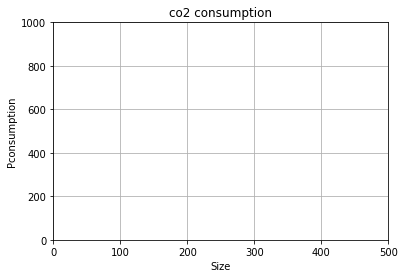

In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


def run_plt():
    plt.figure()
    plt.title('co2 consumption')
    plt.xlabel('Size')
    plt.ylabel('Pconsumption')
    plt.axis([0, 500, 0, 1000])
    plt.grid(True)
    return plt
plt = run_plt()

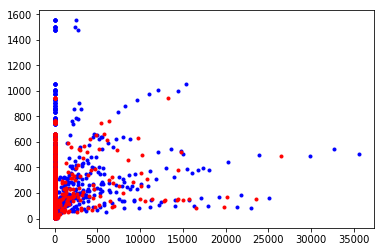

In [64]:
plt.plot(x_train, y_train, 'b.')  # 画原始的训练集的点
plt.plot(x_test, y_test, 'r.')

In [83]:
xx = np.linspace(0, 500, 7)  
xx_input = xx.reshape(xx.shape[0], 1)

In [82]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
yy = regressor.predict(xx_input)
plt.plot(xx, yy, 'c-')  # 画一元一次回归对应的结果
print('Linear Regression r-squared', regressor.score(x_test, y_test))

ValueError: shapes (7,1) and (7,1) not aligned: 1 (dim 1) != 7 (dim 0)

In [ ]:
#test if putting the regressor's dunctional form into higher is going to increase the fitness [risk of putting too many regressors in the model]


In [85]:
from sklearn.preprocessing import PolynomialFeatures


for i in range(2,5):

    quadratic_featurizer = PolynomialFeatures(i)  # 最多到二次方
    x_train_quadratic = quadratic_featurizer.fit_transform(x_train)
    x_test_quadratic = quadratic_featurizer.fit_transform(x_test)
    print(ols().fit(x_train_quadratic,y_train).score(x_test_quadratic,y_test))


0.2728100558326352
-0.580751884969928
0.23626206758691248


In [86]:
#by testing, the real data fitness may contain some of the regressor in the square functional form
#if doing so, the fitness of would increase to 27.3%

In [65]:
import pandas as pd
province = ['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'InnerMongolia', 'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan', 'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou', 'Yunnan', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia', 'Xinjiang']

    
year = [2001+k for k in range(15)]
def add(year,province):
    
    file1 = pd.read_excel("Province energy inventory %s.xls"%str(year),sheet_name = province)
    file1.index = [l for l in range(len(file1.index.tolist()))]
    file1 = file1[1:51]
    file1.loc[str(year)] = file1.apply(lambda x: x.sum())
    
    file.append(file1[0:1])   #sum the rows and get the sum
    return file1[50:51]
def generate(year, file,province):
    
    for a in year:    
           
        file = file.append(add(a,province))
    return file #plug in the sum throughout the year
def select(year,file,province):
    file = generate(year,file,province)    
    new_file = file.tail(15)   #generate a file only gets the sum of the year
    new_file = new_file.astype('float')
    return new_file
coal_solid=['Raw Coal','Briquettes','Coke','Other Coking Products','Cleaned Coal','Other Washed Coal']

raw = ['Raw Coal','Briquettes','Coke','Coke Oven Gas','Other Coking Products','Crude Oil','Kerosene',"Diesel Oil",'Fuel Oil','Other Petroleum Products']
clean = ['Cleaned Coal','Other Gas','Gasoline',"LPG",'Refinery Gas','Natural Gas', "Other Washed Coal"]
raw = list(set(raw) & set(coal_solid))
clean = list(set(clean) & set(coal_solid))
def categorize(file,province):
    file = addition(file,raw,"raw_"+province)
    file= addition(file,clean,"clean_"+province)
    file_new = file[["raw_"+province,"clean_"+province]]
    return file_new
def addition(file,l,name):
    file[name] = file[l[0]]
    for q in range(1,len(l)):
        file[name] = file[name]+file[l[q]]
    return file

def country_addition():
    file =pd.read_excel("Province energy inventory 2000.xls",sheet_name = "Beijing")
    
    file.index = [i for i in range(len(file.index.tolist()))]
    final = categorize(select(year,file,"Beijing"),"Beijing")
        
    
    for w in range(1,len(province)):
        file =pd.read_excel("Province energy inventory 2000.xls",sheet_name = province[w])
        file.index = [i for i in range(len(file.index.tolist()))]
        
        a = categorize(select(year,file,province[w]),province[w])
        final = final.join(a)
    
    return final    
result = country_addition() 
print(result)

writer = pd.ExcelWriter('output_coal.xlsx')
result.to_excel(writer,'Sheet1')

writer.save()


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


      raw_Beijing  clean_Beijing  raw_Tianjin  clean_Tianjin  raw_Hebei  \
2001       3380.9           14.2       2419.8           22.1    12501.9   
2002       2943.0            8.4       2226.6          115.3    13892.3   
2003       3210.7            7.0       2208.1          121.6    16066.9   
2004       3087.8            8.5       2729.4          100.4    17905.9   
2005       3158.9            0.4       2630.7          183.2    22634.8   
2006       3341.7            0.4       2925.3          246.6    24189.7   
2007       3271.7            4.2       3313.3          220.0    25339.8   
2008       2679.9            5.5       3385.1          182.6    28640.0   
2009       2686.5            3.9       3667.9          215.2    29349.8   
2010       2677.2            0.6       3817.3          249.1    29354.9   
2011       2225.4            0.2       3949.4          292.9    32445.3   
2012       2091.5            0.2       4456.1          264.6    33204.7   
2013       1715.8        

In [66]:
West=["Chongqing","Sichuan","Guizhou","Yunnan","Shaanxi","Gansu","Qinghai","Ningxia","Xinjiang"]
Middle = ["Henan","InnerMongolia","Jilin","Heilongjiang","Jiangxi","Hubei","Hunan","Shanxi","Anhui"]
East=["Hainan","Guangxi","Guangdong","Shandong","Tianjin","Beijing","Hebei","Liaoning","Shanghai","Jiangsu","Zhejiang","Fujian"]
west_raw = ["raw_"+y for y in West]
west_clean = ["clean_"+t for t in West]
middle_raw = ["raw_"+p for p in Middle]
middle_clean = ["clean_"+r for r in Middle]
east_raw = ["raw_"+o for o in East]
east_clean = ["clean_"+c for c in East]


In [67]:
file1 = pd.read_excel("output_coal.xlsx")
def addition_cate(cate_name,file,name_column):
    file[name_column] = file[cate_name[0]]
    for f in range(1,(len(cate_name))):
        file[name_column] = file[name_column]+file[cate_name[f]]
        
    return file
file1 = addition_cate(west_raw,file1,"west_raw")
file1 = addition_cate(west_clean,file1,"west_clean")
file1 = addition_cate(middle_raw,file1,"middle_raw")
file1 = addition_cate(middle_clean,file1,"middle_clean")
file1 = addition_cate(east_raw,file1,"east_raw")
file1 = addition_cate(east_clean,file1,"east_clean")
file1.head(5)


raw_Beijing  clean_Beijing  raw_Tianjin  clean_Tianjin  raw_Hebei  \
2001       3380.9           14.2       2419.8           22.1    12501.9   
2002       2943.0            8.4       2226.6          115.3    13892.3   
2003       3210.7            7.0       2208.1          121.6    16066.9   
2004       3087.8            8.5       2729.4          100.4    17905.9   
2005       3158.9            0.4       2630.7          183.2    22634.8   

      clean_Hebei  raw_Shanxi  clean_Shanxi  raw_InnerMongolia  \
2001       1377.2     10521.1         185.0             4613.0   
2002       1394.1     12088.8         611.9             4973.5   
2003       1454.8     13425.5         753.7             5841.6   
2004       1414.2     13231.2         679.2             9223.5   
2005       2432.5     12204.3         925.2             9240.1   

      clean_InnerMongolia     ...      raw_Ningxia  clean_Ningxia  \
2001                618.0     ...              0.0            0.0   
2002                546.9     ...              0.0            0.0   
2003                578.7     ...           3887.2          261.2   
2004                963.3     ...           3283.6          288.9   
2005               1068.0     ...           2155.5          252.8   

      raw_Xinjiang  clean_Xinjiang  west_raw  west_clean  middle_raw  \
2001        2779.6             0.0   26175.0      1417.2     54167.7   
2002        3021.4             0.0   28399.0      1885.6     58115.9   
2003        3148.8             0.0   36191.1      2278.4     65816.4   
2004        3377.6             5.8   37928.6      2193.2     68804.7   
2005        3327.5             7.6   42949.2      2497.3     80309.1   

      middle_clean  east_raw  east_clean  
2001        2942.6   57551.5      4040.7  
2002        3266.1   59582.0      4518.4  
2003        3912.9   67756.9      4496.4  
2004        4896.3   75937.1      4894.5  
2005        6728.2   97184.8      5337.6  

[5 rows x 66 columns]

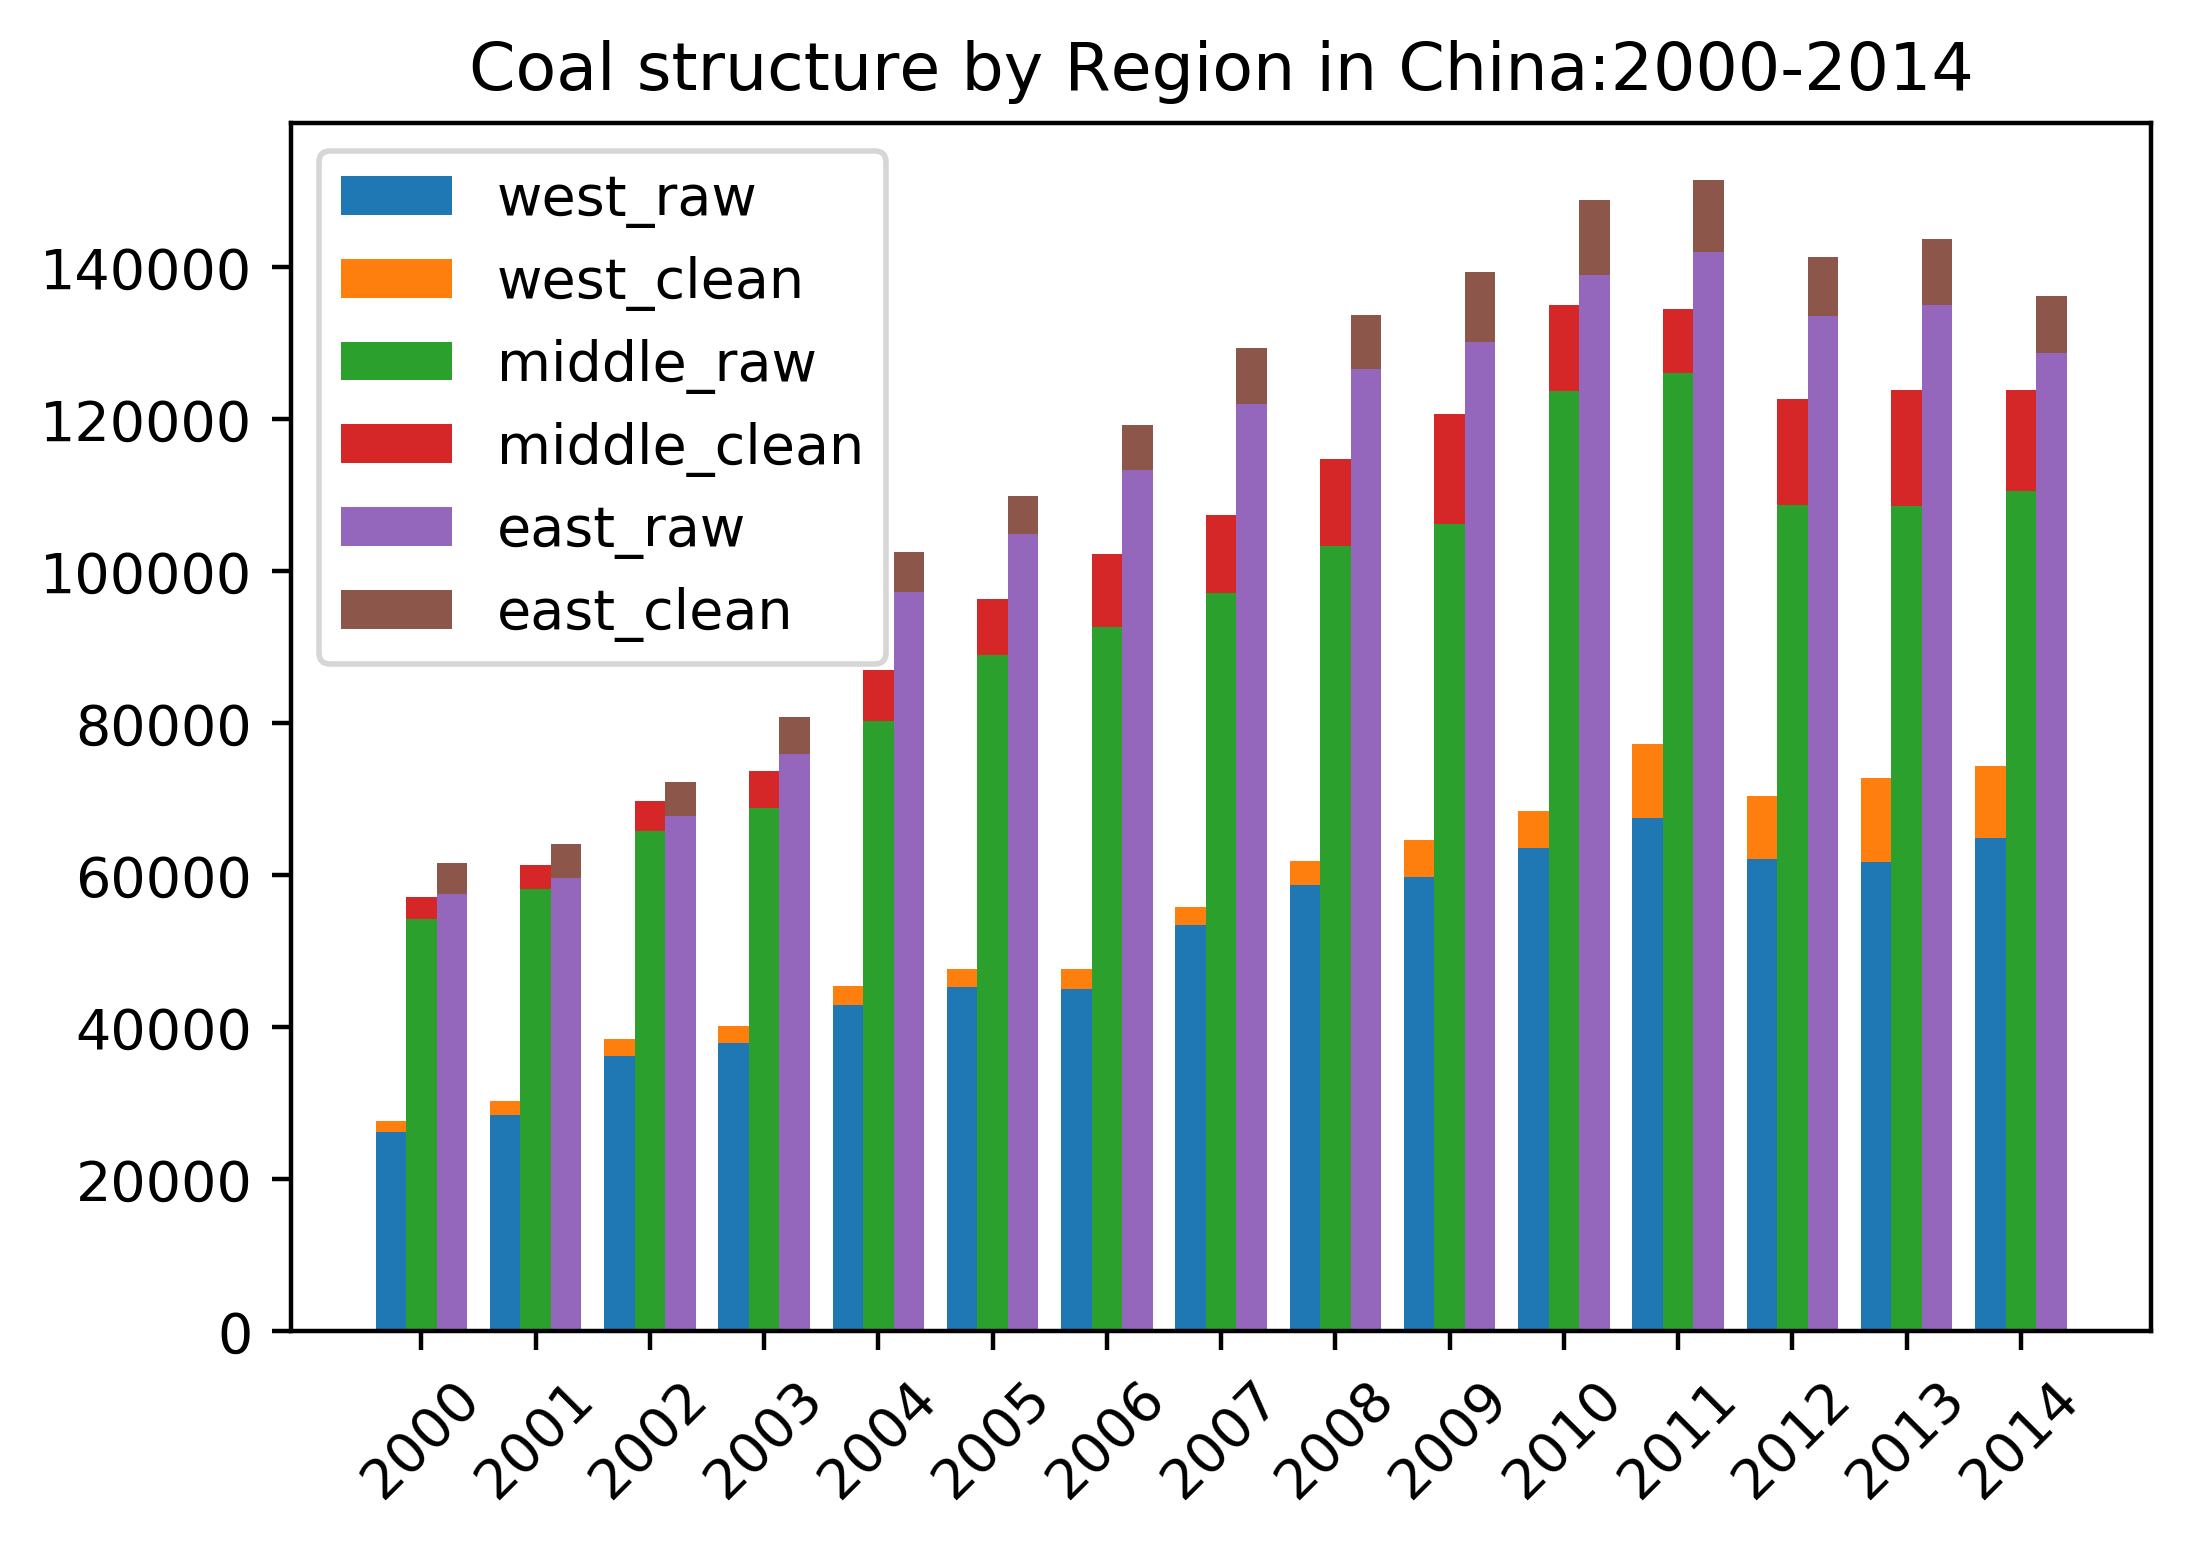

In [71]:
region_by_clean = file1[["west_raw","west_clean","middle_raw","middle_clean","east_raw","east_clean"]]
import pandas as pd
import numpy as np
year = region_by_clean.index
total_width, n = 0.8, 3
x = np.arange(15)
labels = 2000+x

width = total_width / n
x = x - (total_width - width) / 2


plt.bar(x,region_by_clean["west_raw"],width=width,label = "west_raw")
plt.bar(x,region_by_clean["west_clean"],bottom = region_by_clean["west_raw"],width=width,label = "west_clean")
plt.bar(x+width,region_by_clean["middle_raw"],width=width,label = "middle_raw")
plt.bar(x+width,region_by_clean["middle_clean"],bottom = region_by_clean["middle_raw"],tick_label=labels,width=width,label = "middle_clean")
plt.bar(x+2*width,region_by_clean["east_raw"],width=width,label ="east_raw")
plt.bar(x+2*width,region_by_clean["east_clean"],bottom = region_by_clean["east_raw"],width=width,label = "east_clean")
plt.title("Coal structure by Region in China:2000-2014")
plt.rcParams['figure.dpi'] = 400
plt.xticks(rotation=45)

plt.legend()
plt.show()


In [69]:
import pandas as pd
province = ['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'InnerMongolia', 'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan', 'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou', 'Yunnan', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia', 'Xinjiang']

    
year = [2001+k for k in range(15)]
def add(year,province):
    
    file1 = pd.read_excel("Province energy inventory %s.xls"%str(year),sheet_name = province)
    file1.index = [l for l in range(len(file1.index.tolist()))]
    file1 = file1[1:51]
    file1.loc[str(year)] = file1.apply(lambda x: x.sum())
    
    file.append(file1[0:1])   #sum the rows and get the sum
    return file1[50:51]
def generate(year, file,province):
    
    for a in year:    
           
        file = file.append(add(a,province))
    return file #plug in the sum throughout the year
def select(year,file,province):
    file = generate(year,file,province)    
    new_file = file.tail(15)   #generate a file only gets the sum of the year
    new_file = new_file.astype('float')
    return new_file
petroleum_liquid=['Crude Oil','Kerosene',"Diesel Oil",'Fuel Oil','Other Petroleum Products','Gasoline',"LPG",'Refinery Gas']

raw = ['Raw Coal','Briquettes','Coke','Coke Oven Gas','Other Coking Products','Crude Oil','Kerosene',"Diesel Oil",'Fuel Oil','Other Petroleum Products']
clean = ['Cleaned Coal','Other Gas','Gasoline',"LPG",'Refinery Gas','Natural Gas', "Other Washed Coal"]
raw = list(set(raw) & set(petroleum_liquid))
clean = list(set(clean) & set(petroleum_liquid))
def categorize(file,province):
    file = addition(file,raw,"raw_"+province)
    file= addition(file,clean,"clean_"+province)
    file_new = file[["raw_"+province,"clean_"+province]]
    return file_new
def addition(file,l,name):
    file[name] = file[l[0]]
    for q in range(1,len(l)):
        file[name] = file[name]+file[l[q]]
    return file

def country_addition():
    file =pd.read_excel("Province energy inventory 2000.xls",sheet_name = "Beijing")
    
    file.index = [i for i in range(len(file.index.tolist()))]
    final = categorize(select(year,file,"Beijing"),"Beijing")
        
    
    for w in range(1,len(province)):
        file =pd.read_excel("Province energy inventory 2000.xls",sheet_name = province[w])
        file.index = [i for i in range(len(file.index.tolist()))]
        
        a = categorize(select(year,file,province[w]),province[w])
        final = final.join(a)
    
    return final    
result = country_addition() 
print(result)

writer = pd.ExcelWriter('output_petroleum.xlsx')
result.to_excel(writer,'Sheet1')

writer.save()


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


      raw_Beijing  clean_Beijing  raw_Tianjin  clean_Tianjin  raw_Hebei  \
2001        891.6          360.5        705.8          331.8      771.9   
2002       1126.5          391.8        966.1          276.3      759.4   
2003       1059.1          422.8       1071.3          138.8      804.9   
2004       1296.4          513.8       1001.7          288.8      881.5   
2005       1373.7          644.8       1030.0          294.3     1365.3   
2006       1535.8          738.2       1018.7          310.9     1517.0   
2007       1589.7          911.0       1023.3          367.8     1555.5   
2008       1667.4          964.7       1265.7          379.9     1547.7   
2009       1720.5          975.1       1304.3          454.8     1491.3   
2010       1784.6          960.6       1827.7          574.1     1907.8   
2011       1975.9         1000.1       2074.8          662.4     2093.0   
2012       1921.2         1058.1       2239.1          730.9     2114.6   
2013       1834.3        

In [72]:
West=["Chongqing","Sichuan","Guizhou","Yunnan","Shaanxi","Gansu","Qinghai","Ningxia","Xinjiang"]
Middle = ["Henan","InnerMongolia","Jilin","Heilongjiang","Jiangxi","Hubei","Hunan","Shanxi","Anhui"]
East=["Hainan","Guangxi","Guangdong","Shandong","Tianjin","Beijing","Hebei","Liaoning","Shanghai","Jiangsu","Zhejiang","Fujian"]
west_raw = ["raw_"+y for y in West]
west_clean = ["clean_"+t for t in West]
middle_raw = ["raw_"+p for p in Middle]
middle_clean = ["clean_"+r for r in Middle]
east_raw = ["raw_"+o for o in East]
east_clean = ["clean_"+c for c in East]

file1 = pd.read_excel("output_petroleum.xlsx")
def addition_cate(cate_name,file,name_column):
    file[name_column] = file[cate_name[0]]
    for f in range(1,(len(cate_name))):
        file[name_column] = file[name_column]+file[cate_name[f]]
        
    return file
file1 = addition_cate(west_raw,file1,"west_raw")
file1 = addition_cate(west_clean,file1,"west_clean")
file1 = addition_cate(middle_raw,file1,"middle_raw")
file1 = addition_cate(middle_clean,file1,"middle_clean")
file1 = addition_cate(east_raw,file1,"east_raw")
file1 = addition_cate(east_clean,file1,"east_clean")
file1.head(5)

raw_Beijing  clean_Beijing  raw_Tianjin  clean_Tianjin  raw_Hebei  \
2001        891.6          360.5        705.8          331.8      771.9   
2002       1126.5          391.8        966.1          276.3      759.4   
2003       1059.1          422.8       1071.3          138.8      804.9   
2004       1296.4          513.8       1001.7          288.8      881.5   
2005       1373.7          644.8       1030.0          294.3     1365.3   

      clean_Hebei  raw_Shanxi  clean_Shanxi  raw_InnerMongolia  \
2001        387.4       258.8         182.4              214.7   
2002        417.8       285.7         185.1              238.2   
2003        426.5       313.4         188.8              278.2   
2004        469.4       430.3         170.4              629.1   
2005        563.5       533.7         202.0              836.3   

      clean_InnerMongolia     ...      raw_Ningxia  clean_Ningxia  \
2001                156.4     ...              0.0            0.0   
2002                171.9     ...              0.0            0.0   
2003                183.5     ...            324.5           58.1   
2004                319.7     ...             36.9           97.8   
2005                421.6     ...            185.3           66.3   

      raw_Xinjiang  clean_Xinjiang  west_raw  west_clean  middle_raw  \
2001         116.3             0.0    2215.1      1412.0      5048.8   
2002         625.1           303.4    2899.6      1688.3      5772.5   
2003         822.1           317.7    3577.7      1811.0      6527.4   
2004         882.3           357.8    3548.1      2041.1      7425.4   
2005        1504.3           368.9    4967.1      2299.4      9145.2   

      middle_clean  east_raw  east_clean  
2001        2857.0   14716.2      6718.9  
2002        3135.1   15804.4      6978.6  
2003        3410.4   17840.6      7803.9  
2004        4011.4   21151.4      8777.8  
2005        4637.9   26163.3     11513.1  

[5 rows x 66 columns]

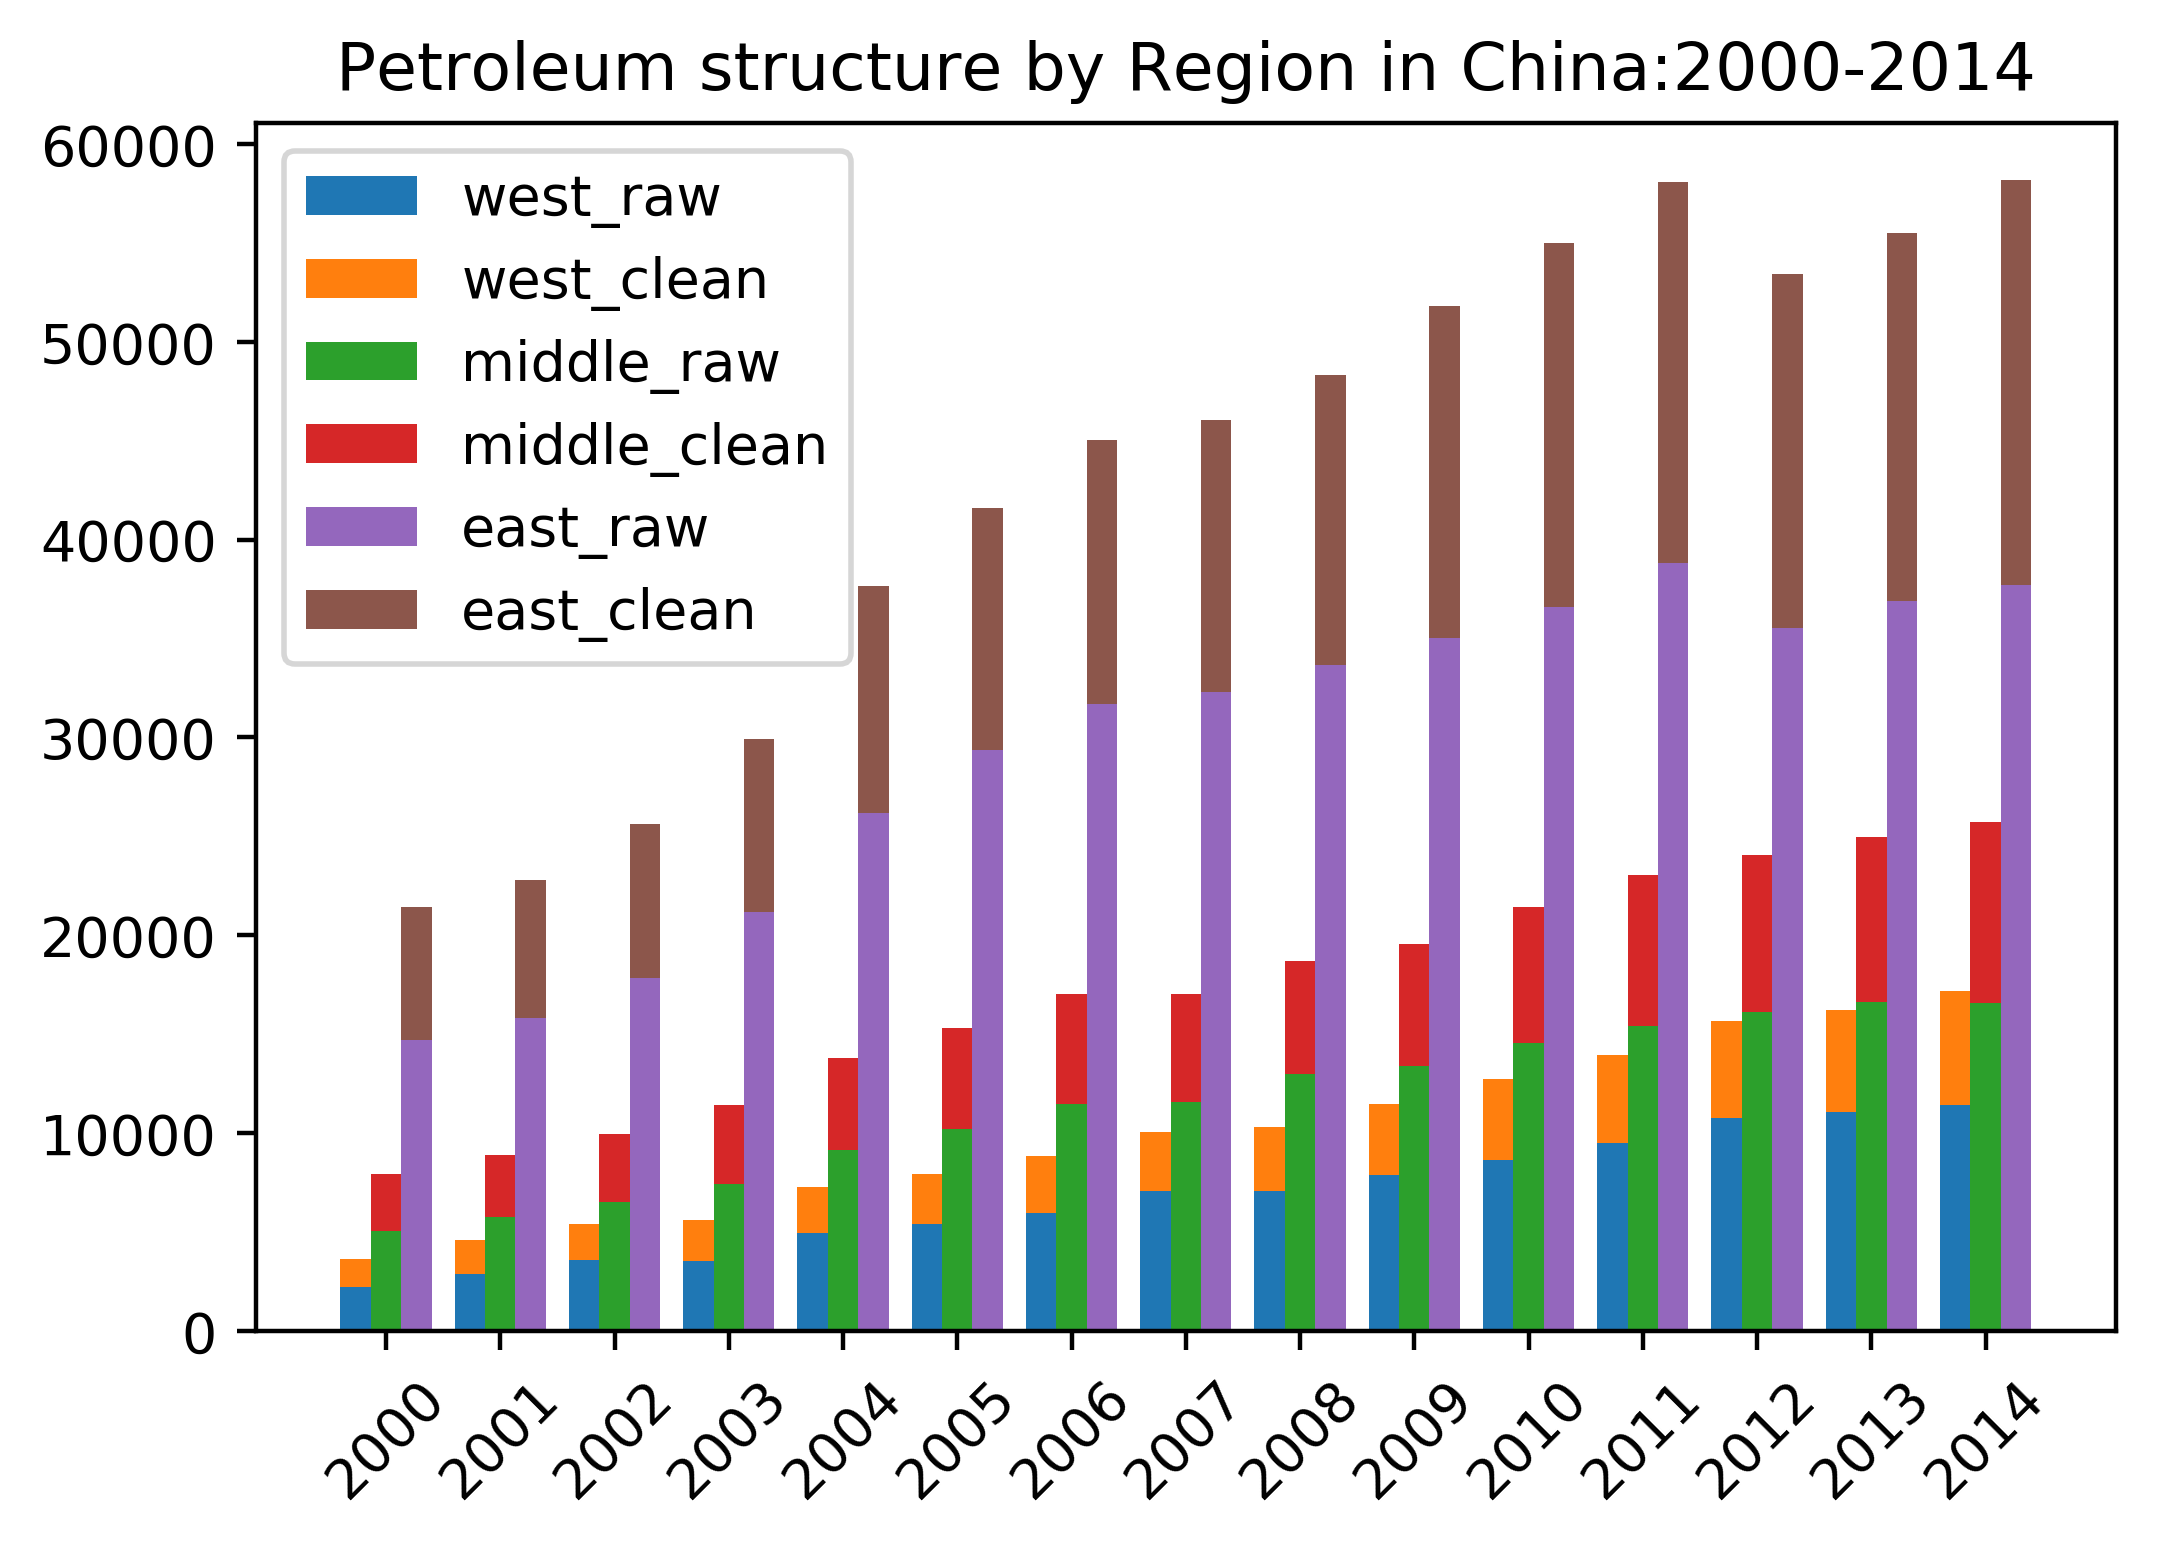

In [73]:
region_by_clean = file1[["west_raw","west_clean","middle_raw","middle_clean","east_raw","east_clean"]]
import pandas as pd
import numpy as np
year = region_by_clean.index
total_width, n = 0.8, 3
x = np.arange(15)
labels = 2000+x

width = total_width / n
x = x - (total_width - width) / 2


plt.bar(x,region_by_clean["west_raw"],width=width,label = "west_raw")
plt.bar(x,region_by_clean["west_clean"],bottom = region_by_clean["west_raw"],width=width,label = "west_clean")
plt.bar(x+width,region_by_clean["middle_raw"],width=width,label = "middle_raw")
plt.bar(x+width,region_by_clean["middle_clean"],bottom = region_by_clean["middle_raw"],tick_label=labels,width=width,label = "middle_clean")
plt.bar(x+2*width,region_by_clean["east_raw"],width=width,label ="east_raw")
plt.bar(x+2*width,region_by_clean["east_clean"],bottom = region_by_clean["east_raw"],width=width,label = "east_clean")
plt.title("Petroleum structure by Region in China:2000-2014")
plt.rcParams['figure.dpi'] = 400
plt.xticks(rotation=45)

plt.legend()
plt.show()


In [74]:
import pandas as pd
province = ['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'InnerMongolia', 'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan', 'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou', 'Yunnan', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia', 'Xinjiang']

    
year = [2001+k for k in range(15)]
def add(year,province):
    
    file1 = pd.read_excel("Province energy inventory %s.xls"%str(year),sheet_name = province)
    file1.index = [l for l in range(len(file1.index.tolist()))]
    file1 = file1[1:51]
    file1.loc[str(year)] = file1.apply(lambda x: x.sum())
    
    file.append(file1[0:1])   #sum the rows and get the sum
    return file1[50:51]
def generate(year, file,province):
    
    for a in year:    
           
        file = file.append(add(a,province))
    return file #plug in the sum throughout the year
def select(year,file,province):
    file = generate(year,file,province)    
    new_file = file.tail(15)   #generate a file only gets the sum of the year
    new_file = new_file.astype('float')
    return new_file
gas=['Coke Oven Gas','Natural Gas','Other Gas']

raw = ['Raw Coal','Briquettes','Coke','Coke Oven Gas','Other Coking Products','Crude Oil','Kerosene',"Diesel Oil",'Fuel Oil','Other Petroleum Products']
clean = ['Cleaned Coal','Other Gas','Gasoline',"LPG",'Refinery Gas','Natural Gas', "Other Washed Coal"]
raw = list(set(raw) & set(gas))
clean = list(set(clean) & set(gas))
def categorize(file,province):
    file = addition(file,raw,"raw_"+province)
    file= addition(file,clean,"clean_"+province)
    file_new = file[["raw_"+province,"clean_"+province]]
    return file_new
def addition(file,l,name):
    file[name] = file[l[0]]
    for q in range(1,len(l)):
        file[name] = file[name]+file[l[q]]
    return file

def country_addition():
    file =pd.read_excel("Province energy inventory 2000.xls",sheet_name = "Beijing")
    
    file.index = [i for i in range(len(file.index.tolist()))]
    final = categorize(select(year,file,"Beijing"),"Beijing")
        
    
    for w in range(1,len(province)):
        file =pd.read_excel("Province energy inventory 2000.xls",sheet_name = province[w])
        file.index = [i for i in range(len(file.index.tolist()))]
        
        a = categorize(select(year,file,province[w]),province[w])
        final = final.join(a)
    
    return final    
result = country_addition() 
print(result)

writer = pd.ExcelWriter('output_gas.xlsx')
result.to_excel(writer,'Sheet1')

writer.save()


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


      raw_Beijing  clean_Beijing  raw_Tianjin  clean_Tianjin  raw_Hebei  \
2001         27.5          209.3          9.1           13.6       48.0   
2002         25.9          208.2         12.2            9.9       54.0   
2003         26.9          218.6         12.0           16.3       53.0   
2004         25.1          225.8         12.4           14.1       67.2   
2005         24.5          227.2         12.3           31.9       85.9   
2006         17.8          203.7         13.0           39.4       91.0   
2007         15.3          215.7         10.2           47.1      131.9   
2008         15.3          161.8         10.2          141.8      156.2   
2009         15.1          170.8          9.7          218.6      154.0   
2010         15.3          174.0          8.2          219.2      158.1   
2011          1.4          100.8          9.4          311.1      191.0   
2012          7.2          108.9          9.8          296.7      208.1   
2013          0.0        

In [75]:
West=["Chongqing","Sichuan","Guizhou","Yunnan","Shaanxi","Gansu","Qinghai","Ningxia","Xinjiang"]
Middle = ["Henan","InnerMongolia","Jilin","Heilongjiang","Jiangxi","Hubei","Hunan","Shanxi","Anhui"]
East=["Hainan","Guangxi","Guangdong","Shandong","Tianjin","Beijing","Hebei","Liaoning","Shanghai","Jiangsu","Zhejiang","Fujian"]
west_raw = ["raw_"+y for y in West]
west_clean = ["clean_"+t for t in West]
middle_raw = ["raw_"+p for p in Middle]
middle_clean = ["clean_"+r for r in Middle]
east_raw = ["raw_"+o for o in East]
east_clean = ["clean_"+c for c in East]

file1 = pd.read_excel("output_gas.xlsx")
def addition_cate(cate_name,file,name_column):
    file[name_column] = file[cate_name[0]]
    for f in range(1,(len(cate_name))):
        file[name_column] = file[name_column]+file[cate_name[f]]
        
    return file
file1 = addition_cate(west_raw,file1,"west_raw")
file1 = addition_cate(west_clean,file1,"west_clean")
file1 = addition_cate(middle_raw,file1,"middle_raw")
file1 = addition_cate(middle_clean,file1,"middle_clean")
file1 = addition_cate(east_raw,file1,"east_raw")
file1 = addition_cate(east_clean,file1,"east_clean")
file1.head(5)

raw_Beijing  clean_Beijing  raw_Tianjin  clean_Tianjin  raw_Hebei  \
2001         27.5          209.3          9.1           13.6       48.0   
2002         25.9          208.2         12.2            9.9       54.0   
2003         26.9          218.6         12.0           16.3       53.0   
2004         25.1          225.8         12.4           14.1       67.2   
2005         24.5          227.2         12.3           31.9       85.9   

      clean_Hebei  raw_Shanxi  clean_Shanxi  raw_InnerMongolia  \
2001        252.5        36.6          40.8               17.9   
2002        263.7        43.4          45.9               18.0   
2003        325.0        46.6          41.5               20.1   
2004        340.9        59.4         277.5               22.8   
2005        338.2       245.6         304.8               28.7   

      clean_InnerMongolia     ...      raw_Ningxia  clean_Ningxia  \
2001                132.9     ...              0.0            0.0   
2002                142.6     ...              0.0            0.0   
2003                150.0     ...              0.0           20.2   
2004                161.9     ...              0.1           23.0   
2005                181.2     ...              1.6           13.2   

      raw_Xinjiang  clean_Xinjiang  west_raw  west_clean  middle_raw  \
2001           0.0            41.0      56.7       431.1       175.1   
2002           4.7            41.1      50.8       479.0       182.6   
2003           3.2            63.2      49.4       490.1       200.3   
2004           3.8           141.7      44.3       583.4       213.9   
2005          11.6           152.6      63.3       632.5       455.4   

      middle_clean  east_raw  east_clean  
2001         460.1     242.1      1015.6  
2002         479.6     239.1      1206.1  
2003         499.3     270.6      1495.7  
2004         914.5     290.4      1791.1  
2005        1159.4     429.3      2160.6  

[5 rows x 66 columns]

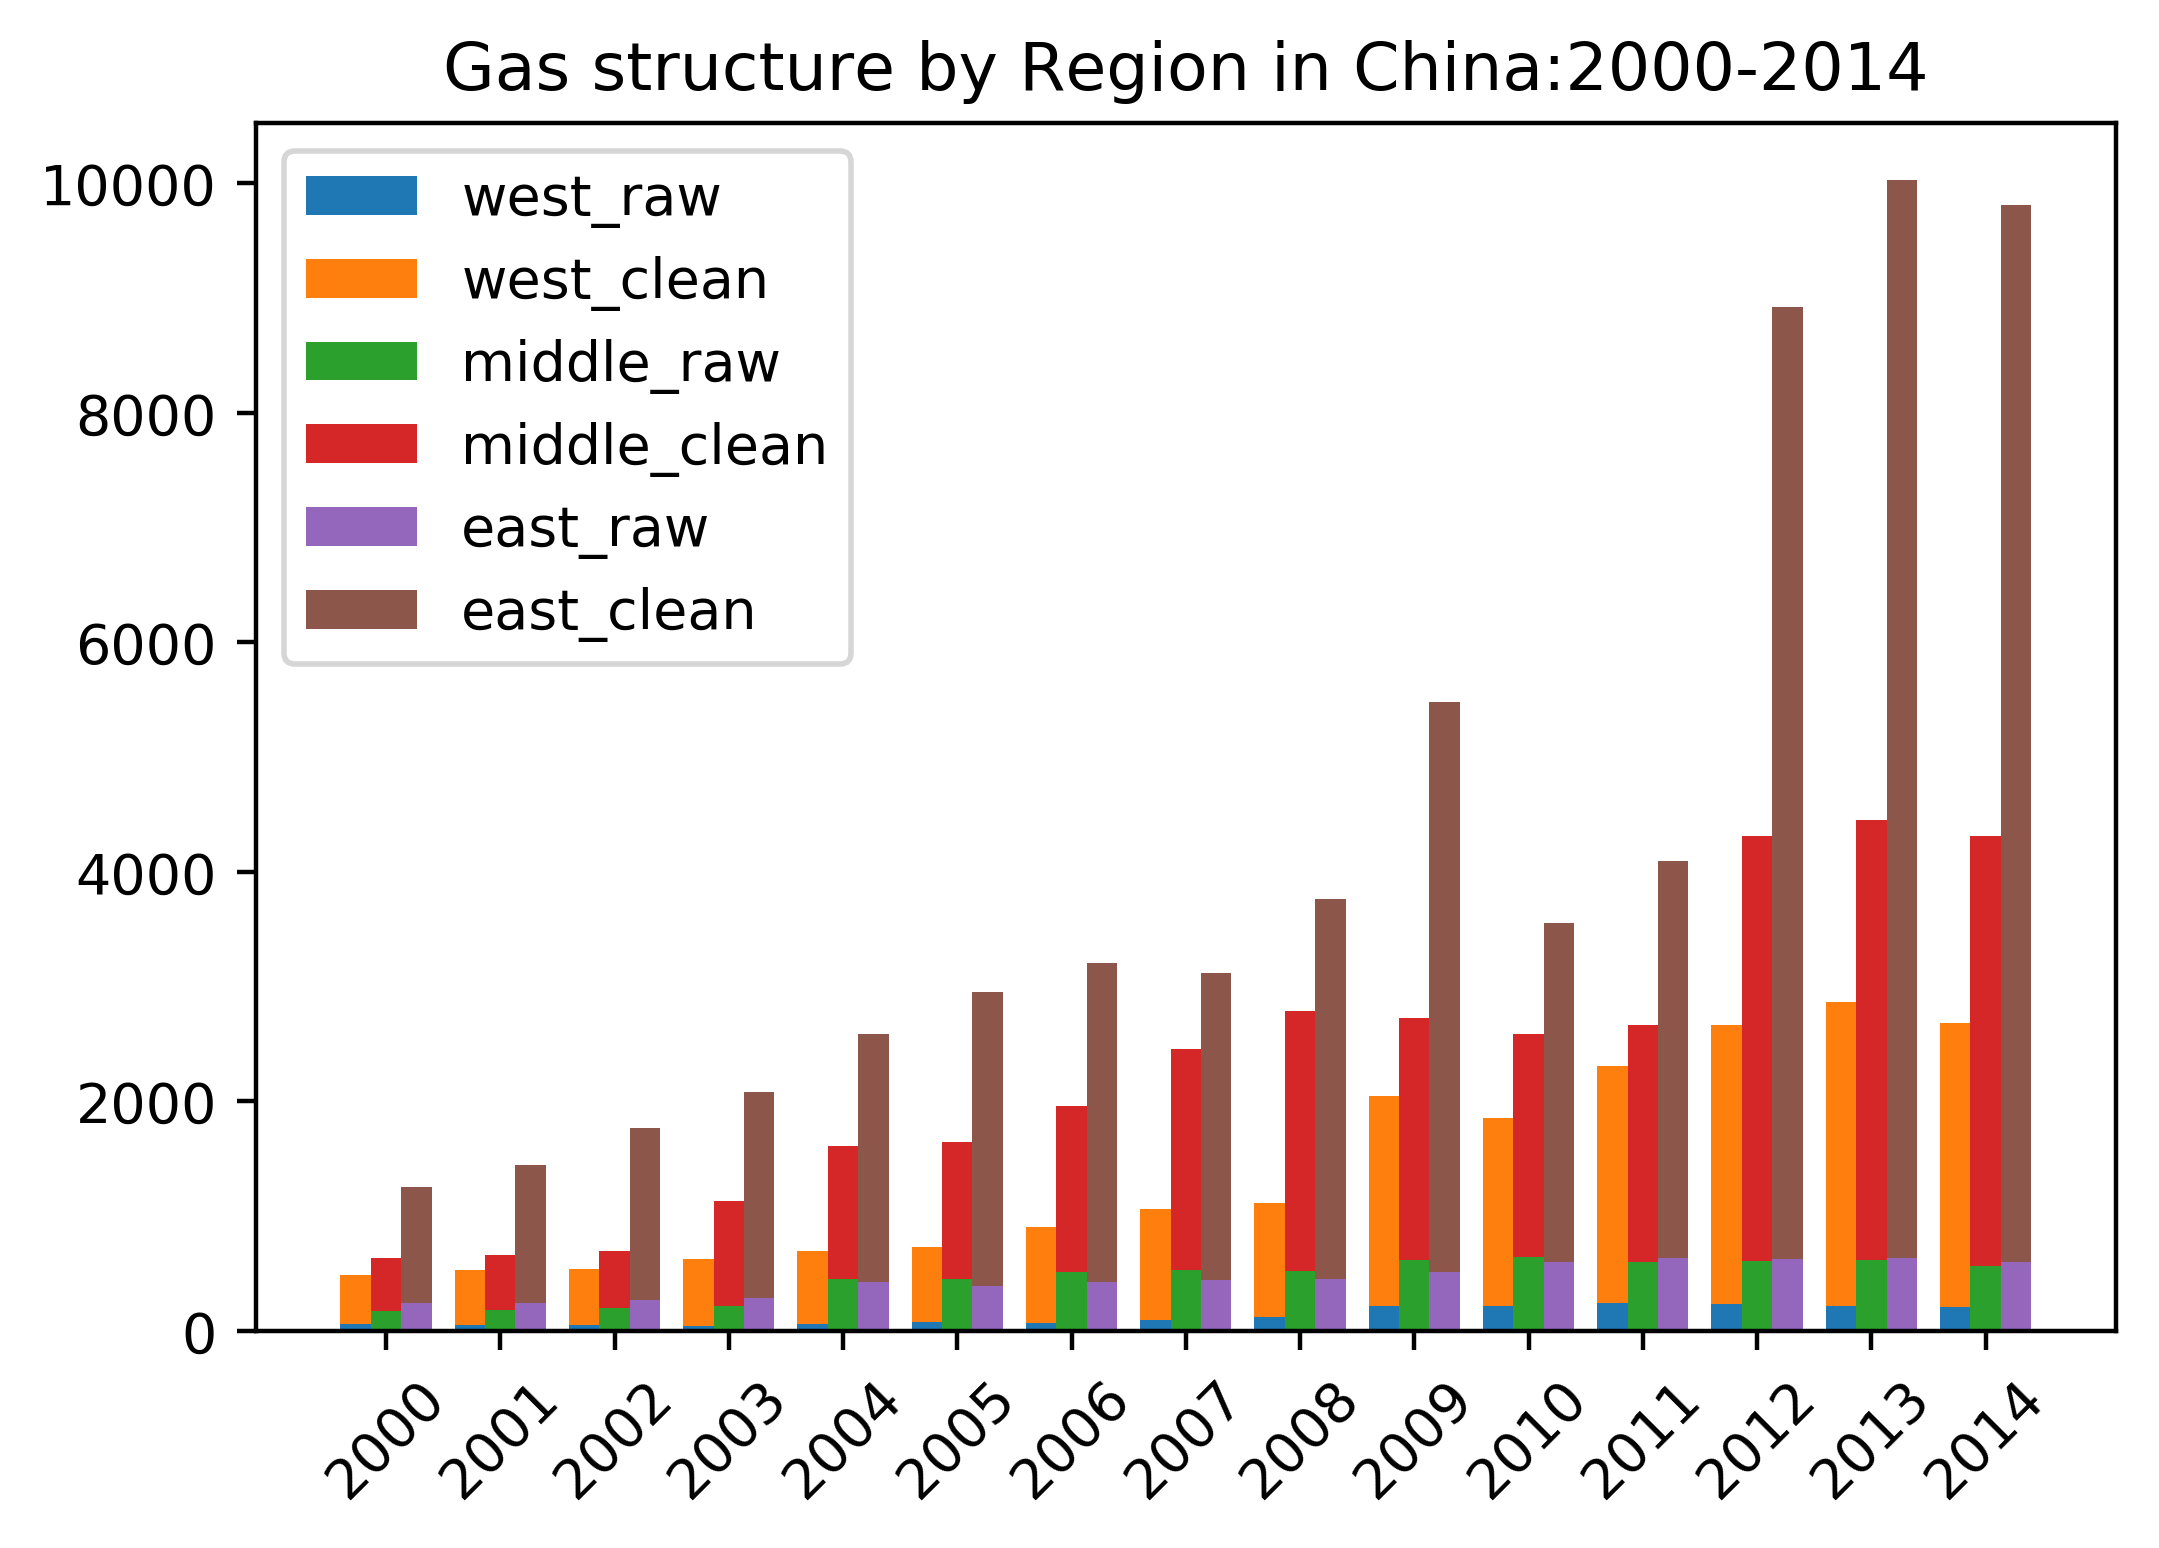

In [76]:
region_by_clean = file1[["west_raw","west_clean","middle_raw","middle_clean","east_raw","east_clean"]]
import pandas as pd
import numpy as np
year = region_by_clean.index
total_width, n = 0.8, 3
x = np.arange(15)
labels = 2000+x

width = total_width / n
x = x - (total_width - width) / 2


plt.bar(x,region_by_clean["west_raw"],width=width,label = "west_raw")
plt.bar(x,region_by_clean["west_clean"],bottom = region_by_clean["west_raw"],width=width,label = "west_clean")
plt.bar(x+width,region_by_clean["middle_raw"],width=width,label = "middle_raw")
plt.bar(x+width,region_by_clean["middle_clean"],bottom = region_by_clean["middle_raw"],tick_label=labels,width=width,label = "middle_clean")
plt.bar(x+2*width,region_by_clean["east_raw"],width=width,label ="east_raw")
plt.bar(x+2*width,region_by_clean["east_clean"],bottom = region_by_clean["east_raw"],width=width,label = "east_clean")
plt.title("Gas structure by Region in China:2000-2014")
plt.rcParams['figure.dpi'] = 400
plt.xticks(rotation=45)

plt.legend()
plt.show()